# M2177.003100 Deep Learning <br> Assignment #1 Part 1: Data Curation Practices

Copyright (C) Data Science & AI Laboratory, Seoul National University. This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. 

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

**Note**: Certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem. The *Exercises* are self-evaluated assignments(**they are not included in your assignment score**). However, you must go through the exercises to perform well in further assignments.

### Submitting your work:
<font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.  
Once you have done **part 1 - 3**, run the *CollectSubmission.sh* script with your **Student number** as input argument. PLEASE comment any print/plot function in *Excercises* on submission. <br>
This will produce a compressed file called *[Your student number].tar.gz*. Please submit this file on ETL. &nbsp;&nbsp; (Usage: ./*CollectSubmission.sh* &nbsp; 20\*\*-\*\*\*\*\*)

## Download datasets

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labeled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
#%matplotlib inline
# PLEASE Comment this line on submission

In [3]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = './data' # Change me to store data elsewhere

if not os.path.exists(data_root):
  os.makedirs(data_root)

def download_progress_hook(count, blockSize, totalSize):
    """A hook to report the progress of a download. This is mostly intended for users with
    slow internet connections. Reports every 5% change in download progress.
    """
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write("%s%%" % percent)
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()

    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
    """Download a file if not present, and make sure it's the right size."""
    dest_filename = os.path.join(data_root, filename)
    if force or not os.path.exists(dest_filename):
        print('Attempting to download:', filename) 
        filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')
    statinfo = os.stat(dest_filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', dest_filename)
    else:
        raise Exception(
          'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
    return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified ./data/notMNIST_large.tar.gz
Found and verified ./data/notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labeled A through J.

In [4]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    if os.path.isdir(root) and not force:
    # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(data_root)
        tar.close()
    data_folders = [
        os.path.join(root, d) for d in sorted(os.listdir(root))
        if os.path.isdir(os.path.join(root, d))]
    if len(data_folders) != num_classes:
        raise Exception(
          'Expected %d folders, one per class. Found %d instead.' % (
            num_classes, len(data_folders)))
    print(data_folders)
    return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

./data/notMNIST_large already present - Skipping extraction of ./data/notMNIST_large.tar.gz.
['./data/notMNIST_large/A', './data/notMNIST_large/B', './data/notMNIST_large/C', './data/notMNIST_large/D', './data/notMNIST_large/E', './data/notMNIST_large/F', './data/notMNIST_large/G', './data/notMNIST_large/H', './data/notMNIST_large/I', './data/notMNIST_large/J']
./data/notMNIST_small already present - Skipping extraction of ./data/notMNIST_small.tar.gz.
['./data/notMNIST_small/A', './data/notMNIST_small/B', './data/notMNIST_small/C', './data/notMNIST_small/D', './data/notMNIST_small/E', './data/notMNIST_small/F', './data/notMNIST_small/G', './data/notMNIST_small/H', './data/notMNIST_small/I', './data/notMNIST_small/J']


---
Excercise 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display Image method.

---

In [5]:
#print(__doc__)
""" Use Image(filename=sample)
    PLEASE comment the Image function in this block on submission """
import glob
for i in range(num_classes):
    image_file = glob.glob(os.path.join(train_folders[i], '*.png'))[10]
    #display(Image(filename=image_file))

Automatically created module for IPython interactive environment


## Load datasets

Now let's load the data in a more manageable format. Since, depending on your computer setup you might not be able to fit it all in memory, we'll load each class into a separate dataset, store them on disk and curate them independently. Later we'll merge them into a single dataset of manageable size.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. 

A few images might not be readable, we'll just skip them.

In [6]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
    """Load the data for a single letter label."""
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:            
            image_data = (plt.imread(image_file, 0).astype(float) - 
                        pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except IOError as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')

    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %
                        (num_images, min_num_images))

    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename) and not force:
          # You may override by setting force=True.
          print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)

    return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

Pickling ./data/notMNIST_large/A.pickle.
./data/notMNIST_large/A
Could not read: ./data/notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : cannot identify image file './data/notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png' - it's ok, skipping.
Could not read: ./data/notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : cannot identify image file './data/notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png' - it's ok, skipping.
Could not read: ./data/notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : cannot identify image file './data/notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png' - it's ok, skipping.
Full dataset tensor: (52909, 28, 28)
Mean: -0.12824999
Standard deviation: 0.44312048
Pickling ./data/notMNIST_large/B.pickle.
./data/notMNIST_large/B
Could not read: ./data/notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png : cannot identify image file './data/notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png' - it's ok, skipping.
Full dataset tensor: (52

---
Exercise 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. *Hint*: you can use matplotlib.pyplot.

---

 PLEASE comment any print/plot function in this block on submission 


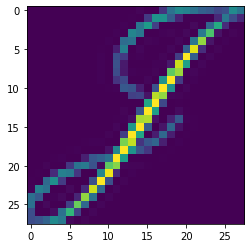

In [28]:
#print(__doc__)
""" PLEASE comment any print/plot function in this block on submission """
def plot_sample(datasets):
    for label, pickle_file in enumerate(datasets):
        with open(pickle_file, 'rb') as f:
            data = pickle.load(f)
            #plt.imshow(data[10])
plot_sample(train_datasets)
plot_sample(test_datasets)

---
Exercise 3
---------
Another check: we expect the data to be balanced across classes. Verify that if the number of samples across classes are balanced.

---

In [27]:
#print(__doc__)
""" PLEASE comment any print/plot function in this block on submission """
def show_sample_sizes(datasets):
    for label, pickle_file in enumerate(datasets):
        with open(pickle_file, 'rb') as f:
            data = pickle.load(f)
            #print(f.name + ": " + str(len(data)))
show_sample_sizes(train_datasets)
show_sample_sizes(test_datasets)

 PLEASE comment any print/plot function in this block on submission 
./data/notMNIST_large/A.pickle: 52909
./data/notMNIST_large/B.pickle: 52911
./data/notMNIST_large/C.pickle: 52912
./data/notMNIST_large/D.pickle: 52911
./data/notMNIST_large/E.pickle: 52912
./data/notMNIST_large/F.pickle: 52912
./data/notMNIST_large/G.pickle: 52912
./data/notMNIST_large/H.pickle: 52912
./data/notMNIST_large/I.pickle: 52912
./data/notMNIST_large/J.pickle: 52911
./data/notMNIST_small/A.pickle: 1872
./data/notMNIST_small/B.pickle: 1873
./data/notMNIST_small/C.pickle: 1873
./data/notMNIST_small/D.pickle: 1873
./data/notMNIST_small/E.pickle: 1873
./data/notMNIST_small/F.pickle: 1872
./data/notMNIST_small/G.pickle: 1872
./data/notMNIST_small/H.pickle: 1872
./data/notMNIST_small/I.pickle: 1872
./data/notMNIST_small/J.pickle: 1872


## Generate train, test, validation sets

Merge and prune the training data as needed. Depending on your computer setup, you might not be able to fit it all in memory, and you can tune `train_size` as needed. The labels will be stored into a separate array of integers 0 through 9.

Also create a validation dataset for hyperparameter tuning.

In [29]:
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes

    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class+tsize_per_class
    for label, pickle_file in enumerate(pickle_files):       
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class

                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise

    return valid_dataset, valid_labels, train_dataset, train_labels

            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [30]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation,:,:]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

---
Exercise 4
---------
Convince yourself that the data is still good after shuffling! Display one of the images and see if it's not distorted.

---

 PLEASE comment any print/plot function in this block on submission 


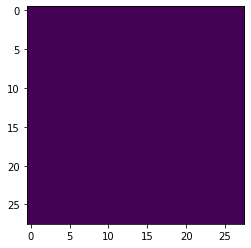

In [36]:
#print(__doc__)
""" PLEASE comment any print/plot function in this block on submission """
def plot_shuffled_sample(dataset, i):
    #plt.imshow(dataset[i])
    
plot_shuffled_sample(train_dataset, 60)
#plot_shuffled_sample(test_dataset, 43)
#plot_shuffled_sample(valid_dataset)

Finally, let's save the data for later reuse:

In [39]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_dataset': train_dataset,
        'train_labels': train_labels,
        'valid_dataset': valid_dataset,
        'valid_labels': valid_labels,
        'test_dataset': test_dataset,
        'test_labels': test_labels,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

In [40]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800506


---
Exercise 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.

Important Hint: Since the size of the dataset is large, it demands much time to search and compare. Using *hash, set* function in python may help.

Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [23]:
#print(__doc__)
""" PLEASE comment any print/plot function in this block on submission """
pickle_file = os.path.join(data_root, 'notMNIST.pickle')
with open(pickle_file, 'rb') as f:
    all_data = pickle.load(f)
    train_dataset = all_data['train_dataset']
    train_labels = all_data['train_labels']
    test_dataset = all_data['test_dataset']
    test_labels = all_data['test_labels']
    valid_dataset = all_data['valid_dataset']
    valid_labels = all_data['valid_labels']
    #print(train_dataset.shape)
    #print(train_labels.shape)
    #print(test_dataset.shape)
    #print(valid_dataset.shape)
# check training set existed in test set
for i in range(len(train_dataset)):
    for j in range(len(test_dataset)):
        if np.array_equal(train_dataset[i], test_dataset[j]):
            #print('Train: ' + str(i) + ' equals Test: ' + str(j))

 TODO 
(200000, 28, 28)
(200000,)
(10000, 28, 28)
(10000, 28, 28)
Train: 60 equals Test: 43
Train: 60 equals Test: 247
Train: 60 equals Test: 348
Train: 60 equals Test: 393
Train: 60 equals Test: 427
Train: 60 equals Test: 444
Train: 60 equals Test: 515
Train: 60 equals Test: 692
Train: 60 equals Test: 742
Train: 60 equals Test: 988
Train: 60 equals Test: 1006
Train: 60 equals Test: 1017
Train: 60 equals Test: 1018
Train: 60 equals Test: 1062
Train: 60 equals Test: 1127
Train: 60 equals Test: 1182
Train: 60 equals Test: 1209
Train: 60 equals Test: 1251
Train: 60 equals Test: 1262
Train: 60 equals Test: 1284
Train: 60 equals Test: 1323
Train: 60 equals Test: 1569
Train: 60 equals Test: 1637
Train: 60 equals Test: 1686
Train: 60 equals Test: 1791
Train: 60 equals Test: 1794
Train: 60 equals Test: 1889
Train: 60 equals Test: 1957
Train: 60 equals Test: 2012
Train: 60 equals Test: 2021
Train: 60 equals Test: 2060
Train: 60 equals Test: 2364
Train: 60 equals Test: 2404
Train: 60 equals Test

Train: 263 equals Test: 2847
Train: 274 equals Test: 5406
Train: 332 equals Test: 43
Train: 332 equals Test: 247
Train: 332 equals Test: 348
Train: 332 equals Test: 393
Train: 332 equals Test: 427
Train: 332 equals Test: 444
Train: 332 equals Test: 515
Train: 332 equals Test: 692
Train: 332 equals Test: 742
Train: 332 equals Test: 988
Train: 332 equals Test: 1006
Train: 332 equals Test: 1017
Train: 332 equals Test: 1018
Train: 332 equals Test: 1062
Train: 332 equals Test: 1127
Train: 332 equals Test: 1182
Train: 332 equals Test: 1209
Train: 332 equals Test: 1251
Train: 332 equals Test: 1262
Train: 332 equals Test: 1284
Train: 332 equals Test: 1323
Train: 332 equals Test: 1569
Train: 332 equals Test: 1637
Train: 332 equals Test: 1686
Train: 332 equals Test: 1791
Train: 332 equals Test: 1794
Train: 332 equals Test: 1889
Train: 332 equals Test: 1957
Train: 332 equals Test: 2012
Train: 332 equals Test: 2021
Train: 332 equals Test: 2060
Train: 332 equals Test: 2364
Train: 332 equals Test: 2

Train: 490 equals Test: 43
Train: 490 equals Test: 247
Train: 490 equals Test: 348
Train: 490 equals Test: 393
Train: 490 equals Test: 427
Train: 490 equals Test: 444
Train: 490 equals Test: 515
Train: 490 equals Test: 692
Train: 490 equals Test: 742
Train: 490 equals Test: 988
Train: 490 equals Test: 1006
Train: 490 equals Test: 1017
Train: 490 equals Test: 1018
Train: 490 equals Test: 1062
Train: 490 equals Test: 1127
Train: 490 equals Test: 1182
Train: 490 equals Test: 1209
Train: 490 equals Test: 1251
Train: 490 equals Test: 1262
Train: 490 equals Test: 1284
Train: 490 equals Test: 1323
Train: 490 equals Test: 1569
Train: 490 equals Test: 1637
Train: 490 equals Test: 1686
Train: 490 equals Test: 1791
Train: 490 equals Test: 1794
Train: 490 equals Test: 1889
Train: 490 equals Test: 1957
Train: 490 equals Test: 2012
Train: 490 equals Test: 2021
Train: 490 equals Test: 2060
Train: 490 equals Test: 2364
Train: 490 equals Test: 2404
Train: 490 equals Test: 2422
Train: 490 equals Test: 2

Train: 785 equals Test: 5519
Train: 800 equals Test: 4023
Train: 842 equals Test: 4529
Train: 947 equals Test: 43
Train: 947 equals Test: 247
Train: 947 equals Test: 348
Train: 947 equals Test: 393
Train: 947 equals Test: 427
Train: 947 equals Test: 444
Train: 947 equals Test: 515
Train: 947 equals Test: 692
Train: 947 equals Test: 742
Train: 947 equals Test: 988
Train: 947 equals Test: 1006
Train: 947 equals Test: 1017
Train: 947 equals Test: 1018
Train: 947 equals Test: 1062
Train: 947 equals Test: 1127
Train: 947 equals Test: 1182
Train: 947 equals Test: 1209
Train: 947 equals Test: 1251
Train: 947 equals Test: 1262
Train: 947 equals Test: 1284
Train: 947 equals Test: 1323
Train: 947 equals Test: 1569
Train: 947 equals Test: 1637
Train: 947 equals Test: 1686
Train: 947 equals Test: 1791
Train: 947 equals Test: 1794
Train: 947 equals Test: 1889
Train: 947 equals Test: 1957
Train: 947 equals Test: 2012
Train: 947 equals Test: 2021
Train: 947 equals Test: 2060
Train: 947 equals Test: 2

Train: 1073 equals Test: 43
Train: 1073 equals Test: 247
Train: 1073 equals Test: 348
Train: 1073 equals Test: 393
Train: 1073 equals Test: 427
Train: 1073 equals Test: 444
Train: 1073 equals Test: 515
Train: 1073 equals Test: 692
Train: 1073 equals Test: 742
Train: 1073 equals Test: 988
Train: 1073 equals Test: 1006
Train: 1073 equals Test: 1017
Train: 1073 equals Test: 1018
Train: 1073 equals Test: 1062
Train: 1073 equals Test: 1127
Train: 1073 equals Test: 1182
Train: 1073 equals Test: 1209
Train: 1073 equals Test: 1251
Train: 1073 equals Test: 1262
Train: 1073 equals Test: 1284
Train: 1073 equals Test: 1323
Train: 1073 equals Test: 1569
Train: 1073 equals Test: 1637
Train: 1073 equals Test: 1686
Train: 1073 equals Test: 1791
Train: 1073 equals Test: 1794
Train: 1073 equals Test: 1889
Train: 1073 equals Test: 1957
Train: 1073 equals Test: 2012
Train: 1073 equals Test: 2021
Train: 1073 equals Test: 2060
Train: 1073 equals Test: 2364
Train: 1073 equals Test: 2404
Train: 1073 equals Te

Train: 1337 equals Test: 43
Train: 1337 equals Test: 247
Train: 1337 equals Test: 348
Train: 1337 equals Test: 393
Train: 1337 equals Test: 427
Train: 1337 equals Test: 444
Train: 1337 equals Test: 515
Train: 1337 equals Test: 692
Train: 1337 equals Test: 742
Train: 1337 equals Test: 988
Train: 1337 equals Test: 1006
Train: 1337 equals Test: 1017
Train: 1337 equals Test: 1018
Train: 1337 equals Test: 1062
Train: 1337 equals Test: 1127
Train: 1337 equals Test: 1182
Train: 1337 equals Test: 1209
Train: 1337 equals Test: 1251
Train: 1337 equals Test: 1262
Train: 1337 equals Test: 1284
Train: 1337 equals Test: 1323
Train: 1337 equals Test: 1569
Train: 1337 equals Test: 1637
Train: 1337 equals Test: 1686
Train: 1337 equals Test: 1791
Train: 1337 equals Test: 1794
Train: 1337 equals Test: 1889
Train: 1337 equals Test: 1957
Train: 1337 equals Test: 2012
Train: 1337 equals Test: 2021
Train: 1337 equals Test: 2060
Train: 1337 equals Test: 2364
Train: 1337 equals Test: 2404
Train: 1337 equals Te

Train: 1647 equals Test: 4158
Train: 1654 equals Test: 43
Train: 1654 equals Test: 247
Train: 1654 equals Test: 348
Train: 1654 equals Test: 393
Train: 1654 equals Test: 427
Train: 1654 equals Test: 444
Train: 1654 equals Test: 515
Train: 1654 equals Test: 692
Train: 1654 equals Test: 742
Train: 1654 equals Test: 988
Train: 1654 equals Test: 1006
Train: 1654 equals Test: 1017
Train: 1654 equals Test: 1018
Train: 1654 equals Test: 1062
Train: 1654 equals Test: 1127
Train: 1654 equals Test: 1182
Train: 1654 equals Test: 1209
Train: 1654 equals Test: 1251
Train: 1654 equals Test: 1262
Train: 1654 equals Test: 1284
Train: 1654 equals Test: 1323
Train: 1654 equals Test: 1569
Train: 1654 equals Test: 1637
Train: 1654 equals Test: 1686
Train: 1654 equals Test: 1791
Train: 1654 equals Test: 1794
Train: 1654 equals Test: 1889
Train: 1654 equals Test: 1957
Train: 1654 equals Test: 2012
Train: 1654 equals Test: 2021
Train: 1654 equals Test: 2060
Train: 1654 equals Test: 2364
Train: 1654 equals Te

Train: 1810 equals Test: 43
Train: 1810 equals Test: 247
Train: 1810 equals Test: 348
Train: 1810 equals Test: 393
Train: 1810 equals Test: 427
Train: 1810 equals Test: 444
Train: 1810 equals Test: 515
Train: 1810 equals Test: 692
Train: 1810 equals Test: 742
Train: 1810 equals Test: 988
Train: 1810 equals Test: 1006
Train: 1810 equals Test: 1017
Train: 1810 equals Test: 1018
Train: 1810 equals Test: 1062
Train: 1810 equals Test: 1127
Train: 1810 equals Test: 1182
Train: 1810 equals Test: 1209
Train: 1810 equals Test: 1251
Train: 1810 equals Test: 1262
Train: 1810 equals Test: 1284
Train: 1810 equals Test: 1323
Train: 1810 equals Test: 1569
Train: 1810 equals Test: 1637
Train: 1810 equals Test: 1686
Train: 1810 equals Test: 1791
Train: 1810 equals Test: 1794
Train: 1810 equals Test: 1889
Train: 1810 equals Test: 1957
Train: 1810 equals Test: 2012
Train: 1810 equals Test: 2021
Train: 1810 equals Test: 2060
Train: 1810 equals Test: 2364
Train: 1810 equals Test: 2404
Train: 1810 equals Te

Train: 1937 equals Test: 6241
Train: 2103 equals Test: 43
Train: 2103 equals Test: 247
Train: 2103 equals Test: 348
Train: 2103 equals Test: 393
Train: 2103 equals Test: 427
Train: 2103 equals Test: 444
Train: 2103 equals Test: 515
Train: 2103 equals Test: 692
Train: 2103 equals Test: 742
Train: 2103 equals Test: 988
Train: 2103 equals Test: 1006
Train: 2103 equals Test: 1017
Train: 2103 equals Test: 1018
Train: 2103 equals Test: 1062
Train: 2103 equals Test: 1127
Train: 2103 equals Test: 1182
Train: 2103 equals Test: 1209
Train: 2103 equals Test: 1251
Train: 2103 equals Test: 1262
Train: 2103 equals Test: 1284
Train: 2103 equals Test: 1323
Train: 2103 equals Test: 1569
Train: 2103 equals Test: 1637
Train: 2103 equals Test: 1686
Train: 2103 equals Test: 1791
Train: 2103 equals Test: 1794
Train: 2103 equals Test: 1889
Train: 2103 equals Test: 1957
Train: 2103 equals Test: 2012
Train: 2103 equals Test: 2021
Train: 2103 equals Test: 2060
Train: 2103 equals Test: 2364
Train: 2103 equals Te

Train: 2328 equals Test: 43
Train: 2328 equals Test: 247
Train: 2328 equals Test: 348
Train: 2328 equals Test: 393
Train: 2328 equals Test: 427
Train: 2328 equals Test: 444
Train: 2328 equals Test: 515
Train: 2328 equals Test: 692
Train: 2328 equals Test: 742
Train: 2328 equals Test: 988
Train: 2328 equals Test: 1006
Train: 2328 equals Test: 1017
Train: 2328 equals Test: 1018
Train: 2328 equals Test: 1062
Train: 2328 equals Test: 1127
Train: 2328 equals Test: 1182
Train: 2328 equals Test: 1209
Train: 2328 equals Test: 1251
Train: 2328 equals Test: 1262
Train: 2328 equals Test: 1284
Train: 2328 equals Test: 1323
Train: 2328 equals Test: 1569
Train: 2328 equals Test: 1637
Train: 2328 equals Test: 1686
Train: 2328 equals Test: 1791
Train: 2328 equals Test: 1794
Train: 2328 equals Test: 1889
Train: 2328 equals Test: 1957
Train: 2328 equals Test: 2012
Train: 2328 equals Test: 2021
Train: 2328 equals Test: 2060
Train: 2328 equals Test: 2364
Train: 2328 equals Test: 2404
Train: 2328 equals Te

Train: 2583 equals Test: 43
Train: 2583 equals Test: 247
Train: 2583 equals Test: 348
Train: 2583 equals Test: 393
Train: 2583 equals Test: 427
Train: 2583 equals Test: 444
Train: 2583 equals Test: 515
Train: 2583 equals Test: 692
Train: 2583 equals Test: 742
Train: 2583 equals Test: 988
Train: 2583 equals Test: 1006
Train: 2583 equals Test: 1017
Train: 2583 equals Test: 1018
Train: 2583 equals Test: 1062
Train: 2583 equals Test: 1127
Train: 2583 equals Test: 1182
Train: 2583 equals Test: 1209
Train: 2583 equals Test: 1251
Train: 2583 equals Test: 1262
Train: 2583 equals Test: 1284
Train: 2583 equals Test: 1323
Train: 2583 equals Test: 1569
Train: 2583 equals Test: 1637
Train: 2583 equals Test: 1686
Train: 2583 equals Test: 1791
Train: 2583 equals Test: 1794
Train: 2583 equals Test: 1889
Train: 2583 equals Test: 1957
Train: 2583 equals Test: 2012
Train: 2583 equals Test: 2021
Train: 2583 equals Test: 2060
Train: 2583 equals Test: 2364
Train: 2583 equals Test: 2404
Train: 2583 equals Te

Train: 2841 equals Test: 2288
Train: 2872 equals Test: 43
Train: 2872 equals Test: 247
Train: 2872 equals Test: 348
Train: 2872 equals Test: 393
Train: 2872 equals Test: 427
Train: 2872 equals Test: 444
Train: 2872 equals Test: 515
Train: 2872 equals Test: 692
Train: 2872 equals Test: 742
Train: 2872 equals Test: 988
Train: 2872 equals Test: 1006
Train: 2872 equals Test: 1017
Train: 2872 equals Test: 1018
Train: 2872 equals Test: 1062
Train: 2872 equals Test: 1127
Train: 2872 equals Test: 1182
Train: 2872 equals Test: 1209
Train: 2872 equals Test: 1251
Train: 2872 equals Test: 1262
Train: 2872 equals Test: 1284
Train: 2872 equals Test: 1323
Train: 2872 equals Test: 1569
Train: 2872 equals Test: 1637
Train: 2872 equals Test: 1686
Train: 2872 equals Test: 1791
Train: 2872 equals Test: 1794
Train: 2872 equals Test: 1889
Train: 2872 equals Test: 1957
Train: 2872 equals Test: 2012
Train: 2872 equals Test: 2021
Train: 2872 equals Test: 2060
Train: 2872 equals Test: 2364
Train: 2872 equals Te

Train: 2982 equals Test: 43
Train: 2982 equals Test: 247
Train: 2982 equals Test: 348
Train: 2982 equals Test: 393
Train: 2982 equals Test: 427
Train: 2982 equals Test: 444
Train: 2982 equals Test: 515
Train: 2982 equals Test: 692
Train: 2982 equals Test: 742
Train: 2982 equals Test: 988
Train: 2982 equals Test: 1006
Train: 2982 equals Test: 1017
Train: 2982 equals Test: 1018
Train: 2982 equals Test: 1062
Train: 2982 equals Test: 1127
Train: 2982 equals Test: 1182
Train: 2982 equals Test: 1209
Train: 2982 equals Test: 1251
Train: 2982 equals Test: 1262
Train: 2982 equals Test: 1284
Train: 2982 equals Test: 1323
Train: 2982 equals Test: 1569
Train: 2982 equals Test: 1637
Train: 2982 equals Test: 1686
Train: 2982 equals Test: 1791
Train: 2982 equals Test: 1794
Train: 2982 equals Test: 1889
Train: 2982 equals Test: 1957
Train: 2982 equals Test: 2012
Train: 2982 equals Test: 2021
Train: 2982 equals Test: 2060
Train: 2982 equals Test: 2364
Train: 2982 equals Test: 2404
Train: 2982 equals Te

Train: 3142 equals Test: 43
Train: 3142 equals Test: 247
Train: 3142 equals Test: 348
Train: 3142 equals Test: 393
Train: 3142 equals Test: 427
Train: 3142 equals Test: 444
Train: 3142 equals Test: 515
Train: 3142 equals Test: 692
Train: 3142 equals Test: 742
Train: 3142 equals Test: 988
Train: 3142 equals Test: 1006
Train: 3142 equals Test: 1017
Train: 3142 equals Test: 1018
Train: 3142 equals Test: 1062
Train: 3142 equals Test: 1127
Train: 3142 equals Test: 1182
Train: 3142 equals Test: 1209
Train: 3142 equals Test: 1251
Train: 3142 equals Test: 1262
Train: 3142 equals Test: 1284
Train: 3142 equals Test: 1323
Train: 3142 equals Test: 1569
Train: 3142 equals Test: 1637
Train: 3142 equals Test: 1686
Train: 3142 equals Test: 1791
Train: 3142 equals Test: 1794
Train: 3142 equals Test: 1889
Train: 3142 equals Test: 1957
Train: 3142 equals Test: 2012
Train: 3142 equals Test: 2021
Train: 3142 equals Test: 2060
Train: 3142 equals Test: 2364
Train: 3142 equals Test: 2404
Train: 3142 equals Te

Train: 3350 equals Test: 43
Train: 3350 equals Test: 247
Train: 3350 equals Test: 348
Train: 3350 equals Test: 393
Train: 3350 equals Test: 427
Train: 3350 equals Test: 444
Train: 3350 equals Test: 515
Train: 3350 equals Test: 692
Train: 3350 equals Test: 742
Train: 3350 equals Test: 988
Train: 3350 equals Test: 1006
Train: 3350 equals Test: 1017
Train: 3350 equals Test: 1018
Train: 3350 equals Test: 1062
Train: 3350 equals Test: 1127
Train: 3350 equals Test: 1182
Train: 3350 equals Test: 1209
Train: 3350 equals Test: 1251
Train: 3350 equals Test: 1262
Train: 3350 equals Test: 1284
Train: 3350 equals Test: 1323
Train: 3350 equals Test: 1569
Train: 3350 equals Test: 1637
Train: 3350 equals Test: 1686
Train: 3350 equals Test: 1791
Train: 3350 equals Test: 1794
Train: 3350 equals Test: 1889
Train: 3350 equals Test: 1957
Train: 3350 equals Test: 2012
Train: 3350 equals Test: 2021
Train: 3350 equals Test: 2060
Train: 3350 equals Test: 2364
Train: 3350 equals Test: 2404
Train: 3350 equals Te

Train: 3500 equals Test: 4937
Train: 3500 equals Test: 5023
Train: 3500 equals Test: 5062
Train: 3500 equals Test: 5069
Train: 3500 equals Test: 5150
Train: 3500 equals Test: 5157
Train: 3500 equals Test: 5299
Train: 3500 equals Test: 5309
Train: 3500 equals Test: 5549
Train: 3500 equals Test: 5580
Train: 3500 equals Test: 5698
Train: 3500 equals Test: 5787
Train: 3500 equals Test: 5819
Train: 3500 equals Test: 5837
Train: 3500 equals Test: 5868
Train: 3500 equals Test: 5937
Train: 3500 equals Test: 5963
Train: 3500 equals Test: 6021
Train: 3500 equals Test: 6094
Train: 3500 equals Test: 6098
Train: 3500 equals Test: 6104
Train: 3500 equals Test: 6207
Train: 3500 equals Test: 6212
Train: 3500 equals Test: 6223
Train: 3500 equals Test: 6381
Train: 3500 equals Test: 6406
Train: 3500 equals Test: 6488
Train: 3500 equals Test: 6497
Train: 3500 equals Test: 6613
Train: 3500 equals Test: 6703
Train: 3500 equals Test: 6727
Train: 3500 equals Test: 6789
Train: 3500 equals Test: 6805
Train: 350

Train: 3566 equals Test: 43
Train: 3566 equals Test: 247
Train: 3566 equals Test: 348
Train: 3566 equals Test: 393
Train: 3566 equals Test: 427
Train: 3566 equals Test: 444
Train: 3566 equals Test: 515
Train: 3566 equals Test: 692
Train: 3566 equals Test: 742
Train: 3566 equals Test: 988
Train: 3566 equals Test: 1006
Train: 3566 equals Test: 1017
Train: 3566 equals Test: 1018
Train: 3566 equals Test: 1062
Train: 3566 equals Test: 1127
Train: 3566 equals Test: 1182
Train: 3566 equals Test: 1209
Train: 3566 equals Test: 1251
Train: 3566 equals Test: 1262
Train: 3566 equals Test: 1284
Train: 3566 equals Test: 1323
Train: 3566 equals Test: 1569
Train: 3566 equals Test: 1637
Train: 3566 equals Test: 1686
Train: 3566 equals Test: 1791
Train: 3566 equals Test: 1794
Train: 3566 equals Test: 1889
Train: 3566 equals Test: 1957
Train: 3566 equals Test: 2012
Train: 3566 equals Test: 2021
Train: 3566 equals Test: 2060
Train: 3566 equals Test: 2364
Train: 3566 equals Test: 2404
Train: 3566 equals Te

Train: 3811 equals Test: 43
Train: 3811 equals Test: 247
Train: 3811 equals Test: 348
Train: 3811 equals Test: 393
Train: 3811 equals Test: 427
Train: 3811 equals Test: 444
Train: 3811 equals Test: 515
Train: 3811 equals Test: 692
Train: 3811 equals Test: 742
Train: 3811 equals Test: 988
Train: 3811 equals Test: 1006
Train: 3811 equals Test: 1017
Train: 3811 equals Test: 1018
Train: 3811 equals Test: 1062
Train: 3811 equals Test: 1127
Train: 3811 equals Test: 1182
Train: 3811 equals Test: 1209
Train: 3811 equals Test: 1251
Train: 3811 equals Test: 1262
Train: 3811 equals Test: 1284
Train: 3811 equals Test: 1323
Train: 3811 equals Test: 1569
Train: 3811 equals Test: 1637
Train: 3811 equals Test: 1686
Train: 3811 equals Test: 1791
Train: 3811 equals Test: 1794
Train: 3811 equals Test: 1889
Train: 3811 equals Test: 1957
Train: 3811 equals Test: 2012
Train: 3811 equals Test: 2021
Train: 3811 equals Test: 2060
Train: 3811 equals Test: 2364
Train: 3811 equals Test: 2404
Train: 3811 equals Te

Train: 3907 equals Test: 43
Train: 3907 equals Test: 247
Train: 3907 equals Test: 348
Train: 3907 equals Test: 393
Train: 3907 equals Test: 427
Train: 3907 equals Test: 444
Train: 3907 equals Test: 515
Train: 3907 equals Test: 692
Train: 3907 equals Test: 742
Train: 3907 equals Test: 988
Train: 3907 equals Test: 1006
Train: 3907 equals Test: 1017
Train: 3907 equals Test: 1018
Train: 3907 equals Test: 1062
Train: 3907 equals Test: 1127
Train: 3907 equals Test: 1182
Train: 3907 equals Test: 1209
Train: 3907 equals Test: 1251
Train: 3907 equals Test: 1262
Train: 3907 equals Test: 1284
Train: 3907 equals Test: 1323
Train: 3907 equals Test: 1569
Train: 3907 equals Test: 1637
Train: 3907 equals Test: 1686
Train: 3907 equals Test: 1791
Train: 3907 equals Test: 1794
Train: 3907 equals Test: 1889
Train: 3907 equals Test: 1957
Train: 3907 equals Test: 2012
Train: 3907 equals Test: 2021
Train: 3907 equals Test: 2060
Train: 3907 equals Test: 2364
Train: 3907 equals Test: 2404
Train: 3907 equals Te

Train: 4075 equals Test: 43
Train: 4075 equals Test: 247
Train: 4075 equals Test: 348
Train: 4075 equals Test: 393
Train: 4075 equals Test: 427
Train: 4075 equals Test: 444
Train: 4075 equals Test: 515
Train: 4075 equals Test: 692
Train: 4075 equals Test: 742
Train: 4075 equals Test: 988
Train: 4075 equals Test: 1006
Train: 4075 equals Test: 1017
Train: 4075 equals Test: 1018
Train: 4075 equals Test: 1062
Train: 4075 equals Test: 1127
Train: 4075 equals Test: 1182
Train: 4075 equals Test: 1209
Train: 4075 equals Test: 1251
Train: 4075 equals Test: 1262
Train: 4075 equals Test: 1284
Train: 4075 equals Test: 1323
Train: 4075 equals Test: 1569
Train: 4075 equals Test: 1637
Train: 4075 equals Test: 1686
Train: 4075 equals Test: 1791
Train: 4075 equals Test: 1794
Train: 4075 equals Test: 1889
Train: 4075 equals Test: 1957
Train: 4075 equals Test: 2012
Train: 4075 equals Test: 2021
Train: 4075 equals Test: 2060
Train: 4075 equals Test: 2364
Train: 4075 equals Test: 2404
Train: 4075 equals Te

Train: 4508 equals Test: 43
Train: 4508 equals Test: 247
Train: 4508 equals Test: 348
Train: 4508 equals Test: 393
Train: 4508 equals Test: 427
Train: 4508 equals Test: 444
Train: 4508 equals Test: 515
Train: 4508 equals Test: 692
Train: 4508 equals Test: 742
Train: 4508 equals Test: 988
Train: 4508 equals Test: 1006
Train: 4508 equals Test: 1017
Train: 4508 equals Test: 1018
Train: 4508 equals Test: 1062
Train: 4508 equals Test: 1127
Train: 4508 equals Test: 1182
Train: 4508 equals Test: 1209
Train: 4508 equals Test: 1251
Train: 4508 equals Test: 1262
Train: 4508 equals Test: 1284
Train: 4508 equals Test: 1323
Train: 4508 equals Test: 1569
Train: 4508 equals Test: 1637
Train: 4508 equals Test: 1686
Train: 4508 equals Test: 1791
Train: 4508 equals Test: 1794
Train: 4508 equals Test: 1889
Train: 4508 equals Test: 1957
Train: 4508 equals Test: 2012
Train: 4508 equals Test: 2021
Train: 4508 equals Test: 2060
Train: 4508 equals Test: 2364
Train: 4508 equals Test: 2404
Train: 4508 equals Te

Train: 4698 equals Test: 1912
Train: 4808 equals Test: 6341
Train: 4808 equals Test: 7757
Train: 4813 equals Test: 4669
Train: 5067 equals Test: 1554
Train: 5070 equals Test: 9975
Train: 5081 equals Test: 43
Train: 5081 equals Test: 247
Train: 5081 equals Test: 348
Train: 5081 equals Test: 393
Train: 5081 equals Test: 427
Train: 5081 equals Test: 444
Train: 5081 equals Test: 515
Train: 5081 equals Test: 692
Train: 5081 equals Test: 742
Train: 5081 equals Test: 988
Train: 5081 equals Test: 1006
Train: 5081 equals Test: 1017
Train: 5081 equals Test: 1018
Train: 5081 equals Test: 1062
Train: 5081 equals Test: 1127
Train: 5081 equals Test: 1182
Train: 5081 equals Test: 1209
Train: 5081 equals Test: 1251
Train: 5081 equals Test: 1262
Train: 5081 equals Test: 1284
Train: 5081 equals Test: 1323
Train: 5081 equals Test: 1569
Train: 5081 equals Test: 1637
Train: 5081 equals Test: 1686
Train: 5081 equals Test: 1791
Train: 5081 equals Test: 1794
Train: 5081 equals Test: 1889
Train: 5081 equals Te

Train: 5324 equals Test: 9373
Train: 5454 equals Test: 43
Train: 5454 equals Test: 247
Train: 5454 equals Test: 348
Train: 5454 equals Test: 393
Train: 5454 equals Test: 427
Train: 5454 equals Test: 444
Train: 5454 equals Test: 515
Train: 5454 equals Test: 692
Train: 5454 equals Test: 742
Train: 5454 equals Test: 988
Train: 5454 equals Test: 1006
Train: 5454 equals Test: 1017
Train: 5454 equals Test: 1018
Train: 5454 equals Test: 1062
Train: 5454 equals Test: 1127
Train: 5454 equals Test: 1182
Train: 5454 equals Test: 1209
Train: 5454 equals Test: 1251
Train: 5454 equals Test: 1262
Train: 5454 equals Test: 1284
Train: 5454 equals Test: 1323
Train: 5454 equals Test: 1569
Train: 5454 equals Test: 1637
Train: 5454 equals Test: 1686
Train: 5454 equals Test: 1791
Train: 5454 equals Test: 1794
Train: 5454 equals Test: 1889
Train: 5454 equals Test: 1957
Train: 5454 equals Test: 2012
Train: 5454 equals Test: 2021
Train: 5454 equals Test: 2060
Train: 5454 equals Test: 2364
Train: 5454 equals Te

Train: 5582 equals Test: 43
Train: 5582 equals Test: 247
Train: 5582 equals Test: 348
Train: 5582 equals Test: 393
Train: 5582 equals Test: 427
Train: 5582 equals Test: 444
Train: 5582 equals Test: 515
Train: 5582 equals Test: 692
Train: 5582 equals Test: 742
Train: 5582 equals Test: 988
Train: 5582 equals Test: 1006
Train: 5582 equals Test: 1017
Train: 5582 equals Test: 1018
Train: 5582 equals Test: 1062
Train: 5582 equals Test: 1127
Train: 5582 equals Test: 1182
Train: 5582 equals Test: 1209
Train: 5582 equals Test: 1251
Train: 5582 equals Test: 1262
Train: 5582 equals Test: 1284
Train: 5582 equals Test: 1323
Train: 5582 equals Test: 1569
Train: 5582 equals Test: 1637
Train: 5582 equals Test: 1686
Train: 5582 equals Test: 1791
Train: 5582 equals Test: 1794
Train: 5582 equals Test: 1889
Train: 5582 equals Test: 1957
Train: 5582 equals Test: 2012
Train: 5582 equals Test: 2021
Train: 5582 equals Test: 2060
Train: 5582 equals Test: 2364
Train: 5582 equals Test: 2404
Train: 5582 equals Te

Train: 5697 equals Test: 43
Train: 5697 equals Test: 247
Train: 5697 equals Test: 348
Train: 5697 equals Test: 393
Train: 5697 equals Test: 427
Train: 5697 equals Test: 444
Train: 5697 equals Test: 515
Train: 5697 equals Test: 692
Train: 5697 equals Test: 742
Train: 5697 equals Test: 988
Train: 5697 equals Test: 1006
Train: 5697 equals Test: 1017
Train: 5697 equals Test: 1018
Train: 5697 equals Test: 1062
Train: 5697 equals Test: 1127
Train: 5697 equals Test: 1182
Train: 5697 equals Test: 1209
Train: 5697 equals Test: 1251
Train: 5697 equals Test: 1262
Train: 5697 equals Test: 1284
Train: 5697 equals Test: 1323
Train: 5697 equals Test: 1569
Train: 5697 equals Test: 1637
Train: 5697 equals Test: 1686
Train: 5697 equals Test: 1791
Train: 5697 equals Test: 1794
Train: 5697 equals Test: 1889
Train: 5697 equals Test: 1957
Train: 5697 equals Test: 2012
Train: 5697 equals Test: 2021
Train: 5697 equals Test: 2060
Train: 5697 equals Test: 2364
Train: 5697 equals Test: 2404
Train: 5697 equals Te

Train: 5852 equals Test: 43
Train: 5852 equals Test: 247
Train: 5852 equals Test: 348
Train: 5852 equals Test: 393
Train: 5852 equals Test: 427
Train: 5852 equals Test: 444
Train: 5852 equals Test: 515
Train: 5852 equals Test: 692
Train: 5852 equals Test: 742
Train: 5852 equals Test: 988
Train: 5852 equals Test: 1006
Train: 5852 equals Test: 1017
Train: 5852 equals Test: 1018
Train: 5852 equals Test: 1062
Train: 5852 equals Test: 1127
Train: 5852 equals Test: 1182
Train: 5852 equals Test: 1209
Train: 5852 equals Test: 1251
Train: 5852 equals Test: 1262
Train: 5852 equals Test: 1284
Train: 5852 equals Test: 1323
Train: 5852 equals Test: 1569
Train: 5852 equals Test: 1637
Train: 5852 equals Test: 1686
Train: 5852 equals Test: 1791
Train: 5852 equals Test: 1794
Train: 5852 equals Test: 1889
Train: 5852 equals Test: 1957
Train: 5852 equals Test: 2012
Train: 5852 equals Test: 2021
Train: 5852 equals Test: 2060
Train: 5852 equals Test: 2364
Train: 5852 equals Test: 2404
Train: 5852 equals Te

Train: 5887 equals Test: 6789
Train: 5887 equals Test: 6805
Train: 5887 equals Test: 6978
Train: 5887 equals Test: 6981
Train: 5887 equals Test: 7017
Train: 5887 equals Test: 7155
Train: 5887 equals Test: 7236
Train: 5887 equals Test: 7279
Train: 5887 equals Test: 7384
Train: 5887 equals Test: 7423
Train: 5887 equals Test: 7520
Train: 5887 equals Test: 7576
Train: 5887 equals Test: 7583
Train: 5887 equals Test: 7597
Train: 5887 equals Test: 7831
Train: 5887 equals Test: 8111
Train: 5887 equals Test: 8140
Train: 5887 equals Test: 8203
Train: 5887 equals Test: 8259
Train: 5887 equals Test: 8264
Train: 5887 equals Test: 8348
Train: 5887 equals Test: 8575
Train: 5887 equals Test: 8782
Train: 5887 equals Test: 8833
Train: 5887 equals Test: 8852
Train: 5887 equals Test: 8942
Train: 5887 equals Test: 9031
Train: 5887 equals Test: 9156
Train: 5887 equals Test: 9220
Train: 5887 equals Test: 9290
Train: 5887 equals Test: 9463
Train: 5887 equals Test: 9662
Train: 5887 equals Test: 9669
Train: 588

Train: 5974 equals Test: 988
Train: 5974 equals Test: 1006
Train: 5974 equals Test: 1017
Train: 5974 equals Test: 1018
Train: 5974 equals Test: 1062
Train: 5974 equals Test: 1127
Train: 5974 equals Test: 1182
Train: 5974 equals Test: 1209
Train: 5974 equals Test: 1251
Train: 5974 equals Test: 1262
Train: 5974 equals Test: 1284
Train: 5974 equals Test: 1323
Train: 5974 equals Test: 1569
Train: 5974 equals Test: 1637
Train: 5974 equals Test: 1686
Train: 5974 equals Test: 1791
Train: 5974 equals Test: 1794
Train: 5974 equals Test: 1889
Train: 5974 equals Test: 1957
Train: 5974 equals Test: 2012
Train: 5974 equals Test: 2021
Train: 5974 equals Test: 2060
Train: 5974 equals Test: 2364
Train: 5974 equals Test: 2404
Train: 5974 equals Test: 2422
Train: 5974 equals Test: 2438
Train: 5974 equals Test: 2464
Train: 5974 equals Test: 2650
Train: 5974 equals Test: 2724
Train: 5974 equals Test: 2914
Train: 5974 equals Test: 2968
Train: 5974 equals Test: 3029
Train: 5974 equals Test: 3043
Train: 5974

Train: 6619 equals Test: 43
Train: 6619 equals Test: 247
Train: 6619 equals Test: 348
Train: 6619 equals Test: 393
Train: 6619 equals Test: 427
Train: 6619 equals Test: 444
Train: 6619 equals Test: 515
Train: 6619 equals Test: 692
Train: 6619 equals Test: 742
Train: 6619 equals Test: 988
Train: 6619 equals Test: 1006
Train: 6619 equals Test: 1017
Train: 6619 equals Test: 1018
Train: 6619 equals Test: 1062
Train: 6619 equals Test: 1127
Train: 6619 equals Test: 1182
Train: 6619 equals Test: 1209
Train: 6619 equals Test: 1251
Train: 6619 equals Test: 1262
Train: 6619 equals Test: 1284
Train: 6619 equals Test: 1323
Train: 6619 equals Test: 1569
Train: 6619 equals Test: 1637
Train: 6619 equals Test: 1686
Train: 6619 equals Test: 1791
Train: 6619 equals Test: 1794
Train: 6619 equals Test: 1889
Train: 6619 equals Test: 1957
Train: 6619 equals Test: 2012
Train: 6619 equals Test: 2021
Train: 6619 equals Test: 2060
Train: 6619 equals Test: 2364
Train: 6619 equals Test: 2404
Train: 6619 equals Te

Train: 6737 equals Test: 5929
Train: 6750 equals Test: 43
Train: 6750 equals Test: 247
Train: 6750 equals Test: 348
Train: 6750 equals Test: 393
Train: 6750 equals Test: 427
Train: 6750 equals Test: 444
Train: 6750 equals Test: 515
Train: 6750 equals Test: 692
Train: 6750 equals Test: 742
Train: 6750 equals Test: 988
Train: 6750 equals Test: 1006
Train: 6750 equals Test: 1017
Train: 6750 equals Test: 1018
Train: 6750 equals Test: 1062
Train: 6750 equals Test: 1127
Train: 6750 equals Test: 1182
Train: 6750 equals Test: 1209
Train: 6750 equals Test: 1251
Train: 6750 equals Test: 1262
Train: 6750 equals Test: 1284
Train: 6750 equals Test: 1323
Train: 6750 equals Test: 1569
Train: 6750 equals Test: 1637
Train: 6750 equals Test: 1686
Train: 6750 equals Test: 1791
Train: 6750 equals Test: 1794
Train: 6750 equals Test: 1889
Train: 6750 equals Test: 1957
Train: 6750 equals Test: 2012
Train: 6750 equals Test: 2021
Train: 6750 equals Test: 2060
Train: 6750 equals Test: 2364
Train: 6750 equals Te

Train: 7382 equals Test: 8850
Train: 7417 equals Test: 43
Train: 7417 equals Test: 247
Train: 7417 equals Test: 348
Train: 7417 equals Test: 393
Train: 7417 equals Test: 427
Train: 7417 equals Test: 444
Train: 7417 equals Test: 515
Train: 7417 equals Test: 692
Train: 7417 equals Test: 742
Train: 7417 equals Test: 988
Train: 7417 equals Test: 1006
Train: 7417 equals Test: 1017
Train: 7417 equals Test: 1018
Train: 7417 equals Test: 1062
Train: 7417 equals Test: 1127
Train: 7417 equals Test: 1182
Train: 7417 equals Test: 1209
Train: 7417 equals Test: 1251
Train: 7417 equals Test: 1262
Train: 7417 equals Test: 1284
Train: 7417 equals Test: 1323
Train: 7417 equals Test: 1569
Train: 7417 equals Test: 1637
Train: 7417 equals Test: 1686
Train: 7417 equals Test: 1791
Train: 7417 equals Test: 1794
Train: 7417 equals Test: 1889
Train: 7417 equals Test: 1957
Train: 7417 equals Test: 2012
Train: 7417 equals Test: 2021
Train: 7417 equals Test: 2060
Train: 7417 equals Test: 2364
Train: 7417 equals Te

Train: 7795 equals Test: 43
Train: 7795 equals Test: 247
Train: 7795 equals Test: 348
Train: 7795 equals Test: 393
Train: 7795 equals Test: 427
Train: 7795 equals Test: 444
Train: 7795 equals Test: 515
Train: 7795 equals Test: 692
Train: 7795 equals Test: 742
Train: 7795 equals Test: 988
Train: 7795 equals Test: 1006
Train: 7795 equals Test: 1017
Train: 7795 equals Test: 1018
Train: 7795 equals Test: 1062
Train: 7795 equals Test: 1127
Train: 7795 equals Test: 1182
Train: 7795 equals Test: 1209
Train: 7795 equals Test: 1251
Train: 7795 equals Test: 1262
Train: 7795 equals Test: 1284
Train: 7795 equals Test: 1323
Train: 7795 equals Test: 1569
Train: 7795 equals Test: 1637
Train: 7795 equals Test: 1686
Train: 7795 equals Test: 1791
Train: 7795 equals Test: 1794
Train: 7795 equals Test: 1889
Train: 7795 equals Test: 1957
Train: 7795 equals Test: 2012
Train: 7795 equals Test: 2021
Train: 7795 equals Test: 2060
Train: 7795 equals Test: 2364
Train: 7795 equals Test: 2404
Train: 7795 equals Te

Train: 7948 equals Test: 43
Train: 7948 equals Test: 247
Train: 7948 equals Test: 348
Train: 7948 equals Test: 393
Train: 7948 equals Test: 427
Train: 7948 equals Test: 444
Train: 7948 equals Test: 515
Train: 7948 equals Test: 692
Train: 7948 equals Test: 742
Train: 7948 equals Test: 988
Train: 7948 equals Test: 1006
Train: 7948 equals Test: 1017
Train: 7948 equals Test: 1018
Train: 7948 equals Test: 1062
Train: 7948 equals Test: 1127
Train: 7948 equals Test: 1182
Train: 7948 equals Test: 1209
Train: 7948 equals Test: 1251
Train: 7948 equals Test: 1262
Train: 7948 equals Test: 1284
Train: 7948 equals Test: 1323
Train: 7948 equals Test: 1569
Train: 7948 equals Test: 1637
Train: 7948 equals Test: 1686
Train: 7948 equals Test: 1791
Train: 7948 equals Test: 1794
Train: 7948 equals Test: 1889
Train: 7948 equals Test: 1957
Train: 7948 equals Test: 2012
Train: 7948 equals Test: 2021
Train: 7948 equals Test: 2060
Train: 7948 equals Test: 2364
Train: 7948 equals Test: 2404
Train: 7948 equals Te

Train: 8240 equals Test: 43
Train: 8240 equals Test: 247
Train: 8240 equals Test: 348
Train: 8240 equals Test: 393
Train: 8240 equals Test: 427
Train: 8240 equals Test: 444
Train: 8240 equals Test: 515
Train: 8240 equals Test: 692
Train: 8240 equals Test: 742
Train: 8240 equals Test: 988
Train: 8240 equals Test: 1006
Train: 8240 equals Test: 1017
Train: 8240 equals Test: 1018
Train: 8240 equals Test: 1062
Train: 8240 equals Test: 1127
Train: 8240 equals Test: 1182
Train: 8240 equals Test: 1209
Train: 8240 equals Test: 1251
Train: 8240 equals Test: 1262
Train: 8240 equals Test: 1284
Train: 8240 equals Test: 1323
Train: 8240 equals Test: 1569
Train: 8240 equals Test: 1637
Train: 8240 equals Test: 1686
Train: 8240 equals Test: 1791
Train: 8240 equals Test: 1794
Train: 8240 equals Test: 1889
Train: 8240 equals Test: 1957
Train: 8240 equals Test: 2012
Train: 8240 equals Test: 2021
Train: 8240 equals Test: 2060
Train: 8240 equals Test: 2364
Train: 8240 equals Test: 2404
Train: 8240 equals Te

Train: 8355 equals Test: 6341
Train: 8355 equals Test: 7757
Train: 8384 equals Test: 43
Train: 8384 equals Test: 247
Train: 8384 equals Test: 348
Train: 8384 equals Test: 393
Train: 8384 equals Test: 427
Train: 8384 equals Test: 444
Train: 8384 equals Test: 515
Train: 8384 equals Test: 692
Train: 8384 equals Test: 742
Train: 8384 equals Test: 988
Train: 8384 equals Test: 1006
Train: 8384 equals Test: 1017
Train: 8384 equals Test: 1018
Train: 8384 equals Test: 1062
Train: 8384 equals Test: 1127
Train: 8384 equals Test: 1182
Train: 8384 equals Test: 1209
Train: 8384 equals Test: 1251
Train: 8384 equals Test: 1262
Train: 8384 equals Test: 1284
Train: 8384 equals Test: 1323
Train: 8384 equals Test: 1569
Train: 8384 equals Test: 1637
Train: 8384 equals Test: 1686
Train: 8384 equals Test: 1791
Train: 8384 equals Test: 1794
Train: 8384 equals Test: 1889
Train: 8384 equals Test: 1957
Train: 8384 equals Test: 2012
Train: 8384 equals Test: 2021
Train: 8384 equals Test: 2060
Train: 8384 equals Te

Train: 8773 equals Test: 6207
Train: 8773 equals Test: 6212
Train: 8773 equals Test: 6223
Train: 8773 equals Test: 6381
Train: 8773 equals Test: 6406
Train: 8773 equals Test: 6488
Train: 8773 equals Test: 6497
Train: 8773 equals Test: 6613
Train: 8773 equals Test: 6703
Train: 8773 equals Test: 6727
Train: 8773 equals Test: 6789
Train: 8773 equals Test: 6805
Train: 8773 equals Test: 6978
Train: 8773 equals Test: 6981
Train: 8773 equals Test: 7017
Train: 8773 equals Test: 7155
Train: 8773 equals Test: 7236
Train: 8773 equals Test: 7279
Train: 8773 equals Test: 7384
Train: 8773 equals Test: 7423
Train: 8773 equals Test: 7520
Train: 8773 equals Test: 7576
Train: 8773 equals Test: 7583
Train: 8773 equals Test: 7597
Train: 8773 equals Test: 7831
Train: 8773 equals Test: 8111
Train: 8773 equals Test: 8140
Train: 8773 equals Test: 8203
Train: 8773 equals Test: 8259
Train: 8773 equals Test: 8264
Train: 8773 equals Test: 8348
Train: 8773 equals Test: 8575
Train: 8773 equals Test: 8782
Train: 877

Train: 9221 equals Test: 62
Train: 9224 equals Test: 411
Train: 9362 equals Test: 43
Train: 9362 equals Test: 247
Train: 9362 equals Test: 348
Train: 9362 equals Test: 393
Train: 9362 equals Test: 427
Train: 9362 equals Test: 444
Train: 9362 equals Test: 515
Train: 9362 equals Test: 692
Train: 9362 equals Test: 742
Train: 9362 equals Test: 988
Train: 9362 equals Test: 1006
Train: 9362 equals Test: 1017
Train: 9362 equals Test: 1018
Train: 9362 equals Test: 1062
Train: 9362 equals Test: 1127
Train: 9362 equals Test: 1182
Train: 9362 equals Test: 1209
Train: 9362 equals Test: 1251
Train: 9362 equals Test: 1262
Train: 9362 equals Test: 1284
Train: 9362 equals Test: 1323
Train: 9362 equals Test: 1569
Train: 9362 equals Test: 1637
Train: 9362 equals Test: 1686
Train: 9362 equals Test: 1791
Train: 9362 equals Test: 1794
Train: 9362 equals Test: 1889
Train: 9362 equals Test: 1957
Train: 9362 equals Test: 2012
Train: 9362 equals Test: 2021
Train: 9362 equals Test: 2060
Train: 9362 equals Test:

Train: 9658 equals Test: 43
Train: 9658 equals Test: 247
Train: 9658 equals Test: 348
Train: 9658 equals Test: 393
Train: 9658 equals Test: 427
Train: 9658 equals Test: 444
Train: 9658 equals Test: 515
Train: 9658 equals Test: 692
Train: 9658 equals Test: 742
Train: 9658 equals Test: 988
Train: 9658 equals Test: 1006
Train: 9658 equals Test: 1017
Train: 9658 equals Test: 1018
Train: 9658 equals Test: 1062
Train: 9658 equals Test: 1127
Train: 9658 equals Test: 1182
Train: 9658 equals Test: 1209
Train: 9658 equals Test: 1251
Train: 9658 equals Test: 1262
Train: 9658 equals Test: 1284
Train: 9658 equals Test: 1323
Train: 9658 equals Test: 1569
Train: 9658 equals Test: 1637
Train: 9658 equals Test: 1686
Train: 9658 equals Test: 1791
Train: 9658 equals Test: 1794
Train: 9658 equals Test: 1889
Train: 9658 equals Test: 1957
Train: 9658 equals Test: 2012
Train: 9658 equals Test: 2021
Train: 9658 equals Test: 2060
Train: 9658 equals Test: 2364
Train: 9658 equals Test: 2404
Train: 9658 equals Te

Train: 9736 equals Test: 43
Train: 9736 equals Test: 247
Train: 9736 equals Test: 348
Train: 9736 equals Test: 393
Train: 9736 equals Test: 427
Train: 9736 equals Test: 444
Train: 9736 equals Test: 515
Train: 9736 equals Test: 692
Train: 9736 equals Test: 742
Train: 9736 equals Test: 988
Train: 9736 equals Test: 1006
Train: 9736 equals Test: 1017
Train: 9736 equals Test: 1018
Train: 9736 equals Test: 1062
Train: 9736 equals Test: 1127
Train: 9736 equals Test: 1182
Train: 9736 equals Test: 1209
Train: 9736 equals Test: 1251
Train: 9736 equals Test: 1262
Train: 9736 equals Test: 1284
Train: 9736 equals Test: 1323
Train: 9736 equals Test: 1569
Train: 9736 equals Test: 1637
Train: 9736 equals Test: 1686
Train: 9736 equals Test: 1791
Train: 9736 equals Test: 1794
Train: 9736 equals Test: 1889
Train: 9736 equals Test: 1957
Train: 9736 equals Test: 2012
Train: 9736 equals Test: 2021
Train: 9736 equals Test: 2060
Train: 9736 equals Test: 2364
Train: 9736 equals Test: 2404
Train: 9736 equals Te

Train: 9833 equals Test: 7009
Train: 10039 equals Test: 6842
Train: 10089 equals Test: 43
Train: 10089 equals Test: 247
Train: 10089 equals Test: 348
Train: 10089 equals Test: 393
Train: 10089 equals Test: 427
Train: 10089 equals Test: 444
Train: 10089 equals Test: 515
Train: 10089 equals Test: 692
Train: 10089 equals Test: 742
Train: 10089 equals Test: 988
Train: 10089 equals Test: 1006
Train: 10089 equals Test: 1017
Train: 10089 equals Test: 1018
Train: 10089 equals Test: 1062
Train: 10089 equals Test: 1127
Train: 10089 equals Test: 1182
Train: 10089 equals Test: 1209
Train: 10089 equals Test: 1251
Train: 10089 equals Test: 1262
Train: 10089 equals Test: 1284
Train: 10089 equals Test: 1323
Train: 10089 equals Test: 1569
Train: 10089 equals Test: 1637
Train: 10089 equals Test: 1686
Train: 10089 equals Test: 1791
Train: 10089 equals Test: 1794
Train: 10089 equals Test: 1889
Train: 10089 equals Test: 1957
Train: 10089 equals Test: 2012
Train: 10089 equals Test: 2021
Train: 10089 equals 

Train: 10138 equals Test: 43
Train: 10138 equals Test: 247
Train: 10138 equals Test: 348
Train: 10138 equals Test: 393
Train: 10138 equals Test: 427
Train: 10138 equals Test: 444
Train: 10138 equals Test: 515
Train: 10138 equals Test: 692
Train: 10138 equals Test: 742
Train: 10138 equals Test: 988
Train: 10138 equals Test: 1006
Train: 10138 equals Test: 1017
Train: 10138 equals Test: 1018
Train: 10138 equals Test: 1062
Train: 10138 equals Test: 1127
Train: 10138 equals Test: 1182
Train: 10138 equals Test: 1209
Train: 10138 equals Test: 1251
Train: 10138 equals Test: 1262
Train: 10138 equals Test: 1284
Train: 10138 equals Test: 1323
Train: 10138 equals Test: 1569
Train: 10138 equals Test: 1637
Train: 10138 equals Test: 1686
Train: 10138 equals Test: 1791
Train: 10138 equals Test: 1794
Train: 10138 equals Test: 1889
Train: 10138 equals Test: 1957
Train: 10138 equals Test: 2012
Train: 10138 equals Test: 2021
Train: 10138 equals Test: 2060
Train: 10138 equals Test: 2364
Train: 10138 equals

Train: 10256 equals Test: 6827
Train: 10315 equals Test: 43
Train: 10315 equals Test: 247
Train: 10315 equals Test: 348
Train: 10315 equals Test: 393
Train: 10315 equals Test: 427
Train: 10315 equals Test: 444
Train: 10315 equals Test: 515
Train: 10315 equals Test: 692
Train: 10315 equals Test: 742
Train: 10315 equals Test: 988
Train: 10315 equals Test: 1006
Train: 10315 equals Test: 1017
Train: 10315 equals Test: 1018
Train: 10315 equals Test: 1062
Train: 10315 equals Test: 1127
Train: 10315 equals Test: 1182
Train: 10315 equals Test: 1209
Train: 10315 equals Test: 1251
Train: 10315 equals Test: 1262
Train: 10315 equals Test: 1284
Train: 10315 equals Test: 1323
Train: 10315 equals Test: 1569
Train: 10315 equals Test: 1637
Train: 10315 equals Test: 1686
Train: 10315 equals Test: 1791
Train: 10315 equals Test: 1794
Train: 10315 equals Test: 1889
Train: 10315 equals Test: 1957
Train: 10315 equals Test: 2012
Train: 10315 equals Test: 2021
Train: 10315 equals Test: 2060
Train: 10315 equals

Train: 10453 equals Test: 43
Train: 10453 equals Test: 247
Train: 10453 equals Test: 348
Train: 10453 equals Test: 393
Train: 10453 equals Test: 427
Train: 10453 equals Test: 444
Train: 10453 equals Test: 515
Train: 10453 equals Test: 692
Train: 10453 equals Test: 742
Train: 10453 equals Test: 988
Train: 10453 equals Test: 1006
Train: 10453 equals Test: 1017
Train: 10453 equals Test: 1018
Train: 10453 equals Test: 1062
Train: 10453 equals Test: 1127
Train: 10453 equals Test: 1182
Train: 10453 equals Test: 1209
Train: 10453 equals Test: 1251
Train: 10453 equals Test: 1262
Train: 10453 equals Test: 1284
Train: 10453 equals Test: 1323
Train: 10453 equals Test: 1569
Train: 10453 equals Test: 1637
Train: 10453 equals Test: 1686
Train: 10453 equals Test: 1791
Train: 10453 equals Test: 1794
Train: 10453 equals Test: 1889
Train: 10453 equals Test: 1957
Train: 10453 equals Test: 2012
Train: 10453 equals Test: 2021
Train: 10453 equals Test: 2060
Train: 10453 equals Test: 2364
Train: 10453 equals

Train: 10527 equals Test: 43
Train: 10527 equals Test: 247
Train: 10527 equals Test: 348
Train: 10527 equals Test: 393
Train: 10527 equals Test: 427
Train: 10527 equals Test: 444
Train: 10527 equals Test: 515
Train: 10527 equals Test: 692
Train: 10527 equals Test: 742
Train: 10527 equals Test: 988
Train: 10527 equals Test: 1006
Train: 10527 equals Test: 1017
Train: 10527 equals Test: 1018
Train: 10527 equals Test: 1062
Train: 10527 equals Test: 1127
Train: 10527 equals Test: 1182
Train: 10527 equals Test: 1209
Train: 10527 equals Test: 1251
Train: 10527 equals Test: 1262
Train: 10527 equals Test: 1284
Train: 10527 equals Test: 1323
Train: 10527 equals Test: 1569
Train: 10527 equals Test: 1637
Train: 10527 equals Test: 1686
Train: 10527 equals Test: 1791
Train: 10527 equals Test: 1794
Train: 10527 equals Test: 1889
Train: 10527 equals Test: 1957
Train: 10527 equals Test: 2012
Train: 10527 equals Test: 2021
Train: 10527 equals Test: 2060
Train: 10527 equals Test: 2364
Train: 10527 equals

Train: 10636 equals Test: 43
Train: 10636 equals Test: 247
Train: 10636 equals Test: 348
Train: 10636 equals Test: 393
Train: 10636 equals Test: 427
Train: 10636 equals Test: 444
Train: 10636 equals Test: 515
Train: 10636 equals Test: 692
Train: 10636 equals Test: 742
Train: 10636 equals Test: 988
Train: 10636 equals Test: 1006
Train: 10636 equals Test: 1017
Train: 10636 equals Test: 1018
Train: 10636 equals Test: 1062
Train: 10636 equals Test: 1127
Train: 10636 equals Test: 1182
Train: 10636 equals Test: 1209
Train: 10636 equals Test: 1251
Train: 10636 equals Test: 1262
Train: 10636 equals Test: 1284
Train: 10636 equals Test: 1323
Train: 10636 equals Test: 1569
Train: 10636 equals Test: 1637
Train: 10636 equals Test: 1686
Train: 10636 equals Test: 1791
Train: 10636 equals Test: 1794
Train: 10636 equals Test: 1889
Train: 10636 equals Test: 1957
Train: 10636 equals Test: 2012
Train: 10636 equals Test: 2021
Train: 10636 equals Test: 2060
Train: 10636 equals Test: 2364
Train: 10636 equals

Train: 11049 equals Test: 43
Train: 11049 equals Test: 247
Train: 11049 equals Test: 348
Train: 11049 equals Test: 393
Train: 11049 equals Test: 427
Train: 11049 equals Test: 444
Train: 11049 equals Test: 515
Train: 11049 equals Test: 692
Train: 11049 equals Test: 742
Train: 11049 equals Test: 988
Train: 11049 equals Test: 1006
Train: 11049 equals Test: 1017
Train: 11049 equals Test: 1018
Train: 11049 equals Test: 1062
Train: 11049 equals Test: 1127
Train: 11049 equals Test: 1182
Train: 11049 equals Test: 1209
Train: 11049 equals Test: 1251
Train: 11049 equals Test: 1262
Train: 11049 equals Test: 1284
Train: 11049 equals Test: 1323
Train: 11049 equals Test: 1569
Train: 11049 equals Test: 1637
Train: 11049 equals Test: 1686
Train: 11049 equals Test: 1791
Train: 11049 equals Test: 1794
Train: 11049 equals Test: 1889
Train: 11049 equals Test: 1957
Train: 11049 equals Test: 2012
Train: 11049 equals Test: 2021
Train: 11049 equals Test: 2060
Train: 11049 equals Test: 2364
Train: 11049 equals

Train: 11232 equals Test: 43
Train: 11232 equals Test: 247
Train: 11232 equals Test: 348
Train: 11232 equals Test: 393
Train: 11232 equals Test: 427
Train: 11232 equals Test: 444
Train: 11232 equals Test: 515
Train: 11232 equals Test: 692
Train: 11232 equals Test: 742
Train: 11232 equals Test: 988
Train: 11232 equals Test: 1006
Train: 11232 equals Test: 1017
Train: 11232 equals Test: 1018
Train: 11232 equals Test: 1062
Train: 11232 equals Test: 1127
Train: 11232 equals Test: 1182
Train: 11232 equals Test: 1209
Train: 11232 equals Test: 1251
Train: 11232 equals Test: 1262
Train: 11232 equals Test: 1284
Train: 11232 equals Test: 1323
Train: 11232 equals Test: 1569
Train: 11232 equals Test: 1637
Train: 11232 equals Test: 1686
Train: 11232 equals Test: 1791
Train: 11232 equals Test: 1794
Train: 11232 equals Test: 1889
Train: 11232 equals Test: 1957
Train: 11232 equals Test: 2012
Train: 11232 equals Test: 2021
Train: 11232 equals Test: 2060
Train: 11232 equals Test: 2364
Train: 11232 equals

Train: 11305 equals Test: 1626
Train: 11343 equals Test: 43
Train: 11343 equals Test: 247
Train: 11343 equals Test: 348
Train: 11343 equals Test: 393
Train: 11343 equals Test: 427
Train: 11343 equals Test: 444
Train: 11343 equals Test: 515
Train: 11343 equals Test: 692
Train: 11343 equals Test: 742
Train: 11343 equals Test: 988
Train: 11343 equals Test: 1006
Train: 11343 equals Test: 1017
Train: 11343 equals Test: 1018
Train: 11343 equals Test: 1062
Train: 11343 equals Test: 1127
Train: 11343 equals Test: 1182
Train: 11343 equals Test: 1209
Train: 11343 equals Test: 1251
Train: 11343 equals Test: 1262
Train: 11343 equals Test: 1284
Train: 11343 equals Test: 1323
Train: 11343 equals Test: 1569
Train: 11343 equals Test: 1637
Train: 11343 equals Test: 1686
Train: 11343 equals Test: 1791
Train: 11343 equals Test: 1794
Train: 11343 equals Test: 1889
Train: 11343 equals Test: 1957
Train: 11343 equals Test: 2012
Train: 11343 equals Test: 2021
Train: 11343 equals Test: 2060
Train: 11343 equals

Train: 11528 equals Test: 9766
Train: 11634 equals Test: 43
Train: 11634 equals Test: 247
Train: 11634 equals Test: 348
Train: 11634 equals Test: 393
Train: 11634 equals Test: 427
Train: 11634 equals Test: 444
Train: 11634 equals Test: 515
Train: 11634 equals Test: 692
Train: 11634 equals Test: 742
Train: 11634 equals Test: 988
Train: 11634 equals Test: 1006
Train: 11634 equals Test: 1017
Train: 11634 equals Test: 1018
Train: 11634 equals Test: 1062
Train: 11634 equals Test: 1127
Train: 11634 equals Test: 1182
Train: 11634 equals Test: 1209
Train: 11634 equals Test: 1251
Train: 11634 equals Test: 1262
Train: 11634 equals Test: 1284
Train: 11634 equals Test: 1323
Train: 11634 equals Test: 1569
Train: 11634 equals Test: 1637
Train: 11634 equals Test: 1686
Train: 11634 equals Test: 1791
Train: 11634 equals Test: 1794
Train: 11634 equals Test: 1889
Train: 11634 equals Test: 1957
Train: 11634 equals Test: 2012
Train: 11634 equals Test: 2021
Train: 11634 equals Test: 2060
Train: 11634 equals

Train: 11662 equals Test: 3159
Train: 11694 equals Test: 8527
Train: 11736 equals Test: 43
Train: 11736 equals Test: 247
Train: 11736 equals Test: 348
Train: 11736 equals Test: 393
Train: 11736 equals Test: 427
Train: 11736 equals Test: 444
Train: 11736 equals Test: 515
Train: 11736 equals Test: 692
Train: 11736 equals Test: 742
Train: 11736 equals Test: 988
Train: 11736 equals Test: 1006
Train: 11736 equals Test: 1017
Train: 11736 equals Test: 1018
Train: 11736 equals Test: 1062
Train: 11736 equals Test: 1127
Train: 11736 equals Test: 1182
Train: 11736 equals Test: 1209
Train: 11736 equals Test: 1251
Train: 11736 equals Test: 1262
Train: 11736 equals Test: 1284
Train: 11736 equals Test: 1323
Train: 11736 equals Test: 1569
Train: 11736 equals Test: 1637
Train: 11736 equals Test: 1686
Train: 11736 equals Test: 1791
Train: 11736 equals Test: 1794
Train: 11736 equals Test: 1889
Train: 11736 equals Test: 1957
Train: 11736 equals Test: 2012
Train: 11736 equals Test: 2021
Train: 11736 equals

Train: 11934 equals Test: 8394
Train: 11976 equals Test: 2784
Train: 12070 equals Test: 43
Train: 12070 equals Test: 247
Train: 12070 equals Test: 348
Train: 12070 equals Test: 393
Train: 12070 equals Test: 427
Train: 12070 equals Test: 444
Train: 12070 equals Test: 515
Train: 12070 equals Test: 692
Train: 12070 equals Test: 742
Train: 12070 equals Test: 988
Train: 12070 equals Test: 1006
Train: 12070 equals Test: 1017
Train: 12070 equals Test: 1018
Train: 12070 equals Test: 1062
Train: 12070 equals Test: 1127
Train: 12070 equals Test: 1182
Train: 12070 equals Test: 1209
Train: 12070 equals Test: 1251
Train: 12070 equals Test: 1262
Train: 12070 equals Test: 1284
Train: 12070 equals Test: 1323
Train: 12070 equals Test: 1569
Train: 12070 equals Test: 1637
Train: 12070 equals Test: 1686
Train: 12070 equals Test: 1791
Train: 12070 equals Test: 1794
Train: 12070 equals Test: 1889
Train: 12070 equals Test: 1957
Train: 12070 equals Test: 2012
Train: 12070 equals Test: 2021
Train: 12070 equals

Train: 12239 equals Test: 43
Train: 12239 equals Test: 247
Train: 12239 equals Test: 348
Train: 12239 equals Test: 393
Train: 12239 equals Test: 427
Train: 12239 equals Test: 444
Train: 12239 equals Test: 515
Train: 12239 equals Test: 692
Train: 12239 equals Test: 742
Train: 12239 equals Test: 988
Train: 12239 equals Test: 1006
Train: 12239 equals Test: 1017
Train: 12239 equals Test: 1018
Train: 12239 equals Test: 1062
Train: 12239 equals Test: 1127
Train: 12239 equals Test: 1182
Train: 12239 equals Test: 1209
Train: 12239 equals Test: 1251
Train: 12239 equals Test: 1262
Train: 12239 equals Test: 1284
Train: 12239 equals Test: 1323
Train: 12239 equals Test: 1569
Train: 12239 equals Test: 1637
Train: 12239 equals Test: 1686
Train: 12239 equals Test: 1791
Train: 12239 equals Test: 1794
Train: 12239 equals Test: 1889
Train: 12239 equals Test: 1957
Train: 12239 equals Test: 2012
Train: 12239 equals Test: 2021
Train: 12239 equals Test: 2060
Train: 12239 equals Test: 2364
Train: 12239 equals

Train: 12367 equals Test: 4703
Train: 12549 equals Test: 43
Train: 12549 equals Test: 247
Train: 12549 equals Test: 348
Train: 12549 equals Test: 393
Train: 12549 equals Test: 427
Train: 12549 equals Test: 444
Train: 12549 equals Test: 515
Train: 12549 equals Test: 692
Train: 12549 equals Test: 742
Train: 12549 equals Test: 988
Train: 12549 equals Test: 1006
Train: 12549 equals Test: 1017
Train: 12549 equals Test: 1018
Train: 12549 equals Test: 1062
Train: 12549 equals Test: 1127
Train: 12549 equals Test: 1182
Train: 12549 equals Test: 1209
Train: 12549 equals Test: 1251
Train: 12549 equals Test: 1262
Train: 12549 equals Test: 1284
Train: 12549 equals Test: 1323
Train: 12549 equals Test: 1569
Train: 12549 equals Test: 1637
Train: 12549 equals Test: 1686
Train: 12549 equals Test: 1791
Train: 12549 equals Test: 1794
Train: 12549 equals Test: 1889
Train: 12549 equals Test: 1957
Train: 12549 equals Test: 2012
Train: 12549 equals Test: 2021
Train: 12549 equals Test: 2060
Train: 12549 equals

Train: 12616 equals Test: 43
Train: 12616 equals Test: 247
Train: 12616 equals Test: 348
Train: 12616 equals Test: 393
Train: 12616 equals Test: 427
Train: 12616 equals Test: 444
Train: 12616 equals Test: 515
Train: 12616 equals Test: 692
Train: 12616 equals Test: 742
Train: 12616 equals Test: 988
Train: 12616 equals Test: 1006
Train: 12616 equals Test: 1017
Train: 12616 equals Test: 1018
Train: 12616 equals Test: 1062
Train: 12616 equals Test: 1127
Train: 12616 equals Test: 1182
Train: 12616 equals Test: 1209
Train: 12616 equals Test: 1251
Train: 12616 equals Test: 1262
Train: 12616 equals Test: 1284
Train: 12616 equals Test: 1323
Train: 12616 equals Test: 1569
Train: 12616 equals Test: 1637
Train: 12616 equals Test: 1686
Train: 12616 equals Test: 1791
Train: 12616 equals Test: 1794
Train: 12616 equals Test: 1889
Train: 12616 equals Test: 1957
Train: 12616 equals Test: 2012
Train: 12616 equals Test: 2021
Train: 12616 equals Test: 2060
Train: 12616 equals Test: 2364
Train: 12616 equals

Train: 12714 equals Test: 444
Train: 12714 equals Test: 515
Train: 12714 equals Test: 692
Train: 12714 equals Test: 742
Train: 12714 equals Test: 988
Train: 12714 equals Test: 1006
Train: 12714 equals Test: 1017
Train: 12714 equals Test: 1018
Train: 12714 equals Test: 1062
Train: 12714 equals Test: 1127
Train: 12714 equals Test: 1182
Train: 12714 equals Test: 1209
Train: 12714 equals Test: 1251
Train: 12714 equals Test: 1262
Train: 12714 equals Test: 1284
Train: 12714 equals Test: 1323
Train: 12714 equals Test: 1569
Train: 12714 equals Test: 1637
Train: 12714 equals Test: 1686
Train: 12714 equals Test: 1791
Train: 12714 equals Test: 1794
Train: 12714 equals Test: 1889
Train: 12714 equals Test: 1957
Train: 12714 equals Test: 2012
Train: 12714 equals Test: 2021
Train: 12714 equals Test: 2060
Train: 12714 equals Test: 2364
Train: 12714 equals Test: 2404
Train: 12714 equals Test: 2422
Train: 12714 equals Test: 2438
Train: 12714 equals Test: 2464
Train: 12714 equals Test: 2650
Train: 12714 

Train: 13050 equals Test: 43
Train: 13050 equals Test: 247
Train: 13050 equals Test: 348
Train: 13050 equals Test: 393
Train: 13050 equals Test: 427
Train: 13050 equals Test: 444
Train: 13050 equals Test: 515
Train: 13050 equals Test: 692
Train: 13050 equals Test: 742
Train: 13050 equals Test: 988
Train: 13050 equals Test: 1006
Train: 13050 equals Test: 1017
Train: 13050 equals Test: 1018
Train: 13050 equals Test: 1062
Train: 13050 equals Test: 1127
Train: 13050 equals Test: 1182
Train: 13050 equals Test: 1209
Train: 13050 equals Test: 1251
Train: 13050 equals Test: 1262
Train: 13050 equals Test: 1284
Train: 13050 equals Test: 1323
Train: 13050 equals Test: 1569
Train: 13050 equals Test: 1637
Train: 13050 equals Test: 1686
Train: 13050 equals Test: 1791
Train: 13050 equals Test: 1794
Train: 13050 equals Test: 1889
Train: 13050 equals Test: 1957
Train: 13050 equals Test: 2012
Train: 13050 equals Test: 2021
Train: 13050 equals Test: 2060
Train: 13050 equals Test: 2364
Train: 13050 equals

Train: 13171 equals Test: 43
Train: 13171 equals Test: 247
Train: 13171 equals Test: 348
Train: 13171 equals Test: 393
Train: 13171 equals Test: 427
Train: 13171 equals Test: 444
Train: 13171 equals Test: 515
Train: 13171 equals Test: 692
Train: 13171 equals Test: 742
Train: 13171 equals Test: 988
Train: 13171 equals Test: 1006
Train: 13171 equals Test: 1017
Train: 13171 equals Test: 1018
Train: 13171 equals Test: 1062
Train: 13171 equals Test: 1127
Train: 13171 equals Test: 1182
Train: 13171 equals Test: 1209
Train: 13171 equals Test: 1251
Train: 13171 equals Test: 1262
Train: 13171 equals Test: 1284
Train: 13171 equals Test: 1323
Train: 13171 equals Test: 1569
Train: 13171 equals Test: 1637
Train: 13171 equals Test: 1686
Train: 13171 equals Test: 1791
Train: 13171 equals Test: 1794
Train: 13171 equals Test: 1889
Train: 13171 equals Test: 1957
Train: 13171 equals Test: 2012
Train: 13171 equals Test: 2021
Train: 13171 equals Test: 2060
Train: 13171 equals Test: 2364
Train: 13171 equals

Train: 13266 equals Test: 43
Train: 13266 equals Test: 247
Train: 13266 equals Test: 348
Train: 13266 equals Test: 393
Train: 13266 equals Test: 427
Train: 13266 equals Test: 444
Train: 13266 equals Test: 515
Train: 13266 equals Test: 692
Train: 13266 equals Test: 742
Train: 13266 equals Test: 988
Train: 13266 equals Test: 1006
Train: 13266 equals Test: 1017
Train: 13266 equals Test: 1018
Train: 13266 equals Test: 1062
Train: 13266 equals Test: 1127
Train: 13266 equals Test: 1182
Train: 13266 equals Test: 1209
Train: 13266 equals Test: 1251
Train: 13266 equals Test: 1262
Train: 13266 equals Test: 1284
Train: 13266 equals Test: 1323
Train: 13266 equals Test: 1569
Train: 13266 equals Test: 1637
Train: 13266 equals Test: 1686
Train: 13266 equals Test: 1791
Train: 13266 equals Test: 1794
Train: 13266 equals Test: 1889
Train: 13266 equals Test: 1957
Train: 13266 equals Test: 2012
Train: 13266 equals Test: 2021
Train: 13266 equals Test: 2060
Train: 13266 equals Test: 2364
Train: 13266 equals

Train: 13764 equals Test: 43
Train: 13764 equals Test: 247
Train: 13764 equals Test: 348
Train: 13764 equals Test: 393
Train: 13764 equals Test: 427
Train: 13764 equals Test: 444
Train: 13764 equals Test: 515
Train: 13764 equals Test: 692
Train: 13764 equals Test: 742
Train: 13764 equals Test: 988
Train: 13764 equals Test: 1006
Train: 13764 equals Test: 1017
Train: 13764 equals Test: 1018
Train: 13764 equals Test: 1062
Train: 13764 equals Test: 1127
Train: 13764 equals Test: 1182
Train: 13764 equals Test: 1209
Train: 13764 equals Test: 1251
Train: 13764 equals Test: 1262
Train: 13764 equals Test: 1284
Train: 13764 equals Test: 1323
Train: 13764 equals Test: 1569
Train: 13764 equals Test: 1637
Train: 13764 equals Test: 1686
Train: 13764 equals Test: 1791
Train: 13764 equals Test: 1794
Train: 13764 equals Test: 1889
Train: 13764 equals Test: 1957
Train: 13764 equals Test: 2012
Train: 13764 equals Test: 2021
Train: 13764 equals Test: 2060
Train: 13764 equals Test: 2364
Train: 13764 equals

Train: 14054 equals Test: 43
Train: 14054 equals Test: 247
Train: 14054 equals Test: 348
Train: 14054 equals Test: 393
Train: 14054 equals Test: 427
Train: 14054 equals Test: 444
Train: 14054 equals Test: 515
Train: 14054 equals Test: 692
Train: 14054 equals Test: 742
Train: 14054 equals Test: 988
Train: 14054 equals Test: 1006
Train: 14054 equals Test: 1017
Train: 14054 equals Test: 1018
Train: 14054 equals Test: 1062
Train: 14054 equals Test: 1127
Train: 14054 equals Test: 1182
Train: 14054 equals Test: 1209
Train: 14054 equals Test: 1251
Train: 14054 equals Test: 1262
Train: 14054 equals Test: 1284
Train: 14054 equals Test: 1323
Train: 14054 equals Test: 1569
Train: 14054 equals Test: 1637
Train: 14054 equals Test: 1686
Train: 14054 equals Test: 1791
Train: 14054 equals Test: 1794
Train: 14054 equals Test: 1889
Train: 14054 equals Test: 1957
Train: 14054 equals Test: 2012
Train: 14054 equals Test: 2021
Train: 14054 equals Test: 2060
Train: 14054 equals Test: 2364
Train: 14054 equals

Train: 14111 equals Test: 43
Train: 14111 equals Test: 247
Train: 14111 equals Test: 348
Train: 14111 equals Test: 393
Train: 14111 equals Test: 427
Train: 14111 equals Test: 444
Train: 14111 equals Test: 515
Train: 14111 equals Test: 692
Train: 14111 equals Test: 742
Train: 14111 equals Test: 988
Train: 14111 equals Test: 1006
Train: 14111 equals Test: 1017
Train: 14111 equals Test: 1018
Train: 14111 equals Test: 1062
Train: 14111 equals Test: 1127
Train: 14111 equals Test: 1182
Train: 14111 equals Test: 1209
Train: 14111 equals Test: 1251
Train: 14111 equals Test: 1262
Train: 14111 equals Test: 1284
Train: 14111 equals Test: 1323
Train: 14111 equals Test: 1569
Train: 14111 equals Test: 1637
Train: 14111 equals Test: 1686
Train: 14111 equals Test: 1791
Train: 14111 equals Test: 1794
Train: 14111 equals Test: 1889
Train: 14111 equals Test: 1957
Train: 14111 equals Test: 2012
Train: 14111 equals Test: 2021
Train: 14111 equals Test: 2060
Train: 14111 equals Test: 2364
Train: 14111 equals

Train: 14169 equals Test: 8140
Train: 14169 equals Test: 8203
Train: 14169 equals Test: 8259
Train: 14169 equals Test: 8264
Train: 14169 equals Test: 8348
Train: 14169 equals Test: 8575
Train: 14169 equals Test: 8782
Train: 14169 equals Test: 8833
Train: 14169 equals Test: 8852
Train: 14169 equals Test: 8942
Train: 14169 equals Test: 9031
Train: 14169 equals Test: 9156
Train: 14169 equals Test: 9220
Train: 14169 equals Test: 9290
Train: 14169 equals Test: 9463
Train: 14169 equals Test: 9662
Train: 14169 equals Test: 9669
Train: 14169 equals Test: 9712
Train: 14169 equals Test: 9785
Train: 14169 equals Test: 9786
Train: 14169 equals Test: 9913
Train: 14189 equals Test: 43
Train: 14189 equals Test: 247
Train: 14189 equals Test: 348
Train: 14189 equals Test: 393
Train: 14189 equals Test: 427
Train: 14189 equals Test: 444
Train: 14189 equals Test: 515
Train: 14189 equals Test: 692
Train: 14189 equals Test: 742
Train: 14189 equals Test: 988
Train: 14189 equals Test: 1006
Train: 14189 equals

Train: 14402 equals Test: 9342
Train: 14474 equals Test: 43
Train: 14474 equals Test: 247
Train: 14474 equals Test: 348
Train: 14474 equals Test: 393
Train: 14474 equals Test: 427
Train: 14474 equals Test: 444
Train: 14474 equals Test: 515
Train: 14474 equals Test: 692
Train: 14474 equals Test: 742
Train: 14474 equals Test: 988
Train: 14474 equals Test: 1006
Train: 14474 equals Test: 1017
Train: 14474 equals Test: 1018
Train: 14474 equals Test: 1062
Train: 14474 equals Test: 1127
Train: 14474 equals Test: 1182
Train: 14474 equals Test: 1209
Train: 14474 equals Test: 1251
Train: 14474 equals Test: 1262
Train: 14474 equals Test: 1284
Train: 14474 equals Test: 1323
Train: 14474 equals Test: 1569
Train: 14474 equals Test: 1637
Train: 14474 equals Test: 1686
Train: 14474 equals Test: 1791
Train: 14474 equals Test: 1794
Train: 14474 equals Test: 1889
Train: 14474 equals Test: 1957
Train: 14474 equals Test: 2012
Train: 14474 equals Test: 2021
Train: 14474 equals Test: 2060
Train: 14474 equals

Train: 14768 equals Test: 43
Train: 14768 equals Test: 247
Train: 14768 equals Test: 348
Train: 14768 equals Test: 393
Train: 14768 equals Test: 427
Train: 14768 equals Test: 444
Train: 14768 equals Test: 515
Train: 14768 equals Test: 692
Train: 14768 equals Test: 742
Train: 14768 equals Test: 988
Train: 14768 equals Test: 1006
Train: 14768 equals Test: 1017
Train: 14768 equals Test: 1018
Train: 14768 equals Test: 1062
Train: 14768 equals Test: 1127
Train: 14768 equals Test: 1182
Train: 14768 equals Test: 1209
Train: 14768 equals Test: 1251
Train: 14768 equals Test: 1262
Train: 14768 equals Test: 1284
Train: 14768 equals Test: 1323
Train: 14768 equals Test: 1569
Train: 14768 equals Test: 1637
Train: 14768 equals Test: 1686
Train: 14768 equals Test: 1791
Train: 14768 equals Test: 1794
Train: 14768 equals Test: 1889
Train: 14768 equals Test: 1957
Train: 14768 equals Test: 2012
Train: 14768 equals Test: 2021
Train: 14768 equals Test: 2060
Train: 14768 equals Test: 2364
Train: 14768 equals

Train: 14897 equals Test: 6341
Train: 14897 equals Test: 7757
Train: 14916 equals Test: 2923
Train: 15026 equals Test: 43
Train: 15026 equals Test: 247
Train: 15026 equals Test: 348
Train: 15026 equals Test: 393
Train: 15026 equals Test: 427
Train: 15026 equals Test: 444
Train: 15026 equals Test: 515
Train: 15026 equals Test: 692
Train: 15026 equals Test: 742
Train: 15026 equals Test: 988
Train: 15026 equals Test: 1006
Train: 15026 equals Test: 1017
Train: 15026 equals Test: 1018
Train: 15026 equals Test: 1062
Train: 15026 equals Test: 1127
Train: 15026 equals Test: 1182
Train: 15026 equals Test: 1209
Train: 15026 equals Test: 1251
Train: 15026 equals Test: 1262
Train: 15026 equals Test: 1284
Train: 15026 equals Test: 1323
Train: 15026 equals Test: 1569
Train: 15026 equals Test: 1637
Train: 15026 equals Test: 1686
Train: 15026 equals Test: 1791
Train: 15026 equals Test: 1794
Train: 15026 equals Test: 1889
Train: 15026 equals Test: 1957
Train: 15026 equals Test: 2012
Train: 15026 equals

Train: 15475 equals Test: 43
Train: 15475 equals Test: 247
Train: 15475 equals Test: 348
Train: 15475 equals Test: 393
Train: 15475 equals Test: 427
Train: 15475 equals Test: 444
Train: 15475 equals Test: 515
Train: 15475 equals Test: 692
Train: 15475 equals Test: 742
Train: 15475 equals Test: 988
Train: 15475 equals Test: 1006
Train: 15475 equals Test: 1017
Train: 15475 equals Test: 1018
Train: 15475 equals Test: 1062
Train: 15475 equals Test: 1127
Train: 15475 equals Test: 1182
Train: 15475 equals Test: 1209
Train: 15475 equals Test: 1251
Train: 15475 equals Test: 1262
Train: 15475 equals Test: 1284
Train: 15475 equals Test: 1323
Train: 15475 equals Test: 1569
Train: 15475 equals Test: 1637
Train: 15475 equals Test: 1686
Train: 15475 equals Test: 1791
Train: 15475 equals Test: 1794
Train: 15475 equals Test: 1889
Train: 15475 equals Test: 1957
Train: 15475 equals Test: 2012
Train: 15475 equals Test: 2021
Train: 15475 equals Test: 2060
Train: 15475 equals Test: 2364
Train: 15475 equals

Train: 15553 equals Test: 5881
Train: 15723 equals Test: 8222
Train: 15864 equals Test: 6663
Train: 16131 equals Test: 43
Train: 16131 equals Test: 247
Train: 16131 equals Test: 348
Train: 16131 equals Test: 393
Train: 16131 equals Test: 427
Train: 16131 equals Test: 444
Train: 16131 equals Test: 515
Train: 16131 equals Test: 692
Train: 16131 equals Test: 742
Train: 16131 equals Test: 988
Train: 16131 equals Test: 1006
Train: 16131 equals Test: 1017
Train: 16131 equals Test: 1018
Train: 16131 equals Test: 1062
Train: 16131 equals Test: 1127
Train: 16131 equals Test: 1182
Train: 16131 equals Test: 1209
Train: 16131 equals Test: 1251
Train: 16131 equals Test: 1262
Train: 16131 equals Test: 1284
Train: 16131 equals Test: 1323
Train: 16131 equals Test: 1569
Train: 16131 equals Test: 1637
Train: 16131 equals Test: 1686
Train: 16131 equals Test: 1791
Train: 16131 equals Test: 1794
Train: 16131 equals Test: 1889
Train: 16131 equals Test: 1957
Train: 16131 equals Test: 2012
Train: 16131 equals

Train: 16530 equals Test: 43
Train: 16530 equals Test: 247
Train: 16530 equals Test: 348
Train: 16530 equals Test: 393
Train: 16530 equals Test: 427
Train: 16530 equals Test: 444
Train: 16530 equals Test: 515
Train: 16530 equals Test: 692
Train: 16530 equals Test: 742
Train: 16530 equals Test: 988
Train: 16530 equals Test: 1006
Train: 16530 equals Test: 1017
Train: 16530 equals Test: 1018
Train: 16530 equals Test: 1062
Train: 16530 equals Test: 1127
Train: 16530 equals Test: 1182
Train: 16530 equals Test: 1209
Train: 16530 equals Test: 1251
Train: 16530 equals Test: 1262
Train: 16530 equals Test: 1284
Train: 16530 equals Test: 1323
Train: 16530 equals Test: 1569
Train: 16530 equals Test: 1637
Train: 16530 equals Test: 1686
Train: 16530 equals Test: 1791
Train: 16530 equals Test: 1794
Train: 16530 equals Test: 1889
Train: 16530 equals Test: 1957
Train: 16530 equals Test: 2012
Train: 16530 equals Test: 2021
Train: 16530 equals Test: 2060
Train: 16530 equals Test: 2364
Train: 16530 equals

Train: 16797 equals Test: 4969
Train: 16823 equals Test: 43
Train: 16823 equals Test: 247
Train: 16823 equals Test: 348
Train: 16823 equals Test: 393
Train: 16823 equals Test: 427
Train: 16823 equals Test: 444
Train: 16823 equals Test: 515
Train: 16823 equals Test: 692
Train: 16823 equals Test: 742
Train: 16823 equals Test: 988
Train: 16823 equals Test: 1006
Train: 16823 equals Test: 1017
Train: 16823 equals Test: 1018
Train: 16823 equals Test: 1062
Train: 16823 equals Test: 1127
Train: 16823 equals Test: 1182
Train: 16823 equals Test: 1209
Train: 16823 equals Test: 1251
Train: 16823 equals Test: 1262
Train: 16823 equals Test: 1284
Train: 16823 equals Test: 1323
Train: 16823 equals Test: 1569
Train: 16823 equals Test: 1637
Train: 16823 equals Test: 1686
Train: 16823 equals Test: 1791
Train: 16823 equals Test: 1794
Train: 16823 equals Test: 1889
Train: 16823 equals Test: 1957
Train: 16823 equals Test: 2012
Train: 16823 equals Test: 2021
Train: 16823 equals Test: 2060
Train: 16823 equals

Train: 16975 equals Test: 43
Train: 16975 equals Test: 247
Train: 16975 equals Test: 348
Train: 16975 equals Test: 393
Train: 16975 equals Test: 427
Train: 16975 equals Test: 444
Train: 16975 equals Test: 515
Train: 16975 equals Test: 692
Train: 16975 equals Test: 742
Train: 16975 equals Test: 988
Train: 16975 equals Test: 1006
Train: 16975 equals Test: 1017
Train: 16975 equals Test: 1018
Train: 16975 equals Test: 1062
Train: 16975 equals Test: 1127
Train: 16975 equals Test: 1182
Train: 16975 equals Test: 1209
Train: 16975 equals Test: 1251
Train: 16975 equals Test: 1262
Train: 16975 equals Test: 1284
Train: 16975 equals Test: 1323
Train: 16975 equals Test: 1569
Train: 16975 equals Test: 1637
Train: 16975 equals Test: 1686
Train: 16975 equals Test: 1791
Train: 16975 equals Test: 1794
Train: 16975 equals Test: 1889
Train: 16975 equals Test: 1957
Train: 16975 equals Test: 2012
Train: 16975 equals Test: 2021
Train: 16975 equals Test: 2060
Train: 16975 equals Test: 2364
Train: 16975 equals

Train: 17010 equals Test: 43
Train: 17010 equals Test: 247
Train: 17010 equals Test: 348
Train: 17010 equals Test: 393
Train: 17010 equals Test: 427
Train: 17010 equals Test: 444
Train: 17010 equals Test: 515
Train: 17010 equals Test: 692
Train: 17010 equals Test: 742
Train: 17010 equals Test: 988
Train: 17010 equals Test: 1006
Train: 17010 equals Test: 1017
Train: 17010 equals Test: 1018
Train: 17010 equals Test: 1062
Train: 17010 equals Test: 1127
Train: 17010 equals Test: 1182
Train: 17010 equals Test: 1209
Train: 17010 equals Test: 1251
Train: 17010 equals Test: 1262
Train: 17010 equals Test: 1284
Train: 17010 equals Test: 1323
Train: 17010 equals Test: 1569
Train: 17010 equals Test: 1637
Train: 17010 equals Test: 1686
Train: 17010 equals Test: 1791
Train: 17010 equals Test: 1794
Train: 17010 equals Test: 1889
Train: 17010 equals Test: 1957
Train: 17010 equals Test: 2012
Train: 17010 equals Test: 2021
Train: 17010 equals Test: 2060
Train: 17010 equals Test: 2364
Train: 17010 equals

Train: 17103 equals Test: 6988
Train: 17113 equals Test: 9867
Train: 17135 equals Test: 8154
Train: 17165 equals Test: 43
Train: 17165 equals Test: 247
Train: 17165 equals Test: 348
Train: 17165 equals Test: 393
Train: 17165 equals Test: 427
Train: 17165 equals Test: 444
Train: 17165 equals Test: 515
Train: 17165 equals Test: 692
Train: 17165 equals Test: 742
Train: 17165 equals Test: 988
Train: 17165 equals Test: 1006
Train: 17165 equals Test: 1017
Train: 17165 equals Test: 1018
Train: 17165 equals Test: 1062
Train: 17165 equals Test: 1127
Train: 17165 equals Test: 1182
Train: 17165 equals Test: 1209
Train: 17165 equals Test: 1251
Train: 17165 equals Test: 1262
Train: 17165 equals Test: 1284
Train: 17165 equals Test: 1323
Train: 17165 equals Test: 1569
Train: 17165 equals Test: 1637
Train: 17165 equals Test: 1686
Train: 17165 equals Test: 1791
Train: 17165 equals Test: 1794
Train: 17165 equals Test: 1889
Train: 17165 equals Test: 1957
Train: 17165 equals Test: 2012
Train: 17165 equals

Train: 17252 equals Test: 43
Train: 17252 equals Test: 247
Train: 17252 equals Test: 348
Train: 17252 equals Test: 393
Train: 17252 equals Test: 427
Train: 17252 equals Test: 444
Train: 17252 equals Test: 515
Train: 17252 equals Test: 692
Train: 17252 equals Test: 742
Train: 17252 equals Test: 988
Train: 17252 equals Test: 1006
Train: 17252 equals Test: 1017
Train: 17252 equals Test: 1018
Train: 17252 equals Test: 1062
Train: 17252 equals Test: 1127
Train: 17252 equals Test: 1182
Train: 17252 equals Test: 1209
Train: 17252 equals Test: 1251
Train: 17252 equals Test: 1262
Train: 17252 equals Test: 1284
Train: 17252 equals Test: 1323
Train: 17252 equals Test: 1569
Train: 17252 equals Test: 1637
Train: 17252 equals Test: 1686
Train: 17252 equals Test: 1791
Train: 17252 equals Test: 1794
Train: 17252 equals Test: 1889
Train: 17252 equals Test: 1957
Train: 17252 equals Test: 2012
Train: 17252 equals Test: 2021
Train: 17252 equals Test: 2060
Train: 17252 equals Test: 2364
Train: 17252 equals

Train: 17447 equals Test: 2227
Train: 17563 equals Test: 1833
Train: 17699 equals Test: 7058
Train: 17707 equals Test: 7693
Train: 17723 equals Test: 9535
Train: 17786 equals Test: 8716
Train: 17818 equals Test: 6639
Train: 17826 equals Test: 6341
Train: 17826 equals Test: 7757
Train: 17853 equals Test: 43
Train: 17853 equals Test: 247
Train: 17853 equals Test: 348
Train: 17853 equals Test: 393
Train: 17853 equals Test: 427
Train: 17853 equals Test: 444
Train: 17853 equals Test: 515
Train: 17853 equals Test: 692
Train: 17853 equals Test: 742
Train: 17853 equals Test: 988
Train: 17853 equals Test: 1006
Train: 17853 equals Test: 1017
Train: 17853 equals Test: 1018
Train: 17853 equals Test: 1062
Train: 17853 equals Test: 1127
Train: 17853 equals Test: 1182
Train: 17853 equals Test: 1209
Train: 17853 equals Test: 1251
Train: 17853 equals Test: 1262
Train: 17853 equals Test: 1284
Train: 17853 equals Test: 1323
Train: 17853 equals Test: 1569
Train: 17853 equals Test: 1637
Train: 17853 equals

Train: 18019 equals Test: 43
Train: 18019 equals Test: 247
Train: 18019 equals Test: 348
Train: 18019 equals Test: 393
Train: 18019 equals Test: 427
Train: 18019 equals Test: 444
Train: 18019 equals Test: 515
Train: 18019 equals Test: 692
Train: 18019 equals Test: 742
Train: 18019 equals Test: 988
Train: 18019 equals Test: 1006
Train: 18019 equals Test: 1017
Train: 18019 equals Test: 1018
Train: 18019 equals Test: 1062
Train: 18019 equals Test: 1127
Train: 18019 equals Test: 1182
Train: 18019 equals Test: 1209
Train: 18019 equals Test: 1251
Train: 18019 equals Test: 1262
Train: 18019 equals Test: 1284
Train: 18019 equals Test: 1323
Train: 18019 equals Test: 1569
Train: 18019 equals Test: 1637
Train: 18019 equals Test: 1686
Train: 18019 equals Test: 1791
Train: 18019 equals Test: 1794
Train: 18019 equals Test: 1889
Train: 18019 equals Test: 1957
Train: 18019 equals Test: 2012
Train: 18019 equals Test: 2021
Train: 18019 equals Test: 2060
Train: 18019 equals Test: 2364
Train: 18019 equals

Train: 18271 equals Test: 43
Train: 18271 equals Test: 247
Train: 18271 equals Test: 348
Train: 18271 equals Test: 393
Train: 18271 equals Test: 427
Train: 18271 equals Test: 444
Train: 18271 equals Test: 515
Train: 18271 equals Test: 692
Train: 18271 equals Test: 742
Train: 18271 equals Test: 988
Train: 18271 equals Test: 1006
Train: 18271 equals Test: 1017
Train: 18271 equals Test: 1018
Train: 18271 equals Test: 1062
Train: 18271 equals Test: 1127
Train: 18271 equals Test: 1182
Train: 18271 equals Test: 1209
Train: 18271 equals Test: 1251
Train: 18271 equals Test: 1262
Train: 18271 equals Test: 1284
Train: 18271 equals Test: 1323
Train: 18271 equals Test: 1569
Train: 18271 equals Test: 1637
Train: 18271 equals Test: 1686
Train: 18271 equals Test: 1791
Train: 18271 equals Test: 1794
Train: 18271 equals Test: 1889
Train: 18271 equals Test: 1957
Train: 18271 equals Test: 2012
Train: 18271 equals Test: 2021
Train: 18271 equals Test: 2060
Train: 18271 equals Test: 2364
Train: 18271 equals

Train: 18283 equals Test: 988
Train: 18283 equals Test: 1006
Train: 18283 equals Test: 1017
Train: 18283 equals Test: 1018
Train: 18283 equals Test: 1062
Train: 18283 equals Test: 1127
Train: 18283 equals Test: 1182
Train: 18283 equals Test: 1209
Train: 18283 equals Test: 1251
Train: 18283 equals Test: 1262
Train: 18283 equals Test: 1284
Train: 18283 equals Test: 1323
Train: 18283 equals Test: 1569
Train: 18283 equals Test: 1637
Train: 18283 equals Test: 1686
Train: 18283 equals Test: 1791
Train: 18283 equals Test: 1794
Train: 18283 equals Test: 1889
Train: 18283 equals Test: 1957
Train: 18283 equals Test: 2012
Train: 18283 equals Test: 2021
Train: 18283 equals Test: 2060
Train: 18283 equals Test: 2364
Train: 18283 equals Test: 2404
Train: 18283 equals Test: 2422
Train: 18283 equals Test: 2438
Train: 18283 equals Test: 2464
Train: 18283 equals Test: 2650
Train: 18283 equals Test: 2724
Train: 18283 equals Test: 2914
Train: 18283 equals Test: 2968
Train: 18283 equals Test: 3029
Train: 18

Train: 18533 equals Test: 6805
Train: 18533 equals Test: 6978
Train: 18533 equals Test: 6981
Train: 18533 equals Test: 7017
Train: 18533 equals Test: 7155
Train: 18533 equals Test: 7236
Train: 18533 equals Test: 7279
Train: 18533 equals Test: 7384
Train: 18533 equals Test: 7423
Train: 18533 equals Test: 7520
Train: 18533 equals Test: 7576
Train: 18533 equals Test: 7583
Train: 18533 equals Test: 7597
Train: 18533 equals Test: 7831
Train: 18533 equals Test: 8111
Train: 18533 equals Test: 8140
Train: 18533 equals Test: 8203
Train: 18533 equals Test: 8259
Train: 18533 equals Test: 8264
Train: 18533 equals Test: 8348
Train: 18533 equals Test: 8575
Train: 18533 equals Test: 8782
Train: 18533 equals Test: 8833
Train: 18533 equals Test: 8852
Train: 18533 equals Test: 8942
Train: 18533 equals Test: 9031
Train: 18533 equals Test: 9156
Train: 18533 equals Test: 9220
Train: 18533 equals Test: 9290
Train: 18533 equals Test: 9463
Train: 18533 equals Test: 9662
Train: 18533 equals Test: 9669
Train: 1

Train: 18611 equals Test: 9463
Train: 18611 equals Test: 9662
Train: 18611 equals Test: 9669
Train: 18611 equals Test: 9712
Train: 18611 equals Test: 9785
Train: 18611 equals Test: 9786
Train: 18611 equals Test: 9913
Train: 18670 equals Test: 43
Train: 18670 equals Test: 247
Train: 18670 equals Test: 348
Train: 18670 equals Test: 393
Train: 18670 equals Test: 427
Train: 18670 equals Test: 444
Train: 18670 equals Test: 515
Train: 18670 equals Test: 692
Train: 18670 equals Test: 742
Train: 18670 equals Test: 988
Train: 18670 equals Test: 1006
Train: 18670 equals Test: 1017
Train: 18670 equals Test: 1018
Train: 18670 equals Test: 1062
Train: 18670 equals Test: 1127
Train: 18670 equals Test: 1182
Train: 18670 equals Test: 1209
Train: 18670 equals Test: 1251
Train: 18670 equals Test: 1262
Train: 18670 equals Test: 1284
Train: 18670 equals Test: 1323
Train: 18670 equals Test: 1569
Train: 18670 equals Test: 1637
Train: 18670 equals Test: 1686
Train: 18670 equals Test: 1791
Train: 18670 equals

Train: 18830 equals Test: 43
Train: 18830 equals Test: 247
Train: 18830 equals Test: 348
Train: 18830 equals Test: 393
Train: 18830 equals Test: 427
Train: 18830 equals Test: 444
Train: 18830 equals Test: 515
Train: 18830 equals Test: 692
Train: 18830 equals Test: 742
Train: 18830 equals Test: 988
Train: 18830 equals Test: 1006
Train: 18830 equals Test: 1017
Train: 18830 equals Test: 1018
Train: 18830 equals Test: 1062
Train: 18830 equals Test: 1127
Train: 18830 equals Test: 1182
Train: 18830 equals Test: 1209
Train: 18830 equals Test: 1251
Train: 18830 equals Test: 1262
Train: 18830 equals Test: 1284
Train: 18830 equals Test: 1323
Train: 18830 equals Test: 1569
Train: 18830 equals Test: 1637
Train: 18830 equals Test: 1686
Train: 18830 equals Test: 1791
Train: 18830 equals Test: 1794
Train: 18830 equals Test: 1889
Train: 18830 equals Test: 1957
Train: 18830 equals Test: 2012
Train: 18830 equals Test: 2021
Train: 18830 equals Test: 2060
Train: 18830 equals Test: 2364
Train: 18830 equals

Train: 19070 equals Test: 43
Train: 19070 equals Test: 247
Train: 19070 equals Test: 348
Train: 19070 equals Test: 393
Train: 19070 equals Test: 427
Train: 19070 equals Test: 444
Train: 19070 equals Test: 515
Train: 19070 equals Test: 692
Train: 19070 equals Test: 742
Train: 19070 equals Test: 988
Train: 19070 equals Test: 1006
Train: 19070 equals Test: 1017
Train: 19070 equals Test: 1018
Train: 19070 equals Test: 1062
Train: 19070 equals Test: 1127
Train: 19070 equals Test: 1182
Train: 19070 equals Test: 1209
Train: 19070 equals Test: 1251
Train: 19070 equals Test: 1262
Train: 19070 equals Test: 1284
Train: 19070 equals Test: 1323
Train: 19070 equals Test: 1569
Train: 19070 equals Test: 1637
Train: 19070 equals Test: 1686
Train: 19070 equals Test: 1791
Train: 19070 equals Test: 1794
Train: 19070 equals Test: 1889
Train: 19070 equals Test: 1957
Train: 19070 equals Test: 2012
Train: 19070 equals Test: 2021
Train: 19070 equals Test: 2060
Train: 19070 equals Test: 2364
Train: 19070 equals

Train: 19360 equals Test: 6341
Train: 19360 equals Test: 7757
Train: 19411 equals Test: 43
Train: 19411 equals Test: 247
Train: 19411 equals Test: 348
Train: 19411 equals Test: 393
Train: 19411 equals Test: 427
Train: 19411 equals Test: 444
Train: 19411 equals Test: 515
Train: 19411 equals Test: 692
Train: 19411 equals Test: 742
Train: 19411 equals Test: 988
Train: 19411 equals Test: 1006
Train: 19411 equals Test: 1017
Train: 19411 equals Test: 1018
Train: 19411 equals Test: 1062
Train: 19411 equals Test: 1127
Train: 19411 equals Test: 1182
Train: 19411 equals Test: 1209
Train: 19411 equals Test: 1251
Train: 19411 equals Test: 1262
Train: 19411 equals Test: 1284
Train: 19411 equals Test: 1323
Train: 19411 equals Test: 1569
Train: 19411 equals Test: 1637
Train: 19411 equals Test: 1686
Train: 19411 equals Test: 1791
Train: 19411 equals Test: 1794
Train: 19411 equals Test: 1889
Train: 19411 equals Test: 1957
Train: 19411 equals Test: 2012
Train: 19411 equals Test: 2021
Train: 19411 equals

Train: 19443 equals Test: 2830
Train: 19446 equals Test: 3931
Train: 19480 equals Test: 4794
Train: 19482 equals Test: 7987
Train: 19567 equals Test: 43
Train: 19567 equals Test: 247
Train: 19567 equals Test: 348
Train: 19567 equals Test: 393
Train: 19567 equals Test: 427
Train: 19567 equals Test: 444
Train: 19567 equals Test: 515
Train: 19567 equals Test: 692
Train: 19567 equals Test: 742
Train: 19567 equals Test: 988
Train: 19567 equals Test: 1006
Train: 19567 equals Test: 1017
Train: 19567 equals Test: 1018
Train: 19567 equals Test: 1062
Train: 19567 equals Test: 1127
Train: 19567 equals Test: 1182
Train: 19567 equals Test: 1209
Train: 19567 equals Test: 1251
Train: 19567 equals Test: 1262
Train: 19567 equals Test: 1284
Train: 19567 equals Test: 1323
Train: 19567 equals Test: 1569
Train: 19567 equals Test: 1637
Train: 19567 equals Test: 1686
Train: 19567 equals Test: 1791
Train: 19567 equals Test: 1794
Train: 19567 equals Test: 1889
Train: 19567 equals Test: 1957
Train: 19567 equals

Train: 19641 equals Test: 1554
Train: 19646 equals Test: 43
Train: 19646 equals Test: 247
Train: 19646 equals Test: 348
Train: 19646 equals Test: 393
Train: 19646 equals Test: 427
Train: 19646 equals Test: 444
Train: 19646 equals Test: 515
Train: 19646 equals Test: 692
Train: 19646 equals Test: 742
Train: 19646 equals Test: 988
Train: 19646 equals Test: 1006
Train: 19646 equals Test: 1017
Train: 19646 equals Test: 1018
Train: 19646 equals Test: 1062
Train: 19646 equals Test: 1127
Train: 19646 equals Test: 1182
Train: 19646 equals Test: 1209
Train: 19646 equals Test: 1251
Train: 19646 equals Test: 1262
Train: 19646 equals Test: 1284
Train: 19646 equals Test: 1323
Train: 19646 equals Test: 1569
Train: 19646 equals Test: 1637
Train: 19646 equals Test: 1686
Train: 19646 equals Test: 1791
Train: 19646 equals Test: 1794
Train: 19646 equals Test: 1889
Train: 19646 equals Test: 1957
Train: 19646 equals Test: 2012
Train: 19646 equals Test: 2021
Train: 19646 equals Test: 2060
Train: 19646 equals

Train: 19676 equals Test: 2573
Train: 19714 equals Test: 43
Train: 19714 equals Test: 247
Train: 19714 equals Test: 348
Train: 19714 equals Test: 393
Train: 19714 equals Test: 427
Train: 19714 equals Test: 444
Train: 19714 equals Test: 515
Train: 19714 equals Test: 692
Train: 19714 equals Test: 742
Train: 19714 equals Test: 988
Train: 19714 equals Test: 1006
Train: 19714 equals Test: 1017
Train: 19714 equals Test: 1018
Train: 19714 equals Test: 1062
Train: 19714 equals Test: 1127
Train: 19714 equals Test: 1182
Train: 19714 equals Test: 1209
Train: 19714 equals Test: 1251
Train: 19714 equals Test: 1262
Train: 19714 equals Test: 1284
Train: 19714 equals Test: 1323
Train: 19714 equals Test: 1569
Train: 19714 equals Test: 1637
Train: 19714 equals Test: 1686
Train: 19714 equals Test: 1791
Train: 19714 equals Test: 1794
Train: 19714 equals Test: 1889
Train: 19714 equals Test: 1957
Train: 19714 equals Test: 2012
Train: 19714 equals Test: 2021
Train: 19714 equals Test: 2060
Train: 19714 equals

Train: 19848 equals Test: 43
Train: 19848 equals Test: 247
Train: 19848 equals Test: 348
Train: 19848 equals Test: 393
Train: 19848 equals Test: 427
Train: 19848 equals Test: 444
Train: 19848 equals Test: 515
Train: 19848 equals Test: 692
Train: 19848 equals Test: 742
Train: 19848 equals Test: 988
Train: 19848 equals Test: 1006
Train: 19848 equals Test: 1017
Train: 19848 equals Test: 1018
Train: 19848 equals Test: 1062
Train: 19848 equals Test: 1127
Train: 19848 equals Test: 1182
Train: 19848 equals Test: 1209
Train: 19848 equals Test: 1251
Train: 19848 equals Test: 1262
Train: 19848 equals Test: 1284
Train: 19848 equals Test: 1323
Train: 19848 equals Test: 1569
Train: 19848 equals Test: 1637
Train: 19848 equals Test: 1686
Train: 19848 equals Test: 1791
Train: 19848 equals Test: 1794
Train: 19848 equals Test: 1889
Train: 19848 equals Test: 1957
Train: 19848 equals Test: 2012
Train: 19848 equals Test: 2021
Train: 19848 equals Test: 2060
Train: 19848 equals Test: 2364
Train: 19848 equals

Train: 20015 equals Test: 8303
Train: 20061 equals Test: 43
Train: 20061 equals Test: 247
Train: 20061 equals Test: 348
Train: 20061 equals Test: 393
Train: 20061 equals Test: 427
Train: 20061 equals Test: 444
Train: 20061 equals Test: 515
Train: 20061 equals Test: 692
Train: 20061 equals Test: 742
Train: 20061 equals Test: 988
Train: 20061 equals Test: 1006
Train: 20061 equals Test: 1017
Train: 20061 equals Test: 1018
Train: 20061 equals Test: 1062
Train: 20061 equals Test: 1127
Train: 20061 equals Test: 1182
Train: 20061 equals Test: 1209
Train: 20061 equals Test: 1251
Train: 20061 equals Test: 1262
Train: 20061 equals Test: 1284
Train: 20061 equals Test: 1323
Train: 20061 equals Test: 1569
Train: 20061 equals Test: 1637
Train: 20061 equals Test: 1686
Train: 20061 equals Test: 1791
Train: 20061 equals Test: 1794
Train: 20061 equals Test: 1889
Train: 20061 equals Test: 1957
Train: 20061 equals Test: 2012
Train: 20061 equals Test: 2021
Train: 20061 equals Test: 2060
Train: 20061 equals

Train: 20159 equals Test: 6341
Train: 20159 equals Test: 7757
Train: 20254 equals Test: 43
Train: 20254 equals Test: 247
Train: 20254 equals Test: 348
Train: 20254 equals Test: 393
Train: 20254 equals Test: 427
Train: 20254 equals Test: 444
Train: 20254 equals Test: 515
Train: 20254 equals Test: 692
Train: 20254 equals Test: 742
Train: 20254 equals Test: 988
Train: 20254 equals Test: 1006
Train: 20254 equals Test: 1017
Train: 20254 equals Test: 1018
Train: 20254 equals Test: 1062
Train: 20254 equals Test: 1127
Train: 20254 equals Test: 1182
Train: 20254 equals Test: 1209
Train: 20254 equals Test: 1251
Train: 20254 equals Test: 1262
Train: 20254 equals Test: 1284
Train: 20254 equals Test: 1323
Train: 20254 equals Test: 1569
Train: 20254 equals Test: 1637
Train: 20254 equals Test: 1686
Train: 20254 equals Test: 1791
Train: 20254 equals Test: 1794
Train: 20254 equals Test: 1889
Train: 20254 equals Test: 1957
Train: 20254 equals Test: 2012
Train: 20254 equals Test: 2021
Train: 20254 equals

Train: 20416 equals Test: 43
Train: 20416 equals Test: 247
Train: 20416 equals Test: 348
Train: 20416 equals Test: 393
Train: 20416 equals Test: 427
Train: 20416 equals Test: 444
Train: 20416 equals Test: 515
Train: 20416 equals Test: 692
Train: 20416 equals Test: 742
Train: 20416 equals Test: 988
Train: 20416 equals Test: 1006
Train: 20416 equals Test: 1017
Train: 20416 equals Test: 1018
Train: 20416 equals Test: 1062
Train: 20416 equals Test: 1127
Train: 20416 equals Test: 1182
Train: 20416 equals Test: 1209
Train: 20416 equals Test: 1251
Train: 20416 equals Test: 1262
Train: 20416 equals Test: 1284
Train: 20416 equals Test: 1323
Train: 20416 equals Test: 1569
Train: 20416 equals Test: 1637
Train: 20416 equals Test: 1686
Train: 20416 equals Test: 1791
Train: 20416 equals Test: 1794
Train: 20416 equals Test: 1889
Train: 20416 equals Test: 1957
Train: 20416 equals Test: 2012
Train: 20416 equals Test: 2021
Train: 20416 equals Test: 2060
Train: 20416 equals Test: 2364
Train: 20416 equals

Train: 21091 equals Test: 6341
Train: 21091 equals Test: 7757
Train: 21163 equals Test: 43
Train: 21163 equals Test: 247
Train: 21163 equals Test: 348
Train: 21163 equals Test: 393
Train: 21163 equals Test: 427
Train: 21163 equals Test: 444
Train: 21163 equals Test: 515
Train: 21163 equals Test: 692
Train: 21163 equals Test: 742
Train: 21163 equals Test: 988
Train: 21163 equals Test: 1006
Train: 21163 equals Test: 1017
Train: 21163 equals Test: 1018
Train: 21163 equals Test: 1062
Train: 21163 equals Test: 1127
Train: 21163 equals Test: 1182
Train: 21163 equals Test: 1209
Train: 21163 equals Test: 1251
Train: 21163 equals Test: 1262
Train: 21163 equals Test: 1284
Train: 21163 equals Test: 1323
Train: 21163 equals Test: 1569
Train: 21163 equals Test: 1637
Train: 21163 equals Test: 1686
Train: 21163 equals Test: 1791
Train: 21163 equals Test: 1794
Train: 21163 equals Test: 1889
Train: 21163 equals Test: 1957
Train: 21163 equals Test: 2012
Train: 21163 equals Test: 2021
Train: 21163 equals

Train: 21254 equals Test: 43
Train: 21254 equals Test: 247
Train: 21254 equals Test: 348
Train: 21254 equals Test: 393
Train: 21254 equals Test: 427
Train: 21254 equals Test: 444
Train: 21254 equals Test: 515
Train: 21254 equals Test: 692
Train: 21254 equals Test: 742
Train: 21254 equals Test: 988
Train: 21254 equals Test: 1006
Train: 21254 equals Test: 1017
Train: 21254 equals Test: 1018
Train: 21254 equals Test: 1062
Train: 21254 equals Test: 1127
Train: 21254 equals Test: 1182
Train: 21254 equals Test: 1209
Train: 21254 equals Test: 1251
Train: 21254 equals Test: 1262
Train: 21254 equals Test: 1284
Train: 21254 equals Test: 1323
Train: 21254 equals Test: 1569
Train: 21254 equals Test: 1637
Train: 21254 equals Test: 1686
Train: 21254 equals Test: 1791
Train: 21254 equals Test: 1794
Train: 21254 equals Test: 1889
Train: 21254 equals Test: 1957
Train: 21254 equals Test: 2012
Train: 21254 equals Test: 2021
Train: 21254 equals Test: 2060
Train: 21254 equals Test: 2364
Train: 21254 equals

Train: 21461 equals Test: 43
Train: 21461 equals Test: 247
Train: 21461 equals Test: 348
Train: 21461 equals Test: 393
Train: 21461 equals Test: 427
Train: 21461 equals Test: 444
Train: 21461 equals Test: 515
Train: 21461 equals Test: 692
Train: 21461 equals Test: 742
Train: 21461 equals Test: 988
Train: 21461 equals Test: 1006
Train: 21461 equals Test: 1017
Train: 21461 equals Test: 1018
Train: 21461 equals Test: 1062
Train: 21461 equals Test: 1127
Train: 21461 equals Test: 1182
Train: 21461 equals Test: 1209
Train: 21461 equals Test: 1251
Train: 21461 equals Test: 1262
Train: 21461 equals Test: 1284
Train: 21461 equals Test: 1323
Train: 21461 equals Test: 1569
Train: 21461 equals Test: 1637
Train: 21461 equals Test: 1686
Train: 21461 equals Test: 1791
Train: 21461 equals Test: 1794
Train: 21461 equals Test: 1889
Train: 21461 equals Test: 1957
Train: 21461 equals Test: 2012
Train: 21461 equals Test: 2021
Train: 21461 equals Test: 2060
Train: 21461 equals Test: 2364
Train: 21461 equals

Train: 21616 equals Test: 43
Train: 21616 equals Test: 247
Train: 21616 equals Test: 348
Train: 21616 equals Test: 393
Train: 21616 equals Test: 427
Train: 21616 equals Test: 444
Train: 21616 equals Test: 515
Train: 21616 equals Test: 692
Train: 21616 equals Test: 742
Train: 21616 equals Test: 988
Train: 21616 equals Test: 1006
Train: 21616 equals Test: 1017
Train: 21616 equals Test: 1018
Train: 21616 equals Test: 1062
Train: 21616 equals Test: 1127
Train: 21616 equals Test: 1182
Train: 21616 equals Test: 1209
Train: 21616 equals Test: 1251
Train: 21616 equals Test: 1262
Train: 21616 equals Test: 1284
Train: 21616 equals Test: 1323
Train: 21616 equals Test: 1569
Train: 21616 equals Test: 1637
Train: 21616 equals Test: 1686
Train: 21616 equals Test: 1791
Train: 21616 equals Test: 1794
Train: 21616 equals Test: 1889
Train: 21616 equals Test: 1957
Train: 21616 equals Test: 2012
Train: 21616 equals Test: 2021
Train: 21616 equals Test: 2060
Train: 21616 equals Test: 2364
Train: 21616 equals

Train: 21816 equals Test: 43
Train: 21816 equals Test: 247
Train: 21816 equals Test: 348
Train: 21816 equals Test: 393
Train: 21816 equals Test: 427
Train: 21816 equals Test: 444
Train: 21816 equals Test: 515
Train: 21816 equals Test: 692
Train: 21816 equals Test: 742
Train: 21816 equals Test: 988
Train: 21816 equals Test: 1006
Train: 21816 equals Test: 1017
Train: 21816 equals Test: 1018
Train: 21816 equals Test: 1062
Train: 21816 equals Test: 1127
Train: 21816 equals Test: 1182
Train: 21816 equals Test: 1209
Train: 21816 equals Test: 1251
Train: 21816 equals Test: 1262
Train: 21816 equals Test: 1284
Train: 21816 equals Test: 1323
Train: 21816 equals Test: 1569
Train: 21816 equals Test: 1637
Train: 21816 equals Test: 1686
Train: 21816 equals Test: 1791
Train: 21816 equals Test: 1794
Train: 21816 equals Test: 1889
Train: 21816 equals Test: 1957
Train: 21816 equals Test: 2012
Train: 21816 equals Test: 2021
Train: 21816 equals Test: 2060
Train: 21816 equals Test: 2364
Train: 21816 equals

Train: 22078 equals Test: 43
Train: 22078 equals Test: 247
Train: 22078 equals Test: 348
Train: 22078 equals Test: 393
Train: 22078 equals Test: 427
Train: 22078 equals Test: 444
Train: 22078 equals Test: 515
Train: 22078 equals Test: 692
Train: 22078 equals Test: 742
Train: 22078 equals Test: 988
Train: 22078 equals Test: 1006
Train: 22078 equals Test: 1017
Train: 22078 equals Test: 1018
Train: 22078 equals Test: 1062
Train: 22078 equals Test: 1127
Train: 22078 equals Test: 1182
Train: 22078 equals Test: 1209
Train: 22078 equals Test: 1251
Train: 22078 equals Test: 1262
Train: 22078 equals Test: 1284
Train: 22078 equals Test: 1323
Train: 22078 equals Test: 1569
Train: 22078 equals Test: 1637
Train: 22078 equals Test: 1686
Train: 22078 equals Test: 1791
Train: 22078 equals Test: 1794
Train: 22078 equals Test: 1889
Train: 22078 equals Test: 1957
Train: 22078 equals Test: 2012
Train: 22078 equals Test: 2021
Train: 22078 equals Test: 2060
Train: 22078 equals Test: 2364
Train: 22078 equals

Train: 22233 equals Test: 43
Train: 22233 equals Test: 247
Train: 22233 equals Test: 348
Train: 22233 equals Test: 393
Train: 22233 equals Test: 427
Train: 22233 equals Test: 444
Train: 22233 equals Test: 515
Train: 22233 equals Test: 692
Train: 22233 equals Test: 742
Train: 22233 equals Test: 988
Train: 22233 equals Test: 1006
Train: 22233 equals Test: 1017
Train: 22233 equals Test: 1018
Train: 22233 equals Test: 1062
Train: 22233 equals Test: 1127
Train: 22233 equals Test: 1182
Train: 22233 equals Test: 1209
Train: 22233 equals Test: 1251
Train: 22233 equals Test: 1262
Train: 22233 equals Test: 1284
Train: 22233 equals Test: 1323
Train: 22233 equals Test: 1569
Train: 22233 equals Test: 1637
Train: 22233 equals Test: 1686
Train: 22233 equals Test: 1791
Train: 22233 equals Test: 1794
Train: 22233 equals Test: 1889
Train: 22233 equals Test: 1957
Train: 22233 equals Test: 2012
Train: 22233 equals Test: 2021
Train: 22233 equals Test: 2060
Train: 22233 equals Test: 2364
Train: 22233 equals

Train: 22569 equals Test: 43
Train: 22569 equals Test: 247
Train: 22569 equals Test: 348
Train: 22569 equals Test: 393
Train: 22569 equals Test: 427
Train: 22569 equals Test: 444
Train: 22569 equals Test: 515
Train: 22569 equals Test: 692
Train: 22569 equals Test: 742
Train: 22569 equals Test: 988
Train: 22569 equals Test: 1006
Train: 22569 equals Test: 1017
Train: 22569 equals Test: 1018
Train: 22569 equals Test: 1062
Train: 22569 equals Test: 1127
Train: 22569 equals Test: 1182
Train: 22569 equals Test: 1209
Train: 22569 equals Test: 1251
Train: 22569 equals Test: 1262
Train: 22569 equals Test: 1284
Train: 22569 equals Test: 1323
Train: 22569 equals Test: 1569
Train: 22569 equals Test: 1637
Train: 22569 equals Test: 1686
Train: 22569 equals Test: 1791
Train: 22569 equals Test: 1794
Train: 22569 equals Test: 1889
Train: 22569 equals Test: 1957
Train: 22569 equals Test: 2012
Train: 22569 equals Test: 2021
Train: 22569 equals Test: 2060
Train: 22569 equals Test: 2364
Train: 22569 equals

Train: 22838 equals Test: 9973
Train: 22935 equals Test: 43
Train: 22935 equals Test: 247
Train: 22935 equals Test: 348
Train: 22935 equals Test: 393
Train: 22935 equals Test: 427
Train: 22935 equals Test: 444
Train: 22935 equals Test: 515
Train: 22935 equals Test: 692
Train: 22935 equals Test: 742
Train: 22935 equals Test: 988
Train: 22935 equals Test: 1006
Train: 22935 equals Test: 1017
Train: 22935 equals Test: 1018
Train: 22935 equals Test: 1062
Train: 22935 equals Test: 1127
Train: 22935 equals Test: 1182
Train: 22935 equals Test: 1209
Train: 22935 equals Test: 1251
Train: 22935 equals Test: 1262
Train: 22935 equals Test: 1284
Train: 22935 equals Test: 1323
Train: 22935 equals Test: 1569
Train: 22935 equals Test: 1637
Train: 22935 equals Test: 1686
Train: 22935 equals Test: 1791
Train: 22935 equals Test: 1794
Train: 22935 equals Test: 1889
Train: 22935 equals Test: 1957
Train: 22935 equals Test: 2012
Train: 22935 equals Test: 2021
Train: 22935 equals Test: 2060
Train: 22935 equals

Train: 23124 equals Test: 9945
Train: 23171 equals Test: 5072
Train: 23173 equals Test: 3592
Train: 23223 equals Test: 43
Train: 23223 equals Test: 247
Train: 23223 equals Test: 348
Train: 23223 equals Test: 393
Train: 23223 equals Test: 427
Train: 23223 equals Test: 444
Train: 23223 equals Test: 515
Train: 23223 equals Test: 692
Train: 23223 equals Test: 742
Train: 23223 equals Test: 988
Train: 23223 equals Test: 1006
Train: 23223 equals Test: 1017
Train: 23223 equals Test: 1018
Train: 23223 equals Test: 1062
Train: 23223 equals Test: 1127
Train: 23223 equals Test: 1182
Train: 23223 equals Test: 1209
Train: 23223 equals Test: 1251
Train: 23223 equals Test: 1262
Train: 23223 equals Test: 1284
Train: 23223 equals Test: 1323
Train: 23223 equals Test: 1569
Train: 23223 equals Test: 1637
Train: 23223 equals Test: 1686
Train: 23223 equals Test: 1791
Train: 23223 equals Test: 1794
Train: 23223 equals Test: 1889
Train: 23223 equals Test: 1957
Train: 23223 equals Test: 2012
Train: 23223 equals

Train: 23441 equals Test: 43
Train: 23441 equals Test: 247
Train: 23441 equals Test: 348
Train: 23441 equals Test: 393
Train: 23441 equals Test: 427
Train: 23441 equals Test: 444
Train: 23441 equals Test: 515
Train: 23441 equals Test: 692
Train: 23441 equals Test: 742
Train: 23441 equals Test: 988
Train: 23441 equals Test: 1006
Train: 23441 equals Test: 1017
Train: 23441 equals Test: 1018
Train: 23441 equals Test: 1062
Train: 23441 equals Test: 1127
Train: 23441 equals Test: 1182
Train: 23441 equals Test: 1209
Train: 23441 equals Test: 1251
Train: 23441 equals Test: 1262
Train: 23441 equals Test: 1284
Train: 23441 equals Test: 1323
Train: 23441 equals Test: 1569
Train: 23441 equals Test: 1637
Train: 23441 equals Test: 1686
Train: 23441 equals Test: 1791
Train: 23441 equals Test: 1794
Train: 23441 equals Test: 1889
Train: 23441 equals Test: 1957
Train: 23441 equals Test: 2012
Train: 23441 equals Test: 2021
Train: 23441 equals Test: 2060
Train: 23441 equals Test: 2364
Train: 23441 equals

Train: 23714 equals Test: 43
Train: 23714 equals Test: 247
Train: 23714 equals Test: 348
Train: 23714 equals Test: 393
Train: 23714 equals Test: 427
Train: 23714 equals Test: 444
Train: 23714 equals Test: 515
Train: 23714 equals Test: 692
Train: 23714 equals Test: 742
Train: 23714 equals Test: 988
Train: 23714 equals Test: 1006
Train: 23714 equals Test: 1017
Train: 23714 equals Test: 1018
Train: 23714 equals Test: 1062
Train: 23714 equals Test: 1127
Train: 23714 equals Test: 1182
Train: 23714 equals Test: 1209
Train: 23714 equals Test: 1251
Train: 23714 equals Test: 1262
Train: 23714 equals Test: 1284
Train: 23714 equals Test: 1323
Train: 23714 equals Test: 1569
Train: 23714 equals Test: 1637
Train: 23714 equals Test: 1686
Train: 23714 equals Test: 1791
Train: 23714 equals Test: 1794
Train: 23714 equals Test: 1889
Train: 23714 equals Test: 1957
Train: 23714 equals Test: 2012
Train: 23714 equals Test: 2021
Train: 23714 equals Test: 2060
Train: 23714 equals Test: 2364
Train: 23714 equals

Train: 23944 equals Test: 43
Train: 23944 equals Test: 247
Train: 23944 equals Test: 348
Train: 23944 equals Test: 393
Train: 23944 equals Test: 427
Train: 23944 equals Test: 444
Train: 23944 equals Test: 515
Train: 23944 equals Test: 692
Train: 23944 equals Test: 742
Train: 23944 equals Test: 988
Train: 23944 equals Test: 1006
Train: 23944 equals Test: 1017
Train: 23944 equals Test: 1018
Train: 23944 equals Test: 1062
Train: 23944 equals Test: 1127
Train: 23944 equals Test: 1182
Train: 23944 equals Test: 1209
Train: 23944 equals Test: 1251
Train: 23944 equals Test: 1262
Train: 23944 equals Test: 1284
Train: 23944 equals Test: 1323
Train: 23944 equals Test: 1569
Train: 23944 equals Test: 1637
Train: 23944 equals Test: 1686
Train: 23944 equals Test: 1791
Train: 23944 equals Test: 1794
Train: 23944 equals Test: 1889
Train: 23944 equals Test: 1957
Train: 23944 equals Test: 2012
Train: 23944 equals Test: 2021
Train: 23944 equals Test: 2060
Train: 23944 equals Test: 2364
Train: 23944 equals

Train: 24313 equals Test: 43
Train: 24313 equals Test: 247
Train: 24313 equals Test: 348
Train: 24313 equals Test: 393
Train: 24313 equals Test: 427
Train: 24313 equals Test: 444
Train: 24313 equals Test: 515
Train: 24313 equals Test: 692
Train: 24313 equals Test: 742
Train: 24313 equals Test: 988
Train: 24313 equals Test: 1006
Train: 24313 equals Test: 1017
Train: 24313 equals Test: 1018
Train: 24313 equals Test: 1062
Train: 24313 equals Test: 1127
Train: 24313 equals Test: 1182
Train: 24313 equals Test: 1209
Train: 24313 equals Test: 1251
Train: 24313 equals Test: 1262
Train: 24313 equals Test: 1284
Train: 24313 equals Test: 1323
Train: 24313 equals Test: 1569
Train: 24313 equals Test: 1637
Train: 24313 equals Test: 1686
Train: 24313 equals Test: 1791
Train: 24313 equals Test: 1794
Train: 24313 equals Test: 1889
Train: 24313 equals Test: 1957
Train: 24313 equals Test: 2012
Train: 24313 equals Test: 2021
Train: 24313 equals Test: 2060
Train: 24313 equals Test: 2364
Train: 24313 equals

Train: 24470 equals Test: 43
Train: 24470 equals Test: 247
Train: 24470 equals Test: 348
Train: 24470 equals Test: 393
Train: 24470 equals Test: 427
Train: 24470 equals Test: 444
Train: 24470 equals Test: 515
Train: 24470 equals Test: 692
Train: 24470 equals Test: 742
Train: 24470 equals Test: 988
Train: 24470 equals Test: 1006
Train: 24470 equals Test: 1017
Train: 24470 equals Test: 1018
Train: 24470 equals Test: 1062
Train: 24470 equals Test: 1127
Train: 24470 equals Test: 1182
Train: 24470 equals Test: 1209
Train: 24470 equals Test: 1251
Train: 24470 equals Test: 1262
Train: 24470 equals Test: 1284
Train: 24470 equals Test: 1323
Train: 24470 equals Test: 1569
Train: 24470 equals Test: 1637
Train: 24470 equals Test: 1686
Train: 24470 equals Test: 1791
Train: 24470 equals Test: 1794
Train: 24470 equals Test: 1889
Train: 24470 equals Test: 1957
Train: 24470 equals Test: 2012
Train: 24470 equals Test: 2021
Train: 24470 equals Test: 2060
Train: 24470 equals Test: 2364
Train: 24470 equals

Train: 24686 equals Test: 43
Train: 24686 equals Test: 247
Train: 24686 equals Test: 348
Train: 24686 equals Test: 393
Train: 24686 equals Test: 427
Train: 24686 equals Test: 444
Train: 24686 equals Test: 515
Train: 24686 equals Test: 692
Train: 24686 equals Test: 742
Train: 24686 equals Test: 988
Train: 24686 equals Test: 1006
Train: 24686 equals Test: 1017
Train: 24686 equals Test: 1018
Train: 24686 equals Test: 1062
Train: 24686 equals Test: 1127
Train: 24686 equals Test: 1182
Train: 24686 equals Test: 1209
Train: 24686 equals Test: 1251
Train: 24686 equals Test: 1262
Train: 24686 equals Test: 1284
Train: 24686 equals Test: 1323
Train: 24686 equals Test: 1569
Train: 24686 equals Test: 1637
Train: 24686 equals Test: 1686
Train: 24686 equals Test: 1791
Train: 24686 equals Test: 1794
Train: 24686 equals Test: 1889
Train: 24686 equals Test: 1957
Train: 24686 equals Test: 2012
Train: 24686 equals Test: 2021
Train: 24686 equals Test: 2060
Train: 24686 equals Test: 2364
Train: 24686 equals

Train: 24877 equals Test: 43
Train: 24877 equals Test: 247
Train: 24877 equals Test: 348
Train: 24877 equals Test: 393
Train: 24877 equals Test: 427
Train: 24877 equals Test: 444
Train: 24877 equals Test: 515
Train: 24877 equals Test: 692
Train: 24877 equals Test: 742
Train: 24877 equals Test: 988
Train: 24877 equals Test: 1006
Train: 24877 equals Test: 1017
Train: 24877 equals Test: 1018
Train: 24877 equals Test: 1062
Train: 24877 equals Test: 1127
Train: 24877 equals Test: 1182
Train: 24877 equals Test: 1209
Train: 24877 equals Test: 1251
Train: 24877 equals Test: 1262
Train: 24877 equals Test: 1284
Train: 24877 equals Test: 1323
Train: 24877 equals Test: 1569
Train: 24877 equals Test: 1637
Train: 24877 equals Test: 1686
Train: 24877 equals Test: 1791
Train: 24877 equals Test: 1794
Train: 24877 equals Test: 1889
Train: 24877 equals Test: 1957
Train: 24877 equals Test: 2012
Train: 24877 equals Test: 2021
Train: 24877 equals Test: 2060
Train: 24877 equals Test: 2364
Train: 24877 equals

Train: 25230 equals Test: 43
Train: 25230 equals Test: 247
Train: 25230 equals Test: 348
Train: 25230 equals Test: 393
Train: 25230 equals Test: 427
Train: 25230 equals Test: 444
Train: 25230 equals Test: 515
Train: 25230 equals Test: 692
Train: 25230 equals Test: 742
Train: 25230 equals Test: 988
Train: 25230 equals Test: 1006
Train: 25230 equals Test: 1017
Train: 25230 equals Test: 1018
Train: 25230 equals Test: 1062
Train: 25230 equals Test: 1127
Train: 25230 equals Test: 1182
Train: 25230 equals Test: 1209
Train: 25230 equals Test: 1251
Train: 25230 equals Test: 1262
Train: 25230 equals Test: 1284
Train: 25230 equals Test: 1323
Train: 25230 equals Test: 1569
Train: 25230 equals Test: 1637
Train: 25230 equals Test: 1686
Train: 25230 equals Test: 1791
Train: 25230 equals Test: 1794
Train: 25230 equals Test: 1889
Train: 25230 equals Test: 1957
Train: 25230 equals Test: 2012
Train: 25230 equals Test: 2021
Train: 25230 equals Test: 2060
Train: 25230 equals Test: 2364
Train: 25230 equals

Train: 25362 equals Test: 43
Train: 25362 equals Test: 247
Train: 25362 equals Test: 348
Train: 25362 equals Test: 393
Train: 25362 equals Test: 427
Train: 25362 equals Test: 444
Train: 25362 equals Test: 515
Train: 25362 equals Test: 692
Train: 25362 equals Test: 742
Train: 25362 equals Test: 988
Train: 25362 equals Test: 1006
Train: 25362 equals Test: 1017
Train: 25362 equals Test: 1018
Train: 25362 equals Test: 1062
Train: 25362 equals Test: 1127
Train: 25362 equals Test: 1182
Train: 25362 equals Test: 1209
Train: 25362 equals Test: 1251
Train: 25362 equals Test: 1262
Train: 25362 equals Test: 1284
Train: 25362 equals Test: 1323
Train: 25362 equals Test: 1569
Train: 25362 equals Test: 1637
Train: 25362 equals Test: 1686
Train: 25362 equals Test: 1791
Train: 25362 equals Test: 1794
Train: 25362 equals Test: 1889
Train: 25362 equals Test: 1957
Train: 25362 equals Test: 2012
Train: 25362 equals Test: 2021
Train: 25362 equals Test: 2060
Train: 25362 equals Test: 2364
Train: 25362 equals

Train: 25384 equals Test: 3806
Train: 25430 equals Test: 43
Train: 25430 equals Test: 247
Train: 25430 equals Test: 348
Train: 25430 equals Test: 393
Train: 25430 equals Test: 427
Train: 25430 equals Test: 444
Train: 25430 equals Test: 515
Train: 25430 equals Test: 692
Train: 25430 equals Test: 742
Train: 25430 equals Test: 988
Train: 25430 equals Test: 1006
Train: 25430 equals Test: 1017
Train: 25430 equals Test: 1018
Train: 25430 equals Test: 1062
Train: 25430 equals Test: 1127
Train: 25430 equals Test: 1182
Train: 25430 equals Test: 1209
Train: 25430 equals Test: 1251
Train: 25430 equals Test: 1262
Train: 25430 equals Test: 1284
Train: 25430 equals Test: 1323
Train: 25430 equals Test: 1569
Train: 25430 equals Test: 1637
Train: 25430 equals Test: 1686
Train: 25430 equals Test: 1791
Train: 25430 equals Test: 1794
Train: 25430 equals Test: 1889
Train: 25430 equals Test: 1957
Train: 25430 equals Test: 2012
Train: 25430 equals Test: 2021
Train: 25430 equals Test: 2060
Train: 25430 equals

Train: 25452 equals Test: 43
Train: 25452 equals Test: 247
Train: 25452 equals Test: 348
Train: 25452 equals Test: 393
Train: 25452 equals Test: 427
Train: 25452 equals Test: 444
Train: 25452 equals Test: 515
Train: 25452 equals Test: 692
Train: 25452 equals Test: 742
Train: 25452 equals Test: 988
Train: 25452 equals Test: 1006
Train: 25452 equals Test: 1017
Train: 25452 equals Test: 1018
Train: 25452 equals Test: 1062
Train: 25452 equals Test: 1127
Train: 25452 equals Test: 1182
Train: 25452 equals Test: 1209
Train: 25452 equals Test: 1251
Train: 25452 equals Test: 1262
Train: 25452 equals Test: 1284
Train: 25452 equals Test: 1323
Train: 25452 equals Test: 1569
Train: 25452 equals Test: 1637
Train: 25452 equals Test: 1686
Train: 25452 equals Test: 1791
Train: 25452 equals Test: 1794
Train: 25452 equals Test: 1889
Train: 25452 equals Test: 1957
Train: 25452 equals Test: 2012
Train: 25452 equals Test: 2021
Train: 25452 equals Test: 2060
Train: 25452 equals Test: 2364
Train: 25452 equals

Train: 25796 equals Test: 43
Train: 25796 equals Test: 247
Train: 25796 equals Test: 348
Train: 25796 equals Test: 393
Train: 25796 equals Test: 427
Train: 25796 equals Test: 444
Train: 25796 equals Test: 515
Train: 25796 equals Test: 692
Train: 25796 equals Test: 742
Train: 25796 equals Test: 988
Train: 25796 equals Test: 1006
Train: 25796 equals Test: 1017
Train: 25796 equals Test: 1018
Train: 25796 equals Test: 1062
Train: 25796 equals Test: 1127
Train: 25796 equals Test: 1182
Train: 25796 equals Test: 1209
Train: 25796 equals Test: 1251
Train: 25796 equals Test: 1262
Train: 25796 equals Test: 1284
Train: 25796 equals Test: 1323
Train: 25796 equals Test: 1569
Train: 25796 equals Test: 1637
Train: 25796 equals Test: 1686
Train: 25796 equals Test: 1791
Train: 25796 equals Test: 1794
Train: 25796 equals Test: 1889
Train: 25796 equals Test: 1957
Train: 25796 equals Test: 2012
Train: 25796 equals Test: 2021
Train: 25796 equals Test: 2060
Train: 25796 equals Test: 2364
Train: 25796 equals

Train: 25962 equals Test: 5375
Train: 26028 equals Test: 513
Train: 26028 equals Test: 968
Train: 26089 equals Test: 43
Train: 26089 equals Test: 247
Train: 26089 equals Test: 348
Train: 26089 equals Test: 393
Train: 26089 equals Test: 427
Train: 26089 equals Test: 444
Train: 26089 equals Test: 515
Train: 26089 equals Test: 692
Train: 26089 equals Test: 742
Train: 26089 equals Test: 988
Train: 26089 equals Test: 1006
Train: 26089 equals Test: 1017
Train: 26089 equals Test: 1018
Train: 26089 equals Test: 1062
Train: 26089 equals Test: 1127
Train: 26089 equals Test: 1182
Train: 26089 equals Test: 1209
Train: 26089 equals Test: 1251
Train: 26089 equals Test: 1262
Train: 26089 equals Test: 1284
Train: 26089 equals Test: 1323
Train: 26089 equals Test: 1569
Train: 26089 equals Test: 1637
Train: 26089 equals Test: 1686
Train: 26089 equals Test: 1791
Train: 26089 equals Test: 1794
Train: 26089 equals Test: 1889
Train: 26089 equals Test: 1957
Train: 26089 equals Test: 2012
Train: 26089 equals T

Train: 26180 equals Test: 43
Train: 26180 equals Test: 247
Train: 26180 equals Test: 348
Train: 26180 equals Test: 393
Train: 26180 equals Test: 427
Train: 26180 equals Test: 444
Train: 26180 equals Test: 515
Train: 26180 equals Test: 692
Train: 26180 equals Test: 742
Train: 26180 equals Test: 988
Train: 26180 equals Test: 1006
Train: 26180 equals Test: 1017
Train: 26180 equals Test: 1018
Train: 26180 equals Test: 1062
Train: 26180 equals Test: 1127
Train: 26180 equals Test: 1182
Train: 26180 equals Test: 1209
Train: 26180 equals Test: 1251
Train: 26180 equals Test: 1262
Train: 26180 equals Test: 1284
Train: 26180 equals Test: 1323
Train: 26180 equals Test: 1569
Train: 26180 equals Test: 1637
Train: 26180 equals Test: 1686
Train: 26180 equals Test: 1791
Train: 26180 equals Test: 1794
Train: 26180 equals Test: 1889
Train: 26180 equals Test: 1957
Train: 26180 equals Test: 2012
Train: 26180 equals Test: 2021
Train: 26180 equals Test: 2060
Train: 26180 equals Test: 2364
Train: 26180 equals

Train: 26583 equals Test: 43
Train: 26583 equals Test: 247
Train: 26583 equals Test: 348
Train: 26583 equals Test: 393
Train: 26583 equals Test: 427
Train: 26583 equals Test: 444
Train: 26583 equals Test: 515
Train: 26583 equals Test: 692
Train: 26583 equals Test: 742
Train: 26583 equals Test: 988
Train: 26583 equals Test: 1006
Train: 26583 equals Test: 1017
Train: 26583 equals Test: 1018
Train: 26583 equals Test: 1062
Train: 26583 equals Test: 1127
Train: 26583 equals Test: 1182
Train: 26583 equals Test: 1209
Train: 26583 equals Test: 1251
Train: 26583 equals Test: 1262
Train: 26583 equals Test: 1284
Train: 26583 equals Test: 1323
Train: 26583 equals Test: 1569
Train: 26583 equals Test: 1637
Train: 26583 equals Test: 1686
Train: 26583 equals Test: 1791
Train: 26583 equals Test: 1794
Train: 26583 equals Test: 1889
Train: 26583 equals Test: 1957
Train: 26583 equals Test: 2012
Train: 26583 equals Test: 2021
Train: 26583 equals Test: 2060
Train: 26583 equals Test: 2364
Train: 26583 equals

Train: 26689 equals Test: 43
Train: 26689 equals Test: 247
Train: 26689 equals Test: 348
Train: 26689 equals Test: 393
Train: 26689 equals Test: 427
Train: 26689 equals Test: 444
Train: 26689 equals Test: 515
Train: 26689 equals Test: 692
Train: 26689 equals Test: 742
Train: 26689 equals Test: 988
Train: 26689 equals Test: 1006
Train: 26689 equals Test: 1017
Train: 26689 equals Test: 1018
Train: 26689 equals Test: 1062
Train: 26689 equals Test: 1127
Train: 26689 equals Test: 1182
Train: 26689 equals Test: 1209
Train: 26689 equals Test: 1251
Train: 26689 equals Test: 1262
Train: 26689 equals Test: 1284
Train: 26689 equals Test: 1323
Train: 26689 equals Test: 1569
Train: 26689 equals Test: 1637
Train: 26689 equals Test: 1686
Train: 26689 equals Test: 1791
Train: 26689 equals Test: 1794
Train: 26689 equals Test: 1889
Train: 26689 equals Test: 1957
Train: 26689 equals Test: 2012
Train: 26689 equals Test: 2021
Train: 26689 equals Test: 2060
Train: 26689 equals Test: 2364
Train: 26689 equals

Train: 26922 equals Test: 43
Train: 26922 equals Test: 247
Train: 26922 equals Test: 348
Train: 26922 equals Test: 393
Train: 26922 equals Test: 427
Train: 26922 equals Test: 444
Train: 26922 equals Test: 515
Train: 26922 equals Test: 692
Train: 26922 equals Test: 742
Train: 26922 equals Test: 988
Train: 26922 equals Test: 1006
Train: 26922 equals Test: 1017
Train: 26922 equals Test: 1018
Train: 26922 equals Test: 1062
Train: 26922 equals Test: 1127
Train: 26922 equals Test: 1182
Train: 26922 equals Test: 1209
Train: 26922 equals Test: 1251
Train: 26922 equals Test: 1262
Train: 26922 equals Test: 1284
Train: 26922 equals Test: 1323
Train: 26922 equals Test: 1569
Train: 26922 equals Test: 1637
Train: 26922 equals Test: 1686
Train: 26922 equals Test: 1791
Train: 26922 equals Test: 1794
Train: 26922 equals Test: 1889
Train: 26922 equals Test: 1957
Train: 26922 equals Test: 2012
Train: 26922 equals Test: 2021
Train: 26922 equals Test: 2060
Train: 26922 equals Test: 2364
Train: 26922 equals

Train: 27089 equals Test: 43
Train: 27089 equals Test: 247
Train: 27089 equals Test: 348
Train: 27089 equals Test: 393
Train: 27089 equals Test: 427
Train: 27089 equals Test: 444
Train: 27089 equals Test: 515
Train: 27089 equals Test: 692
Train: 27089 equals Test: 742
Train: 27089 equals Test: 988
Train: 27089 equals Test: 1006
Train: 27089 equals Test: 1017
Train: 27089 equals Test: 1018
Train: 27089 equals Test: 1062
Train: 27089 equals Test: 1127
Train: 27089 equals Test: 1182
Train: 27089 equals Test: 1209
Train: 27089 equals Test: 1251
Train: 27089 equals Test: 1262
Train: 27089 equals Test: 1284
Train: 27089 equals Test: 1323
Train: 27089 equals Test: 1569
Train: 27089 equals Test: 1637
Train: 27089 equals Test: 1686
Train: 27089 equals Test: 1791
Train: 27089 equals Test: 1794
Train: 27089 equals Test: 1889
Train: 27089 equals Test: 1957
Train: 27089 equals Test: 2012
Train: 27089 equals Test: 2021
Train: 27089 equals Test: 2060
Train: 27089 equals Test: 2364
Train: 27089 equals

Train: 27120 equals Test: 4002
Train: 27139 equals Test: 2760
Train: 27147 equals Test: 6404
Train: 27171 equals Test: 43
Train: 27171 equals Test: 247
Train: 27171 equals Test: 348
Train: 27171 equals Test: 393
Train: 27171 equals Test: 427
Train: 27171 equals Test: 444
Train: 27171 equals Test: 515
Train: 27171 equals Test: 692
Train: 27171 equals Test: 742
Train: 27171 equals Test: 988
Train: 27171 equals Test: 1006
Train: 27171 equals Test: 1017
Train: 27171 equals Test: 1018
Train: 27171 equals Test: 1062
Train: 27171 equals Test: 1127
Train: 27171 equals Test: 1182
Train: 27171 equals Test: 1209
Train: 27171 equals Test: 1251
Train: 27171 equals Test: 1262
Train: 27171 equals Test: 1284
Train: 27171 equals Test: 1323
Train: 27171 equals Test: 1569
Train: 27171 equals Test: 1637
Train: 27171 equals Test: 1686
Train: 27171 equals Test: 1791
Train: 27171 equals Test: 1794
Train: 27171 equals Test: 1889
Train: 27171 equals Test: 1957
Train: 27171 equals Test: 2012
Train: 27171 equals

Train: 27247 equals Test: 43
Train: 27247 equals Test: 247
Train: 27247 equals Test: 348
Train: 27247 equals Test: 393
Train: 27247 equals Test: 427
Train: 27247 equals Test: 444
Train: 27247 equals Test: 515
Train: 27247 equals Test: 692
Train: 27247 equals Test: 742
Train: 27247 equals Test: 988
Train: 27247 equals Test: 1006
Train: 27247 equals Test: 1017
Train: 27247 equals Test: 1018
Train: 27247 equals Test: 1062
Train: 27247 equals Test: 1127
Train: 27247 equals Test: 1182
Train: 27247 equals Test: 1209
Train: 27247 equals Test: 1251
Train: 27247 equals Test: 1262
Train: 27247 equals Test: 1284
Train: 27247 equals Test: 1323
Train: 27247 equals Test: 1569
Train: 27247 equals Test: 1637
Train: 27247 equals Test: 1686
Train: 27247 equals Test: 1791
Train: 27247 equals Test: 1794
Train: 27247 equals Test: 1889
Train: 27247 equals Test: 1957
Train: 27247 equals Test: 2012
Train: 27247 equals Test: 2021
Train: 27247 equals Test: 2060
Train: 27247 equals Test: 2364
Train: 27247 equals

Train: 27414 equals Test: 7800
Train: 27456 equals Test: 43
Train: 27456 equals Test: 247
Train: 27456 equals Test: 348
Train: 27456 equals Test: 393
Train: 27456 equals Test: 427
Train: 27456 equals Test: 444
Train: 27456 equals Test: 515
Train: 27456 equals Test: 692
Train: 27456 equals Test: 742
Train: 27456 equals Test: 988
Train: 27456 equals Test: 1006
Train: 27456 equals Test: 1017
Train: 27456 equals Test: 1018
Train: 27456 equals Test: 1062
Train: 27456 equals Test: 1127
Train: 27456 equals Test: 1182
Train: 27456 equals Test: 1209
Train: 27456 equals Test: 1251
Train: 27456 equals Test: 1262
Train: 27456 equals Test: 1284
Train: 27456 equals Test: 1323
Train: 27456 equals Test: 1569
Train: 27456 equals Test: 1637
Train: 27456 equals Test: 1686
Train: 27456 equals Test: 1791
Train: 27456 equals Test: 1794
Train: 27456 equals Test: 1889
Train: 27456 equals Test: 1957
Train: 27456 equals Test: 2012
Train: 27456 equals Test: 2021
Train: 27456 equals Test: 2060
Train: 27456 equals

Train: 27716 equals Test: 5714
Train: 27769 equals Test: 43
Train: 27769 equals Test: 247
Train: 27769 equals Test: 348
Train: 27769 equals Test: 393
Train: 27769 equals Test: 427
Train: 27769 equals Test: 444
Train: 27769 equals Test: 515
Train: 27769 equals Test: 692
Train: 27769 equals Test: 742
Train: 27769 equals Test: 988
Train: 27769 equals Test: 1006
Train: 27769 equals Test: 1017
Train: 27769 equals Test: 1018
Train: 27769 equals Test: 1062
Train: 27769 equals Test: 1127
Train: 27769 equals Test: 1182
Train: 27769 equals Test: 1209
Train: 27769 equals Test: 1251
Train: 27769 equals Test: 1262
Train: 27769 equals Test: 1284
Train: 27769 equals Test: 1323
Train: 27769 equals Test: 1569
Train: 27769 equals Test: 1637
Train: 27769 equals Test: 1686
Train: 27769 equals Test: 1791
Train: 27769 equals Test: 1794
Train: 27769 equals Test: 1889
Train: 27769 equals Test: 1957
Train: 27769 equals Test: 2012
Train: 27769 equals Test: 2021
Train: 27769 equals Test: 2060
Train: 27769 equals

Train: 27899 equals Test: 6341
Train: 27899 equals Test: 7757
Train: 27920 equals Test: 43
Train: 27920 equals Test: 247
Train: 27920 equals Test: 348
Train: 27920 equals Test: 393
Train: 27920 equals Test: 427
Train: 27920 equals Test: 444
Train: 27920 equals Test: 515
Train: 27920 equals Test: 692
Train: 27920 equals Test: 742
Train: 27920 equals Test: 988
Train: 27920 equals Test: 1006
Train: 27920 equals Test: 1017
Train: 27920 equals Test: 1018
Train: 27920 equals Test: 1062
Train: 27920 equals Test: 1127
Train: 27920 equals Test: 1182
Train: 27920 equals Test: 1209
Train: 27920 equals Test: 1251
Train: 27920 equals Test: 1262
Train: 27920 equals Test: 1284
Train: 27920 equals Test: 1323
Train: 27920 equals Test: 1569
Train: 27920 equals Test: 1637
Train: 27920 equals Test: 1686
Train: 27920 equals Test: 1791
Train: 27920 equals Test: 1794
Train: 27920 equals Test: 1889
Train: 27920 equals Test: 1957
Train: 27920 equals Test: 2012
Train: 27920 equals Test: 2021
Train: 27920 equals

Train: 28053 equals Test: 43
Train: 28053 equals Test: 247
Train: 28053 equals Test: 348
Train: 28053 equals Test: 393
Train: 28053 equals Test: 427
Train: 28053 equals Test: 444
Train: 28053 equals Test: 515
Train: 28053 equals Test: 692
Train: 28053 equals Test: 742
Train: 28053 equals Test: 988
Train: 28053 equals Test: 1006
Train: 28053 equals Test: 1017
Train: 28053 equals Test: 1018
Train: 28053 equals Test: 1062
Train: 28053 equals Test: 1127
Train: 28053 equals Test: 1182
Train: 28053 equals Test: 1209
Train: 28053 equals Test: 1251
Train: 28053 equals Test: 1262
Train: 28053 equals Test: 1284
Train: 28053 equals Test: 1323
Train: 28053 equals Test: 1569
Train: 28053 equals Test: 1637
Train: 28053 equals Test: 1686
Train: 28053 equals Test: 1791
Train: 28053 equals Test: 1794
Train: 28053 equals Test: 1889
Train: 28053 equals Test: 1957
Train: 28053 equals Test: 2012
Train: 28053 equals Test: 2021
Train: 28053 equals Test: 2060
Train: 28053 equals Test: 2364
Train: 28053 equals

Train: 28120 equals Test: 43
Train: 28120 equals Test: 247
Train: 28120 equals Test: 348
Train: 28120 equals Test: 393
Train: 28120 equals Test: 427
Train: 28120 equals Test: 444
Train: 28120 equals Test: 515
Train: 28120 equals Test: 692
Train: 28120 equals Test: 742
Train: 28120 equals Test: 988
Train: 28120 equals Test: 1006
Train: 28120 equals Test: 1017
Train: 28120 equals Test: 1018
Train: 28120 equals Test: 1062
Train: 28120 equals Test: 1127
Train: 28120 equals Test: 1182
Train: 28120 equals Test: 1209
Train: 28120 equals Test: 1251
Train: 28120 equals Test: 1262
Train: 28120 equals Test: 1284
Train: 28120 equals Test: 1323
Train: 28120 equals Test: 1569
Train: 28120 equals Test: 1637
Train: 28120 equals Test: 1686
Train: 28120 equals Test: 1791
Train: 28120 equals Test: 1794
Train: 28120 equals Test: 1889
Train: 28120 equals Test: 1957
Train: 28120 equals Test: 2012
Train: 28120 equals Test: 2021
Train: 28120 equals Test: 2060
Train: 28120 equals Test: 2364
Train: 28120 equals

Train: 28380 equals Test: 43
Train: 28380 equals Test: 247
Train: 28380 equals Test: 348
Train: 28380 equals Test: 393
Train: 28380 equals Test: 427
Train: 28380 equals Test: 444
Train: 28380 equals Test: 515
Train: 28380 equals Test: 692
Train: 28380 equals Test: 742
Train: 28380 equals Test: 988
Train: 28380 equals Test: 1006
Train: 28380 equals Test: 1017
Train: 28380 equals Test: 1018
Train: 28380 equals Test: 1062
Train: 28380 equals Test: 1127
Train: 28380 equals Test: 1182
Train: 28380 equals Test: 1209
Train: 28380 equals Test: 1251
Train: 28380 equals Test: 1262
Train: 28380 equals Test: 1284
Train: 28380 equals Test: 1323
Train: 28380 equals Test: 1569
Train: 28380 equals Test: 1637
Train: 28380 equals Test: 1686
Train: 28380 equals Test: 1791
Train: 28380 equals Test: 1794
Train: 28380 equals Test: 1889
Train: 28380 equals Test: 1957
Train: 28380 equals Test: 2012
Train: 28380 equals Test: 2021
Train: 28380 equals Test: 2060
Train: 28380 equals Test: 2364
Train: 28380 equals

Train: 28523 equals Test: 43
Train: 28523 equals Test: 247
Train: 28523 equals Test: 348
Train: 28523 equals Test: 393
Train: 28523 equals Test: 427
Train: 28523 equals Test: 444
Train: 28523 equals Test: 515
Train: 28523 equals Test: 692
Train: 28523 equals Test: 742
Train: 28523 equals Test: 988
Train: 28523 equals Test: 1006
Train: 28523 equals Test: 1017
Train: 28523 equals Test: 1018
Train: 28523 equals Test: 1062
Train: 28523 equals Test: 1127
Train: 28523 equals Test: 1182
Train: 28523 equals Test: 1209
Train: 28523 equals Test: 1251
Train: 28523 equals Test: 1262
Train: 28523 equals Test: 1284
Train: 28523 equals Test: 1323
Train: 28523 equals Test: 1569
Train: 28523 equals Test: 1637
Train: 28523 equals Test: 1686
Train: 28523 equals Test: 1791
Train: 28523 equals Test: 1794
Train: 28523 equals Test: 1889
Train: 28523 equals Test: 1957
Train: 28523 equals Test: 2012
Train: 28523 equals Test: 2021
Train: 28523 equals Test: 2060
Train: 28523 equals Test: 2364
Train: 28523 equals

Train: 28630 equals Test: 43
Train: 28630 equals Test: 247
Train: 28630 equals Test: 348
Train: 28630 equals Test: 393
Train: 28630 equals Test: 427
Train: 28630 equals Test: 444
Train: 28630 equals Test: 515
Train: 28630 equals Test: 692
Train: 28630 equals Test: 742
Train: 28630 equals Test: 988
Train: 28630 equals Test: 1006
Train: 28630 equals Test: 1017
Train: 28630 equals Test: 1018
Train: 28630 equals Test: 1062
Train: 28630 equals Test: 1127
Train: 28630 equals Test: 1182
Train: 28630 equals Test: 1209
Train: 28630 equals Test: 1251
Train: 28630 equals Test: 1262
Train: 28630 equals Test: 1284
Train: 28630 equals Test: 1323
Train: 28630 equals Test: 1569
Train: 28630 equals Test: 1637
Train: 28630 equals Test: 1686
Train: 28630 equals Test: 1791
Train: 28630 equals Test: 1794
Train: 28630 equals Test: 1889
Train: 28630 equals Test: 1957
Train: 28630 equals Test: 2012
Train: 28630 equals Test: 2021
Train: 28630 equals Test: 2060
Train: 28630 equals Test: 2364
Train: 28630 equals

Train: 28750 equals Test: 43
Train: 28750 equals Test: 247
Train: 28750 equals Test: 348
Train: 28750 equals Test: 393
Train: 28750 equals Test: 427
Train: 28750 equals Test: 444
Train: 28750 equals Test: 515
Train: 28750 equals Test: 692
Train: 28750 equals Test: 742
Train: 28750 equals Test: 988
Train: 28750 equals Test: 1006
Train: 28750 equals Test: 1017
Train: 28750 equals Test: 1018
Train: 28750 equals Test: 1062
Train: 28750 equals Test: 1127
Train: 28750 equals Test: 1182
Train: 28750 equals Test: 1209
Train: 28750 equals Test: 1251
Train: 28750 equals Test: 1262
Train: 28750 equals Test: 1284
Train: 28750 equals Test: 1323
Train: 28750 equals Test: 1569
Train: 28750 equals Test: 1637
Train: 28750 equals Test: 1686
Train: 28750 equals Test: 1791
Train: 28750 equals Test: 1794
Train: 28750 equals Test: 1889
Train: 28750 equals Test: 1957
Train: 28750 equals Test: 2012
Train: 28750 equals Test: 2021
Train: 28750 equals Test: 2060
Train: 28750 equals Test: 2364
Train: 28750 equals

Train: 28962 equals Test: 43
Train: 28962 equals Test: 247
Train: 28962 equals Test: 348
Train: 28962 equals Test: 393
Train: 28962 equals Test: 427
Train: 28962 equals Test: 444
Train: 28962 equals Test: 515
Train: 28962 equals Test: 692
Train: 28962 equals Test: 742
Train: 28962 equals Test: 988
Train: 28962 equals Test: 1006
Train: 28962 equals Test: 1017
Train: 28962 equals Test: 1018
Train: 28962 equals Test: 1062
Train: 28962 equals Test: 1127
Train: 28962 equals Test: 1182
Train: 28962 equals Test: 1209
Train: 28962 equals Test: 1251
Train: 28962 equals Test: 1262
Train: 28962 equals Test: 1284
Train: 28962 equals Test: 1323
Train: 28962 equals Test: 1569
Train: 28962 equals Test: 1637
Train: 28962 equals Test: 1686
Train: 28962 equals Test: 1791
Train: 28962 equals Test: 1794
Train: 28962 equals Test: 1889
Train: 28962 equals Test: 1957
Train: 28962 equals Test: 2012
Train: 28962 equals Test: 2021
Train: 28962 equals Test: 2060
Train: 28962 equals Test: 2364
Train: 28962 equals

Train: 29093 equals Test: 43
Train: 29093 equals Test: 247
Train: 29093 equals Test: 348
Train: 29093 equals Test: 393
Train: 29093 equals Test: 427
Train: 29093 equals Test: 444
Train: 29093 equals Test: 515
Train: 29093 equals Test: 692
Train: 29093 equals Test: 742
Train: 29093 equals Test: 988
Train: 29093 equals Test: 1006
Train: 29093 equals Test: 1017
Train: 29093 equals Test: 1018
Train: 29093 equals Test: 1062
Train: 29093 equals Test: 1127
Train: 29093 equals Test: 1182
Train: 29093 equals Test: 1209
Train: 29093 equals Test: 1251
Train: 29093 equals Test: 1262
Train: 29093 equals Test: 1284
Train: 29093 equals Test: 1323
Train: 29093 equals Test: 1569
Train: 29093 equals Test: 1637
Train: 29093 equals Test: 1686
Train: 29093 equals Test: 1791
Train: 29093 equals Test: 1794
Train: 29093 equals Test: 1889
Train: 29093 equals Test: 1957
Train: 29093 equals Test: 2012
Train: 29093 equals Test: 2021
Train: 29093 equals Test: 2060
Train: 29093 equals Test: 2364
Train: 29093 equals

Train: 29152 equals Test: 43
Train: 29152 equals Test: 247
Train: 29152 equals Test: 348
Train: 29152 equals Test: 393
Train: 29152 equals Test: 427
Train: 29152 equals Test: 444
Train: 29152 equals Test: 515
Train: 29152 equals Test: 692
Train: 29152 equals Test: 742
Train: 29152 equals Test: 988
Train: 29152 equals Test: 1006
Train: 29152 equals Test: 1017
Train: 29152 equals Test: 1018
Train: 29152 equals Test: 1062
Train: 29152 equals Test: 1127
Train: 29152 equals Test: 1182
Train: 29152 equals Test: 1209
Train: 29152 equals Test: 1251
Train: 29152 equals Test: 1262
Train: 29152 equals Test: 1284
Train: 29152 equals Test: 1323
Train: 29152 equals Test: 1569
Train: 29152 equals Test: 1637
Train: 29152 equals Test: 1686
Train: 29152 equals Test: 1791
Train: 29152 equals Test: 1794
Train: 29152 equals Test: 1889
Train: 29152 equals Test: 1957
Train: 29152 equals Test: 2012
Train: 29152 equals Test: 2021
Train: 29152 equals Test: 2060
Train: 29152 equals Test: 2364
Train: 29152 equals

Train: 29328 equals Test: 43
Train: 29328 equals Test: 247
Train: 29328 equals Test: 348
Train: 29328 equals Test: 393
Train: 29328 equals Test: 427
Train: 29328 equals Test: 444
Train: 29328 equals Test: 515
Train: 29328 equals Test: 692
Train: 29328 equals Test: 742
Train: 29328 equals Test: 988
Train: 29328 equals Test: 1006
Train: 29328 equals Test: 1017
Train: 29328 equals Test: 1018
Train: 29328 equals Test: 1062
Train: 29328 equals Test: 1127
Train: 29328 equals Test: 1182
Train: 29328 equals Test: 1209
Train: 29328 equals Test: 1251
Train: 29328 equals Test: 1262
Train: 29328 equals Test: 1284
Train: 29328 equals Test: 1323
Train: 29328 equals Test: 1569
Train: 29328 equals Test: 1637
Train: 29328 equals Test: 1686
Train: 29328 equals Test: 1791
Train: 29328 equals Test: 1794
Train: 29328 equals Test: 1889
Train: 29328 equals Test: 1957
Train: 29328 equals Test: 2012
Train: 29328 equals Test: 2021
Train: 29328 equals Test: 2060
Train: 29328 equals Test: 2364
Train: 29328 equals

Train: 29370 equals Test: 4329
Train: 29527 equals Test: 43
Train: 29527 equals Test: 247
Train: 29527 equals Test: 348
Train: 29527 equals Test: 393
Train: 29527 equals Test: 427
Train: 29527 equals Test: 444
Train: 29527 equals Test: 515
Train: 29527 equals Test: 692
Train: 29527 equals Test: 742
Train: 29527 equals Test: 988
Train: 29527 equals Test: 1006
Train: 29527 equals Test: 1017
Train: 29527 equals Test: 1018
Train: 29527 equals Test: 1062
Train: 29527 equals Test: 1127
Train: 29527 equals Test: 1182
Train: 29527 equals Test: 1209
Train: 29527 equals Test: 1251
Train: 29527 equals Test: 1262
Train: 29527 equals Test: 1284
Train: 29527 equals Test: 1323
Train: 29527 equals Test: 1569
Train: 29527 equals Test: 1637
Train: 29527 equals Test: 1686
Train: 29527 equals Test: 1791
Train: 29527 equals Test: 1794
Train: 29527 equals Test: 1889
Train: 29527 equals Test: 1957
Train: 29527 equals Test: 2012
Train: 29527 equals Test: 2021
Train: 29527 equals Test: 2060
Train: 29527 equals

Train: 29642 equals Test: 43
Train: 29642 equals Test: 247
Train: 29642 equals Test: 348
Train: 29642 equals Test: 393
Train: 29642 equals Test: 427
Train: 29642 equals Test: 444
Train: 29642 equals Test: 515
Train: 29642 equals Test: 692
Train: 29642 equals Test: 742
Train: 29642 equals Test: 988
Train: 29642 equals Test: 1006
Train: 29642 equals Test: 1017
Train: 29642 equals Test: 1018
Train: 29642 equals Test: 1062
Train: 29642 equals Test: 1127
Train: 29642 equals Test: 1182
Train: 29642 equals Test: 1209
Train: 29642 equals Test: 1251
Train: 29642 equals Test: 1262
Train: 29642 equals Test: 1284
Train: 29642 equals Test: 1323
Train: 29642 equals Test: 1569
Train: 29642 equals Test: 1637
Train: 29642 equals Test: 1686
Train: 29642 equals Test: 1791
Train: 29642 equals Test: 1794
Train: 29642 equals Test: 1889
Train: 29642 equals Test: 1957
Train: 29642 equals Test: 2012
Train: 29642 equals Test: 2021
Train: 29642 equals Test: 2060
Train: 29642 equals Test: 2364
Train: 29642 equals

Train: 29859 equals Test: 43
Train: 29859 equals Test: 247
Train: 29859 equals Test: 348
Train: 29859 equals Test: 393
Train: 29859 equals Test: 427
Train: 29859 equals Test: 444
Train: 29859 equals Test: 515
Train: 29859 equals Test: 692
Train: 29859 equals Test: 742
Train: 29859 equals Test: 988
Train: 29859 equals Test: 1006
Train: 29859 equals Test: 1017
Train: 29859 equals Test: 1018
Train: 29859 equals Test: 1062
Train: 29859 equals Test: 1127
Train: 29859 equals Test: 1182
Train: 29859 equals Test: 1209
Train: 29859 equals Test: 1251
Train: 29859 equals Test: 1262
Train: 29859 equals Test: 1284
Train: 29859 equals Test: 1323
Train: 29859 equals Test: 1569
Train: 29859 equals Test: 1637
Train: 29859 equals Test: 1686
Train: 29859 equals Test: 1791
Train: 29859 equals Test: 1794
Train: 29859 equals Test: 1889
Train: 29859 equals Test: 1957
Train: 29859 equals Test: 2012
Train: 29859 equals Test: 2021
Train: 29859 equals Test: 2060
Train: 29859 equals Test: 2364
Train: 29859 equals

Train: 30142 equals Test: 43
Train: 30142 equals Test: 247
Train: 30142 equals Test: 348
Train: 30142 equals Test: 393
Train: 30142 equals Test: 427
Train: 30142 equals Test: 444
Train: 30142 equals Test: 515
Train: 30142 equals Test: 692
Train: 30142 equals Test: 742
Train: 30142 equals Test: 988
Train: 30142 equals Test: 1006
Train: 30142 equals Test: 1017
Train: 30142 equals Test: 1018
Train: 30142 equals Test: 1062
Train: 30142 equals Test: 1127
Train: 30142 equals Test: 1182
Train: 30142 equals Test: 1209
Train: 30142 equals Test: 1251
Train: 30142 equals Test: 1262
Train: 30142 equals Test: 1284
Train: 30142 equals Test: 1323
Train: 30142 equals Test: 1569
Train: 30142 equals Test: 1637
Train: 30142 equals Test: 1686
Train: 30142 equals Test: 1791
Train: 30142 equals Test: 1794
Train: 30142 equals Test: 1889
Train: 30142 equals Test: 1957
Train: 30142 equals Test: 2012
Train: 30142 equals Test: 2021
Train: 30142 equals Test: 2060
Train: 30142 equals Test: 2364
Train: 30142 equals

Train: 30445 equals Test: 6341
Train: 30445 equals Test: 7757
Train: 30519 equals Test: 43
Train: 30519 equals Test: 247
Train: 30519 equals Test: 348
Train: 30519 equals Test: 393
Train: 30519 equals Test: 427
Train: 30519 equals Test: 444
Train: 30519 equals Test: 515
Train: 30519 equals Test: 692
Train: 30519 equals Test: 742
Train: 30519 equals Test: 988
Train: 30519 equals Test: 1006
Train: 30519 equals Test: 1017
Train: 30519 equals Test: 1018
Train: 30519 equals Test: 1062
Train: 30519 equals Test: 1127
Train: 30519 equals Test: 1182
Train: 30519 equals Test: 1209
Train: 30519 equals Test: 1251
Train: 30519 equals Test: 1262
Train: 30519 equals Test: 1284
Train: 30519 equals Test: 1323
Train: 30519 equals Test: 1569
Train: 30519 equals Test: 1637
Train: 30519 equals Test: 1686
Train: 30519 equals Test: 1791
Train: 30519 equals Test: 1794
Train: 30519 equals Test: 1889
Train: 30519 equals Test: 1957
Train: 30519 equals Test: 2012
Train: 30519 equals Test: 2021
Train: 30519 equals

Train: 30674 equals Test: 4482
Train: 30786 equals Test: 43
Train: 30786 equals Test: 247
Train: 30786 equals Test: 348
Train: 30786 equals Test: 393
Train: 30786 equals Test: 427
Train: 30786 equals Test: 444
Train: 30786 equals Test: 515
Train: 30786 equals Test: 692
Train: 30786 equals Test: 742
Train: 30786 equals Test: 988
Train: 30786 equals Test: 1006
Train: 30786 equals Test: 1017
Train: 30786 equals Test: 1018
Train: 30786 equals Test: 1062
Train: 30786 equals Test: 1127
Train: 30786 equals Test: 1182
Train: 30786 equals Test: 1209
Train: 30786 equals Test: 1251
Train: 30786 equals Test: 1262
Train: 30786 equals Test: 1284
Train: 30786 equals Test: 1323
Train: 30786 equals Test: 1569
Train: 30786 equals Test: 1637
Train: 30786 equals Test: 1686
Train: 30786 equals Test: 1791
Train: 30786 equals Test: 1794
Train: 30786 equals Test: 1889
Train: 30786 equals Test: 1957
Train: 30786 equals Test: 2012
Train: 30786 equals Test: 2021
Train: 30786 equals Test: 2060
Train: 30786 equals

Train: 31087 equals Test: 43
Train: 31087 equals Test: 247
Train: 31087 equals Test: 348
Train: 31087 equals Test: 393
Train: 31087 equals Test: 427
Train: 31087 equals Test: 444
Train: 31087 equals Test: 515
Train: 31087 equals Test: 692
Train: 31087 equals Test: 742
Train: 31087 equals Test: 988
Train: 31087 equals Test: 1006
Train: 31087 equals Test: 1017
Train: 31087 equals Test: 1018
Train: 31087 equals Test: 1062
Train: 31087 equals Test: 1127
Train: 31087 equals Test: 1182
Train: 31087 equals Test: 1209
Train: 31087 equals Test: 1251
Train: 31087 equals Test: 1262
Train: 31087 equals Test: 1284
Train: 31087 equals Test: 1323
Train: 31087 equals Test: 1569
Train: 31087 equals Test: 1637
Train: 31087 equals Test: 1686
Train: 31087 equals Test: 1791
Train: 31087 equals Test: 1794
Train: 31087 equals Test: 1889
Train: 31087 equals Test: 1957
Train: 31087 equals Test: 2012
Train: 31087 equals Test: 2021
Train: 31087 equals Test: 2060
Train: 31087 equals Test: 2364
Train: 31087 equals

Train: 31166 equals Test: 1443
Train: 31186 equals Test: 6912
Train: 31355 equals Test: 43
Train: 31355 equals Test: 247
Train: 31355 equals Test: 348
Train: 31355 equals Test: 393
Train: 31355 equals Test: 427
Train: 31355 equals Test: 444
Train: 31355 equals Test: 515
Train: 31355 equals Test: 692
Train: 31355 equals Test: 742
Train: 31355 equals Test: 988
Train: 31355 equals Test: 1006
Train: 31355 equals Test: 1017
Train: 31355 equals Test: 1018
Train: 31355 equals Test: 1062
Train: 31355 equals Test: 1127
Train: 31355 equals Test: 1182
Train: 31355 equals Test: 1209
Train: 31355 equals Test: 1251
Train: 31355 equals Test: 1262
Train: 31355 equals Test: 1284
Train: 31355 equals Test: 1323
Train: 31355 equals Test: 1569
Train: 31355 equals Test: 1637
Train: 31355 equals Test: 1686
Train: 31355 equals Test: 1791
Train: 31355 equals Test: 1794
Train: 31355 equals Test: 1889
Train: 31355 equals Test: 1957
Train: 31355 equals Test: 2012
Train: 31355 equals Test: 2021
Train: 31355 equals

Train: 31640 equals Test: 43
Train: 31640 equals Test: 247
Train: 31640 equals Test: 348
Train: 31640 equals Test: 393
Train: 31640 equals Test: 427
Train: 31640 equals Test: 444
Train: 31640 equals Test: 515
Train: 31640 equals Test: 692
Train: 31640 equals Test: 742
Train: 31640 equals Test: 988
Train: 31640 equals Test: 1006
Train: 31640 equals Test: 1017
Train: 31640 equals Test: 1018
Train: 31640 equals Test: 1062
Train: 31640 equals Test: 1127
Train: 31640 equals Test: 1182
Train: 31640 equals Test: 1209
Train: 31640 equals Test: 1251
Train: 31640 equals Test: 1262
Train: 31640 equals Test: 1284
Train: 31640 equals Test: 1323
Train: 31640 equals Test: 1569
Train: 31640 equals Test: 1637
Train: 31640 equals Test: 1686
Train: 31640 equals Test: 1791
Train: 31640 equals Test: 1794
Train: 31640 equals Test: 1889
Train: 31640 equals Test: 1957
Train: 31640 equals Test: 2012
Train: 31640 equals Test: 2021
Train: 31640 equals Test: 2060
Train: 31640 equals Test: 2364
Train: 31640 equals

Train: 31844 equals Test: 43
Train: 31844 equals Test: 247
Train: 31844 equals Test: 348
Train: 31844 equals Test: 393
Train: 31844 equals Test: 427
Train: 31844 equals Test: 444
Train: 31844 equals Test: 515
Train: 31844 equals Test: 692
Train: 31844 equals Test: 742
Train: 31844 equals Test: 988
Train: 31844 equals Test: 1006
Train: 31844 equals Test: 1017
Train: 31844 equals Test: 1018
Train: 31844 equals Test: 1062
Train: 31844 equals Test: 1127
Train: 31844 equals Test: 1182
Train: 31844 equals Test: 1209
Train: 31844 equals Test: 1251
Train: 31844 equals Test: 1262
Train: 31844 equals Test: 1284
Train: 31844 equals Test: 1323
Train: 31844 equals Test: 1569
Train: 31844 equals Test: 1637
Train: 31844 equals Test: 1686
Train: 31844 equals Test: 1791
Train: 31844 equals Test: 1794
Train: 31844 equals Test: 1889
Train: 31844 equals Test: 1957
Train: 31844 equals Test: 2012
Train: 31844 equals Test: 2021
Train: 31844 equals Test: 2060
Train: 31844 equals Test: 2364
Train: 31844 equals

Train: 32075 equals Test: 4237
Train: 32197 equals Test: 43
Train: 32197 equals Test: 247
Train: 32197 equals Test: 348
Train: 32197 equals Test: 393
Train: 32197 equals Test: 427
Train: 32197 equals Test: 444
Train: 32197 equals Test: 515
Train: 32197 equals Test: 692
Train: 32197 equals Test: 742
Train: 32197 equals Test: 988
Train: 32197 equals Test: 1006
Train: 32197 equals Test: 1017
Train: 32197 equals Test: 1018
Train: 32197 equals Test: 1062
Train: 32197 equals Test: 1127
Train: 32197 equals Test: 1182
Train: 32197 equals Test: 1209
Train: 32197 equals Test: 1251
Train: 32197 equals Test: 1262
Train: 32197 equals Test: 1284
Train: 32197 equals Test: 1323
Train: 32197 equals Test: 1569
Train: 32197 equals Test: 1637
Train: 32197 equals Test: 1686
Train: 32197 equals Test: 1791
Train: 32197 equals Test: 1794
Train: 32197 equals Test: 1889
Train: 32197 equals Test: 1957
Train: 32197 equals Test: 2012
Train: 32197 equals Test: 2021
Train: 32197 equals Test: 2060
Train: 32197 equals

Train: 32356 equals Test: 43
Train: 32356 equals Test: 247
Train: 32356 equals Test: 348
Train: 32356 equals Test: 393
Train: 32356 equals Test: 427
Train: 32356 equals Test: 444
Train: 32356 equals Test: 515
Train: 32356 equals Test: 692
Train: 32356 equals Test: 742
Train: 32356 equals Test: 988
Train: 32356 equals Test: 1006
Train: 32356 equals Test: 1017
Train: 32356 equals Test: 1018
Train: 32356 equals Test: 1062
Train: 32356 equals Test: 1127
Train: 32356 equals Test: 1182
Train: 32356 equals Test: 1209
Train: 32356 equals Test: 1251
Train: 32356 equals Test: 1262
Train: 32356 equals Test: 1284
Train: 32356 equals Test: 1323
Train: 32356 equals Test: 1569
Train: 32356 equals Test: 1637
Train: 32356 equals Test: 1686
Train: 32356 equals Test: 1791
Train: 32356 equals Test: 1794
Train: 32356 equals Test: 1889
Train: 32356 equals Test: 1957
Train: 32356 equals Test: 2012
Train: 32356 equals Test: 2021
Train: 32356 equals Test: 2060
Train: 32356 equals Test: 2364
Train: 32356 equals

Train: 32472 equals Test: 43
Train: 32472 equals Test: 247
Train: 32472 equals Test: 348
Train: 32472 equals Test: 393
Train: 32472 equals Test: 427
Train: 32472 equals Test: 444
Train: 32472 equals Test: 515
Train: 32472 equals Test: 692
Train: 32472 equals Test: 742
Train: 32472 equals Test: 988
Train: 32472 equals Test: 1006
Train: 32472 equals Test: 1017
Train: 32472 equals Test: 1018
Train: 32472 equals Test: 1062
Train: 32472 equals Test: 1127
Train: 32472 equals Test: 1182
Train: 32472 equals Test: 1209
Train: 32472 equals Test: 1251
Train: 32472 equals Test: 1262
Train: 32472 equals Test: 1284
Train: 32472 equals Test: 1323
Train: 32472 equals Test: 1569
Train: 32472 equals Test: 1637
Train: 32472 equals Test: 1686
Train: 32472 equals Test: 1791
Train: 32472 equals Test: 1794
Train: 32472 equals Test: 1889
Train: 32472 equals Test: 1957
Train: 32472 equals Test: 2012
Train: 32472 equals Test: 2021
Train: 32472 equals Test: 2060
Train: 32472 equals Test: 2364
Train: 32472 equals

Train: 32660 equals Test: 9086
Train: 32740 equals Test: 2322
Train: 32798 equals Test: 43
Train: 32798 equals Test: 247
Train: 32798 equals Test: 348
Train: 32798 equals Test: 393
Train: 32798 equals Test: 427
Train: 32798 equals Test: 444
Train: 32798 equals Test: 515
Train: 32798 equals Test: 692
Train: 32798 equals Test: 742
Train: 32798 equals Test: 988
Train: 32798 equals Test: 1006
Train: 32798 equals Test: 1017
Train: 32798 equals Test: 1018
Train: 32798 equals Test: 1062
Train: 32798 equals Test: 1127
Train: 32798 equals Test: 1182
Train: 32798 equals Test: 1209
Train: 32798 equals Test: 1251
Train: 32798 equals Test: 1262
Train: 32798 equals Test: 1284
Train: 32798 equals Test: 1323
Train: 32798 equals Test: 1569
Train: 32798 equals Test: 1637
Train: 32798 equals Test: 1686
Train: 32798 equals Test: 1791
Train: 32798 equals Test: 1794
Train: 32798 equals Test: 1889
Train: 32798 equals Test: 1957
Train: 32798 equals Test: 2012
Train: 32798 equals Test: 2021
Train: 32798 equals

Train: 32949 equals Test: 9433
Train: 32953 equals Test: 2481
Train: 33037 equals Test: 43
Train: 33037 equals Test: 247
Train: 33037 equals Test: 348
Train: 33037 equals Test: 393
Train: 33037 equals Test: 427
Train: 33037 equals Test: 444
Train: 33037 equals Test: 515
Train: 33037 equals Test: 692
Train: 33037 equals Test: 742
Train: 33037 equals Test: 988
Train: 33037 equals Test: 1006
Train: 33037 equals Test: 1017
Train: 33037 equals Test: 1018
Train: 33037 equals Test: 1062
Train: 33037 equals Test: 1127
Train: 33037 equals Test: 1182
Train: 33037 equals Test: 1209
Train: 33037 equals Test: 1251
Train: 33037 equals Test: 1262
Train: 33037 equals Test: 1284
Train: 33037 equals Test: 1323
Train: 33037 equals Test: 1569
Train: 33037 equals Test: 1637
Train: 33037 equals Test: 1686
Train: 33037 equals Test: 1791
Train: 33037 equals Test: 1794
Train: 33037 equals Test: 1889
Train: 33037 equals Test: 1957
Train: 33037 equals Test: 2012
Train: 33037 equals Test: 2021
Train: 33037 equals

Train: 33076 equals Test: 43
Train: 33076 equals Test: 247
Train: 33076 equals Test: 348
Train: 33076 equals Test: 393
Train: 33076 equals Test: 427
Train: 33076 equals Test: 444
Train: 33076 equals Test: 515
Train: 33076 equals Test: 692
Train: 33076 equals Test: 742
Train: 33076 equals Test: 988
Train: 33076 equals Test: 1006
Train: 33076 equals Test: 1017
Train: 33076 equals Test: 1018
Train: 33076 equals Test: 1062
Train: 33076 equals Test: 1127
Train: 33076 equals Test: 1182
Train: 33076 equals Test: 1209
Train: 33076 equals Test: 1251
Train: 33076 equals Test: 1262
Train: 33076 equals Test: 1284
Train: 33076 equals Test: 1323
Train: 33076 equals Test: 1569
Train: 33076 equals Test: 1637
Train: 33076 equals Test: 1686
Train: 33076 equals Test: 1791
Train: 33076 equals Test: 1794
Train: 33076 equals Test: 1889
Train: 33076 equals Test: 1957
Train: 33076 equals Test: 2012
Train: 33076 equals Test: 2021
Train: 33076 equals Test: 2060
Train: 33076 equals Test: 2364
Train: 33076 equals

Train: 33283 equals Test: 8628
Train: 33310 equals Test: 6341
Train: 33310 equals Test: 7757
Train: 33321 equals Test: 43
Train: 33321 equals Test: 247
Train: 33321 equals Test: 348
Train: 33321 equals Test: 393
Train: 33321 equals Test: 427
Train: 33321 equals Test: 444
Train: 33321 equals Test: 515
Train: 33321 equals Test: 692
Train: 33321 equals Test: 742
Train: 33321 equals Test: 988
Train: 33321 equals Test: 1006
Train: 33321 equals Test: 1017
Train: 33321 equals Test: 1018
Train: 33321 equals Test: 1062
Train: 33321 equals Test: 1127
Train: 33321 equals Test: 1182
Train: 33321 equals Test: 1209
Train: 33321 equals Test: 1251
Train: 33321 equals Test: 1262
Train: 33321 equals Test: 1284
Train: 33321 equals Test: 1323
Train: 33321 equals Test: 1569
Train: 33321 equals Test: 1637
Train: 33321 equals Test: 1686
Train: 33321 equals Test: 1791
Train: 33321 equals Test: 1794
Train: 33321 equals Test: 1889
Train: 33321 equals Test: 1957
Train: 33321 equals Test: 2012
Train: 33321 equals

Train: 33444 equals Test: 5358
Train: 33496 equals Test: 2546
Train: 33499 equals Test: 43
Train: 33499 equals Test: 247
Train: 33499 equals Test: 348
Train: 33499 equals Test: 393
Train: 33499 equals Test: 427
Train: 33499 equals Test: 444
Train: 33499 equals Test: 515
Train: 33499 equals Test: 692
Train: 33499 equals Test: 742
Train: 33499 equals Test: 988
Train: 33499 equals Test: 1006
Train: 33499 equals Test: 1017
Train: 33499 equals Test: 1018
Train: 33499 equals Test: 1062
Train: 33499 equals Test: 1127
Train: 33499 equals Test: 1182
Train: 33499 equals Test: 1209
Train: 33499 equals Test: 1251
Train: 33499 equals Test: 1262
Train: 33499 equals Test: 1284
Train: 33499 equals Test: 1323
Train: 33499 equals Test: 1569
Train: 33499 equals Test: 1637
Train: 33499 equals Test: 1686
Train: 33499 equals Test: 1791
Train: 33499 equals Test: 1794
Train: 33499 equals Test: 1889
Train: 33499 equals Test: 1957
Train: 33499 equals Test: 2012
Train: 33499 equals Test: 2021
Train: 33499 equals

Train: 33854 equals Test: 43
Train: 33854 equals Test: 247
Train: 33854 equals Test: 348
Train: 33854 equals Test: 393
Train: 33854 equals Test: 427
Train: 33854 equals Test: 444
Train: 33854 equals Test: 515
Train: 33854 equals Test: 692
Train: 33854 equals Test: 742
Train: 33854 equals Test: 988
Train: 33854 equals Test: 1006
Train: 33854 equals Test: 1017
Train: 33854 equals Test: 1018
Train: 33854 equals Test: 1062
Train: 33854 equals Test: 1127
Train: 33854 equals Test: 1182
Train: 33854 equals Test: 1209
Train: 33854 equals Test: 1251
Train: 33854 equals Test: 1262
Train: 33854 equals Test: 1284
Train: 33854 equals Test: 1323
Train: 33854 equals Test: 1569
Train: 33854 equals Test: 1637
Train: 33854 equals Test: 1686
Train: 33854 equals Test: 1791
Train: 33854 equals Test: 1794
Train: 33854 equals Test: 1889
Train: 33854 equals Test: 1957
Train: 33854 equals Test: 2012
Train: 33854 equals Test: 2021
Train: 33854 equals Test: 2060
Train: 33854 equals Test: 2364
Train: 33854 equals

Train: 34133 equals Test: 43
Train: 34133 equals Test: 247
Train: 34133 equals Test: 348
Train: 34133 equals Test: 393
Train: 34133 equals Test: 427
Train: 34133 equals Test: 444
Train: 34133 equals Test: 515
Train: 34133 equals Test: 692
Train: 34133 equals Test: 742
Train: 34133 equals Test: 988
Train: 34133 equals Test: 1006
Train: 34133 equals Test: 1017
Train: 34133 equals Test: 1018
Train: 34133 equals Test: 1062
Train: 34133 equals Test: 1127
Train: 34133 equals Test: 1182
Train: 34133 equals Test: 1209
Train: 34133 equals Test: 1251
Train: 34133 equals Test: 1262
Train: 34133 equals Test: 1284
Train: 34133 equals Test: 1323
Train: 34133 equals Test: 1569
Train: 34133 equals Test: 1637
Train: 34133 equals Test: 1686
Train: 34133 equals Test: 1791
Train: 34133 equals Test: 1794
Train: 34133 equals Test: 1889
Train: 34133 equals Test: 1957
Train: 34133 equals Test: 2012
Train: 34133 equals Test: 2021
Train: 34133 equals Test: 2060
Train: 34133 equals Test: 2364
Train: 34133 equals

Train: 34271 equals Test: 43
Train: 34271 equals Test: 247
Train: 34271 equals Test: 348
Train: 34271 equals Test: 393
Train: 34271 equals Test: 427
Train: 34271 equals Test: 444
Train: 34271 equals Test: 515
Train: 34271 equals Test: 692
Train: 34271 equals Test: 742
Train: 34271 equals Test: 988
Train: 34271 equals Test: 1006
Train: 34271 equals Test: 1017
Train: 34271 equals Test: 1018
Train: 34271 equals Test: 1062
Train: 34271 equals Test: 1127
Train: 34271 equals Test: 1182
Train: 34271 equals Test: 1209
Train: 34271 equals Test: 1251
Train: 34271 equals Test: 1262
Train: 34271 equals Test: 1284
Train: 34271 equals Test: 1323
Train: 34271 equals Test: 1569
Train: 34271 equals Test: 1637
Train: 34271 equals Test: 1686
Train: 34271 equals Test: 1791
Train: 34271 equals Test: 1794
Train: 34271 equals Test: 1889
Train: 34271 equals Test: 1957
Train: 34271 equals Test: 2012
Train: 34271 equals Test: 2021
Train: 34271 equals Test: 2060
Train: 34271 equals Test: 2364
Train: 34271 equals

Train: 34440 equals Test: 43
Train: 34440 equals Test: 247
Train: 34440 equals Test: 348
Train: 34440 equals Test: 393
Train: 34440 equals Test: 427
Train: 34440 equals Test: 444
Train: 34440 equals Test: 515
Train: 34440 equals Test: 692
Train: 34440 equals Test: 742
Train: 34440 equals Test: 988
Train: 34440 equals Test: 1006
Train: 34440 equals Test: 1017
Train: 34440 equals Test: 1018
Train: 34440 equals Test: 1062
Train: 34440 equals Test: 1127
Train: 34440 equals Test: 1182
Train: 34440 equals Test: 1209
Train: 34440 equals Test: 1251
Train: 34440 equals Test: 1262
Train: 34440 equals Test: 1284
Train: 34440 equals Test: 1323
Train: 34440 equals Test: 1569
Train: 34440 equals Test: 1637
Train: 34440 equals Test: 1686
Train: 34440 equals Test: 1791
Train: 34440 equals Test: 1794
Train: 34440 equals Test: 1889
Train: 34440 equals Test: 1957
Train: 34440 equals Test: 2012
Train: 34440 equals Test: 2021
Train: 34440 equals Test: 2060
Train: 34440 equals Test: 2364
Train: 34440 equals

Train: 34724 equals Test: 9898
Train: 34745 equals Test: 1511
Train: 34753 equals Test: 43
Train: 34753 equals Test: 247
Train: 34753 equals Test: 348
Train: 34753 equals Test: 393
Train: 34753 equals Test: 427
Train: 34753 equals Test: 444
Train: 34753 equals Test: 515
Train: 34753 equals Test: 692
Train: 34753 equals Test: 742
Train: 34753 equals Test: 988
Train: 34753 equals Test: 1006
Train: 34753 equals Test: 1017
Train: 34753 equals Test: 1018
Train: 34753 equals Test: 1062
Train: 34753 equals Test: 1127
Train: 34753 equals Test: 1182
Train: 34753 equals Test: 1209
Train: 34753 equals Test: 1251
Train: 34753 equals Test: 1262
Train: 34753 equals Test: 1284
Train: 34753 equals Test: 1323
Train: 34753 equals Test: 1569
Train: 34753 equals Test: 1637
Train: 34753 equals Test: 1686
Train: 34753 equals Test: 1791
Train: 34753 equals Test: 1794
Train: 34753 equals Test: 1889
Train: 34753 equals Test: 1957
Train: 34753 equals Test: 2012
Train: 34753 equals Test: 2021
Train: 34753 equals

Train: 35053 equals Test: 6842
Train: 35140 equals Test: 43
Train: 35140 equals Test: 247
Train: 35140 equals Test: 348
Train: 35140 equals Test: 393
Train: 35140 equals Test: 427
Train: 35140 equals Test: 444
Train: 35140 equals Test: 515
Train: 35140 equals Test: 692
Train: 35140 equals Test: 742
Train: 35140 equals Test: 988
Train: 35140 equals Test: 1006
Train: 35140 equals Test: 1017
Train: 35140 equals Test: 1018
Train: 35140 equals Test: 1062
Train: 35140 equals Test: 1127
Train: 35140 equals Test: 1182
Train: 35140 equals Test: 1209
Train: 35140 equals Test: 1251
Train: 35140 equals Test: 1262
Train: 35140 equals Test: 1284
Train: 35140 equals Test: 1323
Train: 35140 equals Test: 1569
Train: 35140 equals Test: 1637
Train: 35140 equals Test: 1686
Train: 35140 equals Test: 1791
Train: 35140 equals Test: 1794
Train: 35140 equals Test: 1889
Train: 35140 equals Test: 1957
Train: 35140 equals Test: 2012
Train: 35140 equals Test: 2021
Train: 35140 equals Test: 2060
Train: 35140 equals

Train: 35190 equals Test: 43
Train: 35190 equals Test: 247
Train: 35190 equals Test: 348
Train: 35190 equals Test: 393
Train: 35190 equals Test: 427
Train: 35190 equals Test: 444
Train: 35190 equals Test: 515
Train: 35190 equals Test: 692
Train: 35190 equals Test: 742
Train: 35190 equals Test: 988
Train: 35190 equals Test: 1006
Train: 35190 equals Test: 1017
Train: 35190 equals Test: 1018
Train: 35190 equals Test: 1062
Train: 35190 equals Test: 1127
Train: 35190 equals Test: 1182
Train: 35190 equals Test: 1209
Train: 35190 equals Test: 1251
Train: 35190 equals Test: 1262
Train: 35190 equals Test: 1284
Train: 35190 equals Test: 1323
Train: 35190 equals Test: 1569
Train: 35190 equals Test: 1637
Train: 35190 equals Test: 1686
Train: 35190 equals Test: 1791
Train: 35190 equals Test: 1794
Train: 35190 equals Test: 1889
Train: 35190 equals Test: 1957
Train: 35190 equals Test: 2012
Train: 35190 equals Test: 2021
Train: 35190 equals Test: 2060
Train: 35190 equals Test: 2364
Train: 35190 equals

Train: 35515 equals Test: 43
Train: 35515 equals Test: 247
Train: 35515 equals Test: 348
Train: 35515 equals Test: 393
Train: 35515 equals Test: 427
Train: 35515 equals Test: 444
Train: 35515 equals Test: 515
Train: 35515 equals Test: 692
Train: 35515 equals Test: 742
Train: 35515 equals Test: 988
Train: 35515 equals Test: 1006
Train: 35515 equals Test: 1017
Train: 35515 equals Test: 1018
Train: 35515 equals Test: 1062
Train: 35515 equals Test: 1127
Train: 35515 equals Test: 1182
Train: 35515 equals Test: 1209
Train: 35515 equals Test: 1251
Train: 35515 equals Test: 1262
Train: 35515 equals Test: 1284
Train: 35515 equals Test: 1323
Train: 35515 equals Test: 1569
Train: 35515 equals Test: 1637
Train: 35515 equals Test: 1686
Train: 35515 equals Test: 1791
Train: 35515 equals Test: 1794
Train: 35515 equals Test: 1889
Train: 35515 equals Test: 1957
Train: 35515 equals Test: 2012
Train: 35515 equals Test: 2021
Train: 35515 equals Test: 2060
Train: 35515 equals Test: 2364
Train: 35515 equals

Train: 35658 equals Test: 43
Train: 35658 equals Test: 247
Train: 35658 equals Test: 348
Train: 35658 equals Test: 393
Train: 35658 equals Test: 427
Train: 35658 equals Test: 444
Train: 35658 equals Test: 515
Train: 35658 equals Test: 692
Train: 35658 equals Test: 742
Train: 35658 equals Test: 988
Train: 35658 equals Test: 1006
Train: 35658 equals Test: 1017
Train: 35658 equals Test: 1018
Train: 35658 equals Test: 1062
Train: 35658 equals Test: 1127
Train: 35658 equals Test: 1182
Train: 35658 equals Test: 1209
Train: 35658 equals Test: 1251
Train: 35658 equals Test: 1262
Train: 35658 equals Test: 1284
Train: 35658 equals Test: 1323
Train: 35658 equals Test: 1569
Train: 35658 equals Test: 1637
Train: 35658 equals Test: 1686
Train: 35658 equals Test: 1791
Train: 35658 equals Test: 1794
Train: 35658 equals Test: 1889
Train: 35658 equals Test: 1957
Train: 35658 equals Test: 2012
Train: 35658 equals Test: 2021
Train: 35658 equals Test: 2060
Train: 35658 equals Test: 2364
Train: 35658 equals

Train: 35754 equals Test: 4148
Train: 35789 equals Test: 43
Train: 35789 equals Test: 247
Train: 35789 equals Test: 348
Train: 35789 equals Test: 393
Train: 35789 equals Test: 427
Train: 35789 equals Test: 444
Train: 35789 equals Test: 515
Train: 35789 equals Test: 692
Train: 35789 equals Test: 742
Train: 35789 equals Test: 988
Train: 35789 equals Test: 1006
Train: 35789 equals Test: 1017
Train: 35789 equals Test: 1018
Train: 35789 equals Test: 1062
Train: 35789 equals Test: 1127
Train: 35789 equals Test: 1182
Train: 35789 equals Test: 1209
Train: 35789 equals Test: 1251
Train: 35789 equals Test: 1262
Train: 35789 equals Test: 1284
Train: 35789 equals Test: 1323
Train: 35789 equals Test: 1569
Train: 35789 equals Test: 1637
Train: 35789 equals Test: 1686
Train: 35789 equals Test: 1791
Train: 35789 equals Test: 1794
Train: 35789 equals Test: 1889
Train: 35789 equals Test: 1957
Train: 35789 equals Test: 2012
Train: 35789 equals Test: 2021
Train: 35789 equals Test: 2060
Train: 35789 equals

Train: 35941 equals Test: 43
Train: 35941 equals Test: 247
Train: 35941 equals Test: 348
Train: 35941 equals Test: 393
Train: 35941 equals Test: 427
Train: 35941 equals Test: 444
Train: 35941 equals Test: 515
Train: 35941 equals Test: 692
Train: 35941 equals Test: 742
Train: 35941 equals Test: 988
Train: 35941 equals Test: 1006
Train: 35941 equals Test: 1017
Train: 35941 equals Test: 1018
Train: 35941 equals Test: 1062
Train: 35941 equals Test: 1127
Train: 35941 equals Test: 1182
Train: 35941 equals Test: 1209
Train: 35941 equals Test: 1251
Train: 35941 equals Test: 1262
Train: 35941 equals Test: 1284
Train: 35941 equals Test: 1323
Train: 35941 equals Test: 1569
Train: 35941 equals Test: 1637
Train: 35941 equals Test: 1686
Train: 35941 equals Test: 1791
Train: 35941 equals Test: 1794
Train: 35941 equals Test: 1889
Train: 35941 equals Test: 1957
Train: 35941 equals Test: 2012
Train: 35941 equals Test: 2021
Train: 35941 equals Test: 2060
Train: 35941 equals Test: 2364
Train: 35941 equals

Train: 36087 equals Test: 8038
Train: 36184 equals Test: 43
Train: 36184 equals Test: 247
Train: 36184 equals Test: 348
Train: 36184 equals Test: 393
Train: 36184 equals Test: 427
Train: 36184 equals Test: 444
Train: 36184 equals Test: 515
Train: 36184 equals Test: 692
Train: 36184 equals Test: 742
Train: 36184 equals Test: 988
Train: 36184 equals Test: 1006
Train: 36184 equals Test: 1017
Train: 36184 equals Test: 1018
Train: 36184 equals Test: 1062
Train: 36184 equals Test: 1127
Train: 36184 equals Test: 1182
Train: 36184 equals Test: 1209
Train: 36184 equals Test: 1251
Train: 36184 equals Test: 1262
Train: 36184 equals Test: 1284
Train: 36184 equals Test: 1323
Train: 36184 equals Test: 1569
Train: 36184 equals Test: 1637
Train: 36184 equals Test: 1686
Train: 36184 equals Test: 1791
Train: 36184 equals Test: 1794
Train: 36184 equals Test: 1889
Train: 36184 equals Test: 1957
Train: 36184 equals Test: 2012
Train: 36184 equals Test: 2021
Train: 36184 equals Test: 2060
Train: 36184 equals

Train: 36239 equals Test: 3850
Train: 36267 equals Test: 43
Train: 36267 equals Test: 247
Train: 36267 equals Test: 348
Train: 36267 equals Test: 393
Train: 36267 equals Test: 427
Train: 36267 equals Test: 444
Train: 36267 equals Test: 515
Train: 36267 equals Test: 692
Train: 36267 equals Test: 742
Train: 36267 equals Test: 988
Train: 36267 equals Test: 1006
Train: 36267 equals Test: 1017
Train: 36267 equals Test: 1018
Train: 36267 equals Test: 1062
Train: 36267 equals Test: 1127
Train: 36267 equals Test: 1182
Train: 36267 equals Test: 1209
Train: 36267 equals Test: 1251
Train: 36267 equals Test: 1262
Train: 36267 equals Test: 1284
Train: 36267 equals Test: 1323
Train: 36267 equals Test: 1569
Train: 36267 equals Test: 1637
Train: 36267 equals Test: 1686
Train: 36267 equals Test: 1791
Train: 36267 equals Test: 1794
Train: 36267 equals Test: 1889
Train: 36267 equals Test: 1957
Train: 36267 equals Test: 2012
Train: 36267 equals Test: 2021
Train: 36267 equals Test: 2060
Train: 36267 equals

Train: 36460 equals Test: 43
Train: 36460 equals Test: 247
Train: 36460 equals Test: 348
Train: 36460 equals Test: 393
Train: 36460 equals Test: 427
Train: 36460 equals Test: 444
Train: 36460 equals Test: 515
Train: 36460 equals Test: 692
Train: 36460 equals Test: 742
Train: 36460 equals Test: 988
Train: 36460 equals Test: 1006
Train: 36460 equals Test: 1017
Train: 36460 equals Test: 1018
Train: 36460 equals Test: 1062
Train: 36460 equals Test: 1127
Train: 36460 equals Test: 1182
Train: 36460 equals Test: 1209
Train: 36460 equals Test: 1251
Train: 36460 equals Test: 1262
Train: 36460 equals Test: 1284
Train: 36460 equals Test: 1323
Train: 36460 equals Test: 1569
Train: 36460 equals Test: 1637
Train: 36460 equals Test: 1686
Train: 36460 equals Test: 1791
Train: 36460 equals Test: 1794
Train: 36460 equals Test: 1889
Train: 36460 equals Test: 1957
Train: 36460 equals Test: 2012
Train: 36460 equals Test: 2021
Train: 36460 equals Test: 2060
Train: 36460 equals Test: 2364
Train: 36460 equals

Train: 36555 equals Test: 43
Train: 36555 equals Test: 247
Train: 36555 equals Test: 348
Train: 36555 equals Test: 393
Train: 36555 equals Test: 427
Train: 36555 equals Test: 444
Train: 36555 equals Test: 515
Train: 36555 equals Test: 692
Train: 36555 equals Test: 742
Train: 36555 equals Test: 988
Train: 36555 equals Test: 1006
Train: 36555 equals Test: 1017
Train: 36555 equals Test: 1018
Train: 36555 equals Test: 1062
Train: 36555 equals Test: 1127
Train: 36555 equals Test: 1182
Train: 36555 equals Test: 1209
Train: 36555 equals Test: 1251
Train: 36555 equals Test: 1262
Train: 36555 equals Test: 1284
Train: 36555 equals Test: 1323
Train: 36555 equals Test: 1569
Train: 36555 equals Test: 1637
Train: 36555 equals Test: 1686
Train: 36555 equals Test: 1791
Train: 36555 equals Test: 1794
Train: 36555 equals Test: 1889
Train: 36555 equals Test: 1957
Train: 36555 equals Test: 2012
Train: 36555 equals Test: 2021
Train: 36555 equals Test: 2060
Train: 36555 equals Test: 2364
Train: 36555 equals

Train: 36747 equals Test: 43
Train: 36747 equals Test: 247
Train: 36747 equals Test: 348
Train: 36747 equals Test: 393
Train: 36747 equals Test: 427
Train: 36747 equals Test: 444
Train: 36747 equals Test: 515
Train: 36747 equals Test: 692
Train: 36747 equals Test: 742
Train: 36747 equals Test: 988
Train: 36747 equals Test: 1006
Train: 36747 equals Test: 1017
Train: 36747 equals Test: 1018
Train: 36747 equals Test: 1062
Train: 36747 equals Test: 1127
Train: 36747 equals Test: 1182
Train: 36747 equals Test: 1209
Train: 36747 equals Test: 1251
Train: 36747 equals Test: 1262
Train: 36747 equals Test: 1284
Train: 36747 equals Test: 1323
Train: 36747 equals Test: 1569
Train: 36747 equals Test: 1637
Train: 36747 equals Test: 1686
Train: 36747 equals Test: 1791
Train: 36747 equals Test: 1794
Train: 36747 equals Test: 1889
Train: 36747 equals Test: 1957
Train: 36747 equals Test: 2012
Train: 36747 equals Test: 2021
Train: 36747 equals Test: 2060
Train: 36747 equals Test: 2364
Train: 36747 equals

Train: 36804 equals Test: 43
Train: 36804 equals Test: 247
Train: 36804 equals Test: 348
Train: 36804 equals Test: 393
Train: 36804 equals Test: 427
Train: 36804 equals Test: 444
Train: 36804 equals Test: 515
Train: 36804 equals Test: 692
Train: 36804 equals Test: 742
Train: 36804 equals Test: 988
Train: 36804 equals Test: 1006
Train: 36804 equals Test: 1017
Train: 36804 equals Test: 1018
Train: 36804 equals Test: 1062
Train: 36804 equals Test: 1127
Train: 36804 equals Test: 1182
Train: 36804 equals Test: 1209
Train: 36804 equals Test: 1251
Train: 36804 equals Test: 1262
Train: 36804 equals Test: 1284
Train: 36804 equals Test: 1323
Train: 36804 equals Test: 1569
Train: 36804 equals Test: 1637
Train: 36804 equals Test: 1686
Train: 36804 equals Test: 1791
Train: 36804 equals Test: 1794
Train: 36804 equals Test: 1889
Train: 36804 equals Test: 1957
Train: 36804 equals Test: 2012
Train: 36804 equals Test: 2021
Train: 36804 equals Test: 2060
Train: 36804 equals Test: 2364
Train: 36804 equals

Train: 36928 equals Test: 4562
Train: 36958 equals Test: 43
Train: 36958 equals Test: 247
Train: 36958 equals Test: 348
Train: 36958 equals Test: 393
Train: 36958 equals Test: 427
Train: 36958 equals Test: 444
Train: 36958 equals Test: 515
Train: 36958 equals Test: 692
Train: 36958 equals Test: 742
Train: 36958 equals Test: 988
Train: 36958 equals Test: 1006
Train: 36958 equals Test: 1017
Train: 36958 equals Test: 1018
Train: 36958 equals Test: 1062
Train: 36958 equals Test: 1127
Train: 36958 equals Test: 1182
Train: 36958 equals Test: 1209
Train: 36958 equals Test: 1251
Train: 36958 equals Test: 1262
Train: 36958 equals Test: 1284
Train: 36958 equals Test: 1323
Train: 36958 equals Test: 1569
Train: 36958 equals Test: 1637
Train: 36958 equals Test: 1686
Train: 36958 equals Test: 1791
Train: 36958 equals Test: 1794
Train: 36958 equals Test: 1889
Train: 36958 equals Test: 1957
Train: 36958 equals Test: 2012
Train: 36958 equals Test: 2021
Train: 36958 equals Test: 2060
Train: 36958 equals

Train: 37012 equals Test: 43
Train: 37012 equals Test: 247
Train: 37012 equals Test: 348
Train: 37012 equals Test: 393
Train: 37012 equals Test: 427
Train: 37012 equals Test: 444
Train: 37012 equals Test: 515
Train: 37012 equals Test: 692
Train: 37012 equals Test: 742
Train: 37012 equals Test: 988
Train: 37012 equals Test: 1006
Train: 37012 equals Test: 1017
Train: 37012 equals Test: 1018
Train: 37012 equals Test: 1062
Train: 37012 equals Test: 1127
Train: 37012 equals Test: 1182
Train: 37012 equals Test: 1209
Train: 37012 equals Test: 1251
Train: 37012 equals Test: 1262
Train: 37012 equals Test: 1284
Train: 37012 equals Test: 1323
Train: 37012 equals Test: 1569
Train: 37012 equals Test: 1637
Train: 37012 equals Test: 1686
Train: 37012 equals Test: 1791
Train: 37012 equals Test: 1794
Train: 37012 equals Test: 1889
Train: 37012 equals Test: 1957
Train: 37012 equals Test: 2012
Train: 37012 equals Test: 2021
Train: 37012 equals Test: 2060
Train: 37012 equals Test: 2364
Train: 37012 equals

Train: 37281 equals Test: 43
Train: 37281 equals Test: 247
Train: 37281 equals Test: 348
Train: 37281 equals Test: 393
Train: 37281 equals Test: 427
Train: 37281 equals Test: 444
Train: 37281 equals Test: 515
Train: 37281 equals Test: 692
Train: 37281 equals Test: 742
Train: 37281 equals Test: 988
Train: 37281 equals Test: 1006
Train: 37281 equals Test: 1017
Train: 37281 equals Test: 1018
Train: 37281 equals Test: 1062
Train: 37281 equals Test: 1127
Train: 37281 equals Test: 1182
Train: 37281 equals Test: 1209
Train: 37281 equals Test: 1251
Train: 37281 equals Test: 1262
Train: 37281 equals Test: 1284
Train: 37281 equals Test: 1323
Train: 37281 equals Test: 1569
Train: 37281 equals Test: 1637
Train: 37281 equals Test: 1686
Train: 37281 equals Test: 1791
Train: 37281 equals Test: 1794
Train: 37281 equals Test: 1889
Train: 37281 equals Test: 1957
Train: 37281 equals Test: 2012
Train: 37281 equals Test: 2021
Train: 37281 equals Test: 2060
Train: 37281 equals Test: 2364
Train: 37281 equals

Train: 37540 equals Test: 959
Train: 37548 equals Test: 43
Train: 37548 equals Test: 247
Train: 37548 equals Test: 348
Train: 37548 equals Test: 393
Train: 37548 equals Test: 427
Train: 37548 equals Test: 444
Train: 37548 equals Test: 515
Train: 37548 equals Test: 692
Train: 37548 equals Test: 742
Train: 37548 equals Test: 988
Train: 37548 equals Test: 1006
Train: 37548 equals Test: 1017
Train: 37548 equals Test: 1018
Train: 37548 equals Test: 1062
Train: 37548 equals Test: 1127
Train: 37548 equals Test: 1182
Train: 37548 equals Test: 1209
Train: 37548 equals Test: 1251
Train: 37548 equals Test: 1262
Train: 37548 equals Test: 1284
Train: 37548 equals Test: 1323
Train: 37548 equals Test: 1569
Train: 37548 equals Test: 1637
Train: 37548 equals Test: 1686
Train: 37548 equals Test: 1791
Train: 37548 equals Test: 1794
Train: 37548 equals Test: 1889
Train: 37548 equals Test: 1957
Train: 37548 equals Test: 2012
Train: 37548 equals Test: 2021
Train: 37548 equals Test: 2060
Train: 37548 equals 

Train: 37710 equals Test: 43
Train: 37710 equals Test: 247
Train: 37710 equals Test: 348
Train: 37710 equals Test: 393
Train: 37710 equals Test: 427
Train: 37710 equals Test: 444
Train: 37710 equals Test: 515
Train: 37710 equals Test: 692
Train: 37710 equals Test: 742
Train: 37710 equals Test: 988
Train: 37710 equals Test: 1006
Train: 37710 equals Test: 1017
Train: 37710 equals Test: 1018
Train: 37710 equals Test: 1062
Train: 37710 equals Test: 1127
Train: 37710 equals Test: 1182
Train: 37710 equals Test: 1209
Train: 37710 equals Test: 1251
Train: 37710 equals Test: 1262
Train: 37710 equals Test: 1284
Train: 37710 equals Test: 1323
Train: 37710 equals Test: 1569
Train: 37710 equals Test: 1637
Train: 37710 equals Test: 1686
Train: 37710 equals Test: 1791
Train: 37710 equals Test: 1794
Train: 37710 equals Test: 1889
Train: 37710 equals Test: 1957
Train: 37710 equals Test: 2012
Train: 37710 equals Test: 2021
Train: 37710 equals Test: 2060
Train: 37710 equals Test: 2364
Train: 37710 equals

Train: 37975 equals Test: 43
Train: 37975 equals Test: 247
Train: 37975 equals Test: 348
Train: 37975 equals Test: 393
Train: 37975 equals Test: 427
Train: 37975 equals Test: 444
Train: 37975 equals Test: 515
Train: 37975 equals Test: 692
Train: 37975 equals Test: 742
Train: 37975 equals Test: 988
Train: 37975 equals Test: 1006
Train: 37975 equals Test: 1017
Train: 37975 equals Test: 1018
Train: 37975 equals Test: 1062
Train: 37975 equals Test: 1127
Train: 37975 equals Test: 1182
Train: 37975 equals Test: 1209
Train: 37975 equals Test: 1251
Train: 37975 equals Test: 1262
Train: 37975 equals Test: 1284
Train: 37975 equals Test: 1323
Train: 37975 equals Test: 1569
Train: 37975 equals Test: 1637
Train: 37975 equals Test: 1686
Train: 37975 equals Test: 1791
Train: 37975 equals Test: 1794
Train: 37975 equals Test: 1889
Train: 37975 equals Test: 1957
Train: 37975 equals Test: 2012
Train: 37975 equals Test: 2021
Train: 37975 equals Test: 2060
Train: 37975 equals Test: 2364
Train: 37975 equals

Train: 38283 equals Test: 43
Train: 38283 equals Test: 247
Train: 38283 equals Test: 348
Train: 38283 equals Test: 393
Train: 38283 equals Test: 427
Train: 38283 equals Test: 444
Train: 38283 equals Test: 515
Train: 38283 equals Test: 692
Train: 38283 equals Test: 742
Train: 38283 equals Test: 988
Train: 38283 equals Test: 1006
Train: 38283 equals Test: 1017
Train: 38283 equals Test: 1018
Train: 38283 equals Test: 1062
Train: 38283 equals Test: 1127
Train: 38283 equals Test: 1182
Train: 38283 equals Test: 1209
Train: 38283 equals Test: 1251
Train: 38283 equals Test: 1262
Train: 38283 equals Test: 1284
Train: 38283 equals Test: 1323
Train: 38283 equals Test: 1569
Train: 38283 equals Test: 1637
Train: 38283 equals Test: 1686
Train: 38283 equals Test: 1791
Train: 38283 equals Test: 1794
Train: 38283 equals Test: 1889
Train: 38283 equals Test: 1957
Train: 38283 equals Test: 2012
Train: 38283 equals Test: 2021
Train: 38283 equals Test: 2060
Train: 38283 equals Test: 2364
Train: 38283 equals

Train: 38476 equals Test: 1191
Train: 38486 equals Test: 43
Train: 38486 equals Test: 247
Train: 38486 equals Test: 348
Train: 38486 equals Test: 393
Train: 38486 equals Test: 427
Train: 38486 equals Test: 444
Train: 38486 equals Test: 515
Train: 38486 equals Test: 692
Train: 38486 equals Test: 742
Train: 38486 equals Test: 988
Train: 38486 equals Test: 1006
Train: 38486 equals Test: 1017
Train: 38486 equals Test: 1018
Train: 38486 equals Test: 1062
Train: 38486 equals Test: 1127
Train: 38486 equals Test: 1182
Train: 38486 equals Test: 1209
Train: 38486 equals Test: 1251
Train: 38486 equals Test: 1262
Train: 38486 equals Test: 1284
Train: 38486 equals Test: 1323
Train: 38486 equals Test: 1569
Train: 38486 equals Test: 1637
Train: 38486 equals Test: 1686
Train: 38486 equals Test: 1791
Train: 38486 equals Test: 1794
Train: 38486 equals Test: 1889
Train: 38486 equals Test: 1957
Train: 38486 equals Test: 2012
Train: 38486 equals Test: 2021
Train: 38486 equals Test: 2060
Train: 38486 equals

Train: 38727 equals Test: 43
Train: 38727 equals Test: 247
Train: 38727 equals Test: 348
Train: 38727 equals Test: 393
Train: 38727 equals Test: 427
Train: 38727 equals Test: 444
Train: 38727 equals Test: 515
Train: 38727 equals Test: 692
Train: 38727 equals Test: 742
Train: 38727 equals Test: 988
Train: 38727 equals Test: 1006
Train: 38727 equals Test: 1017
Train: 38727 equals Test: 1018
Train: 38727 equals Test: 1062
Train: 38727 equals Test: 1127
Train: 38727 equals Test: 1182
Train: 38727 equals Test: 1209
Train: 38727 equals Test: 1251
Train: 38727 equals Test: 1262
Train: 38727 equals Test: 1284
Train: 38727 equals Test: 1323
Train: 38727 equals Test: 1569
Train: 38727 equals Test: 1637
Train: 38727 equals Test: 1686
Train: 38727 equals Test: 1791
Train: 38727 equals Test: 1794
Train: 38727 equals Test: 1889
Train: 38727 equals Test: 1957
Train: 38727 equals Test: 2012
Train: 38727 equals Test: 2021
Train: 38727 equals Test: 2060
Train: 38727 equals Test: 2364
Train: 38727 equals

Train: 38854 equals Test: 3349
Train: 38864 equals Test: 43
Train: 38864 equals Test: 247
Train: 38864 equals Test: 348
Train: 38864 equals Test: 393
Train: 38864 equals Test: 427
Train: 38864 equals Test: 444
Train: 38864 equals Test: 515
Train: 38864 equals Test: 692
Train: 38864 equals Test: 742
Train: 38864 equals Test: 988
Train: 38864 equals Test: 1006
Train: 38864 equals Test: 1017
Train: 38864 equals Test: 1018
Train: 38864 equals Test: 1062
Train: 38864 equals Test: 1127
Train: 38864 equals Test: 1182
Train: 38864 equals Test: 1209
Train: 38864 equals Test: 1251
Train: 38864 equals Test: 1262
Train: 38864 equals Test: 1284
Train: 38864 equals Test: 1323
Train: 38864 equals Test: 1569
Train: 38864 equals Test: 1637
Train: 38864 equals Test: 1686
Train: 38864 equals Test: 1791
Train: 38864 equals Test: 1794
Train: 38864 equals Test: 1889
Train: 38864 equals Test: 1957
Train: 38864 equals Test: 2012
Train: 38864 equals Test: 2021
Train: 38864 equals Test: 2060
Train: 38864 equals

Train: 39001 equals Test: 4808
Train: 39167 equals Test: 43
Train: 39167 equals Test: 247
Train: 39167 equals Test: 348
Train: 39167 equals Test: 393
Train: 39167 equals Test: 427
Train: 39167 equals Test: 444
Train: 39167 equals Test: 515
Train: 39167 equals Test: 692
Train: 39167 equals Test: 742
Train: 39167 equals Test: 988
Train: 39167 equals Test: 1006
Train: 39167 equals Test: 1017
Train: 39167 equals Test: 1018
Train: 39167 equals Test: 1062
Train: 39167 equals Test: 1127
Train: 39167 equals Test: 1182
Train: 39167 equals Test: 1209
Train: 39167 equals Test: 1251
Train: 39167 equals Test: 1262
Train: 39167 equals Test: 1284
Train: 39167 equals Test: 1323
Train: 39167 equals Test: 1569
Train: 39167 equals Test: 1637
Train: 39167 equals Test: 1686
Train: 39167 equals Test: 1791
Train: 39167 equals Test: 1794
Train: 39167 equals Test: 1889
Train: 39167 equals Test: 1957
Train: 39167 equals Test: 2012
Train: 39167 equals Test: 2021
Train: 39167 equals Test: 2060
Train: 39167 equals

Train: 39264 equals Test: 43
Train: 39264 equals Test: 247
Train: 39264 equals Test: 348
Train: 39264 equals Test: 393
Train: 39264 equals Test: 427
Train: 39264 equals Test: 444
Train: 39264 equals Test: 515
Train: 39264 equals Test: 692
Train: 39264 equals Test: 742
Train: 39264 equals Test: 988
Train: 39264 equals Test: 1006
Train: 39264 equals Test: 1017
Train: 39264 equals Test: 1018
Train: 39264 equals Test: 1062
Train: 39264 equals Test: 1127
Train: 39264 equals Test: 1182
Train: 39264 equals Test: 1209
Train: 39264 equals Test: 1251
Train: 39264 equals Test: 1262
Train: 39264 equals Test: 1284
Train: 39264 equals Test: 1323
Train: 39264 equals Test: 1569
Train: 39264 equals Test: 1637
Train: 39264 equals Test: 1686
Train: 39264 equals Test: 1791
Train: 39264 equals Test: 1794
Train: 39264 equals Test: 1889
Train: 39264 equals Test: 1957
Train: 39264 equals Test: 2012
Train: 39264 equals Test: 2021
Train: 39264 equals Test: 2060
Train: 39264 equals Test: 2364
Train: 39264 equals

Train: 39536 equals Test: 43
Train: 39536 equals Test: 247
Train: 39536 equals Test: 348
Train: 39536 equals Test: 393
Train: 39536 equals Test: 427
Train: 39536 equals Test: 444
Train: 39536 equals Test: 515
Train: 39536 equals Test: 692
Train: 39536 equals Test: 742
Train: 39536 equals Test: 988
Train: 39536 equals Test: 1006
Train: 39536 equals Test: 1017
Train: 39536 equals Test: 1018
Train: 39536 equals Test: 1062
Train: 39536 equals Test: 1127
Train: 39536 equals Test: 1182
Train: 39536 equals Test: 1209
Train: 39536 equals Test: 1251
Train: 39536 equals Test: 1262
Train: 39536 equals Test: 1284
Train: 39536 equals Test: 1323
Train: 39536 equals Test: 1569
Train: 39536 equals Test: 1637
Train: 39536 equals Test: 1686
Train: 39536 equals Test: 1791
Train: 39536 equals Test: 1794
Train: 39536 equals Test: 1889
Train: 39536 equals Test: 1957
Train: 39536 equals Test: 2012
Train: 39536 equals Test: 2021
Train: 39536 equals Test: 2060
Train: 39536 equals Test: 2364
Train: 39536 equals

Train: 39621 equals Test: 6207
Train: 39621 equals Test: 6212
Train: 39621 equals Test: 6223
Train: 39621 equals Test: 6381
Train: 39621 equals Test: 6406
Train: 39621 equals Test: 6488
Train: 39621 equals Test: 6497
Train: 39621 equals Test: 6613
Train: 39621 equals Test: 6703
Train: 39621 equals Test: 6727
Train: 39621 equals Test: 6789
Train: 39621 equals Test: 6805
Train: 39621 equals Test: 6978
Train: 39621 equals Test: 6981
Train: 39621 equals Test: 7017
Train: 39621 equals Test: 7155
Train: 39621 equals Test: 7236
Train: 39621 equals Test: 7279
Train: 39621 equals Test: 7384
Train: 39621 equals Test: 7423
Train: 39621 equals Test: 7520
Train: 39621 equals Test: 7576
Train: 39621 equals Test: 7583
Train: 39621 equals Test: 7597
Train: 39621 equals Test: 7831
Train: 39621 equals Test: 8111
Train: 39621 equals Test: 8140
Train: 39621 equals Test: 8203
Train: 39621 equals Test: 8259
Train: 39621 equals Test: 8264
Train: 39621 equals Test: 8348
Train: 39621 equals Test: 8575
Train: 3

KeyboardInterrupt: 

---
Problem
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using <font color='red'>$100,\ 500,\ 2500,\ and\ 10000$</font> training samples. *Hint*: Use LogisticRegression model from sklearn.linear_model. You do not need to care about FutureWarning in sklearn.

**Evaluation**: Demonstration of training results from different sizes of dataset with test data.

---

In [22]:
print(__doc__)
""" TODO """
import warnings
warnings.filterwarnings('ignore')

sample_train_sizes = [100, 500, 2500, 10000]
for sample_train_size in sample_train_sizes:
    #print('Sample train size: {}'.format(sample_train_size))
    model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
    X_train, y_train = train_dataset[:sample_train_size], train_labels[:sample_train_size]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
    #print(X_train.shape)
    clf = model.fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)

    X_test = test_dataset.reshape(test_dataset.shape[0], test_dataset.shape[1] * test_dataset.shape[2])
    y_test = test_labels
    test_accuracy  = clf.score(X_test, y_test)
    #print('Train accuracy: {:.1f}'.format(train_accuracy*100))
    print('{} samples accuracy: {:.2f}'.format(sample_train_size, test_accuracy))
    #print('---------------------')

 TODO 
100 samples accuracy: 0.72
500 samples accuracy: 0.81
2500 samples accuracy: 0.84
10000 samples accuracy: 0.85
